# Team 02 - Capstone Project Report
## Financial Risk Management

#### Problem Statement: 

Our project will take into account the borrower's profile and predict the defaulting borrowers based on characteristics provided by the dataset. We would also segment the borrowers’ information provided by the dataset and capture inference that would help to predict defaulting borrowers.

# Importing the required Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

# Read the Dataset

In [2]:
#cp = pd.read_csv('C:/Users/ArshiFatima/Downloads/stone/2018_PUDB_EXPORT_123118.csv')
#cp.head()

cp = pd.read_csv('C:/Users/nazar/Downloads/stone/2018_PUDB_EXPORT_123118.csv')
cp.head()

Year  AssignedID     Bank  FIPSStateCode  FIPSCountyCode    MSA  \
0  2018     2131406  Atlanta             24              21  47900   
1  2018     2131407  Atlanta             24              17  47900   
2  2018     2131408  Atlanta             51             153  47900   
3  2018     2131409  Atlanta             51              59  47900   
4  2018     2131410  Atlanta             24               5  12580   

    FeatureID       Tract    MinPer  TraMedY  ...  Corace2  Corace3  Corace4  \
0  9999999999 7512.010000 29.850000    93261  ...        6        6        6   
1  9999999999 8509.040000 67.240000   112623  ...        6        6        6   
2  9999999999 9012.360000 40.760000   140156  ...        6        6        6   
3  9999999999 4221.020000 75.970000    89250  ...        8        8        8   
4  9999999999 4924.020000 64.560000    81397  ...        8        8        8   

   Corace5  HOEPA  LienStatus  SpcHsgGoals  FedFinStbltyPlan  AcqTyp  GSEREO  
0        6      2           1            2                 2       1       2  
1        6      2           1            2                 2       1       2  
2        6      2           1            2                 2       1       2  
3        8      2           1            2                 2       1       2  
4        8      2           1            2                 2       1       2  

[5 rows x 82 columns]

# Preprocessing the dataset

In [3]:
cp.shape

(65703, 82)

In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65703 entries, 0 to 65702
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              65703 non-null  int64  
 1   AssignedID        65703 non-null  int64  
 2   Bank              65703 non-null  object 
 3   FIPSStateCode     65703 non-null  int64  
 4   FIPSCountyCode    65703 non-null  int64  
 5   MSA               65703 non-null  int64  
 6   FeatureID         65703 non-null  int64  
 7   Tract             65703 non-null  float64
 8   MinPer            65703 non-null  float64
 9   TraMedY           65703 non-null  int64  
 10  LocMedY           65703 non-null  int64  
 11  Tractrat          65703 non-null  float64
 12  Income            65703 non-null  int64  
 13  CurAreY           65703 non-null  int64  
 14  IncRat            65703 non-null  float64
 15  UPB               65703 non-null  int64  
 16  LTV               65703 non-null  float6

# Missing Value Treatment

In [5]:
a = cp.isnull().sum()
a[a>0]

Series([], dtype: int64)

In [6]:
# As we can see there is no missing values found in the dataset

# Remove Insignificant Variables

In [7]:
cp_num = cp.select_dtypes(np.number)
cp_num.columns

Index(['Year', 'AssignedID', 'FIPSStateCode', 'FIPSCountyCode', 'MSA',
       'FeatureID', 'Tract', 'MinPer', 'TraMedY', 'LocMedY', 'Tractrat',
       'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV', 'MortDate', 'AcquDate',
       'Purpose', 'Coop', 'Product', 'FedGuar', 'Term', 'AmorTerm', 'SellType',
       'NumBor', 'First', 'CICA', 'BoRace', 'CoRace', 'BoGender', 'CoGender',
       'BoAge', 'CoAge', 'Occup', 'NumUnits', 'Bed1', 'Bed2', 'Bed3', 'Bed4',
       'Aff1', 'Aff2', 'Aff3', 'Aff4', 'Rent1', 'Rent2', 'Rent3', 'Rent4',
       'RentUt1', 'RentUt2', 'RentUt3', 'RentUt4', 'Geog', 'Rate', 'Amount',
       'Front', 'Back', 'BoCreditScore', 'CoBoCreditScore', 'PMI', 'Self',
       'ArmIndex', 'ArmMarg', 'BoEth', 'Race2', 'Race3', 'Race4', 'Race5',
       'CoEth', 'Corace2', 'Corace3', 'Corace4', 'Corace5', 'HOEPA',
       'LienStatus', 'SpcHsgGoals', 'FedFinStbltyPlan', 'AcqTyp', 'GSEREO'],
      dtype='object')

In [8]:
c = cp_num.skew()
c[c == 0].index

Index(['Year', 'AcquDate', 'Coop', 'Product', 'SellType', 'Bed1', 'Bed2',
       'Bed3', 'Bed4', 'Aff1', 'Aff2', 'Aff3', 'Aff4', 'Rent1', 'Rent2',
       'Rent3', 'Rent4', 'RentUt1', 'RentUt2', 'RentUt3', 'RentUt4',
       'ArmIndex', 'ArmMarg', 'HOEPA', 'LienStatus', 'FedFinStbltyPlan',
       'GSEREO'],
      dtype='object')

Dropping Year attributes as we are considering only year 2018

In [9]:
# Dropping Year attributes as we are considering only year 2018

print(cp_num['Year'].skew())
cp_num.drop('Year', inplace= True, axis= 1)

0


In [10]:
print(cp_num['FeatureID'].skew())
cp_num.FeatureID.replace({'9999999999' : '9999999'}, inplace=True)
cp_num['FeatureID'].skew()

-1.0637664610384248


-1.0637664610384248

In [11]:
print(cp_num['AssignedID'].skew())
b =cp.AssignedID.value_counts()
b[b>1]

8.92279624932096e-18


Series([], Name: AssignedID, dtype: int64)

Dropping AssignedID attributes as we can to know that is has all unique values

In [12]:
# Dropping AssignedID attributes as we can to know that is has all unique values

cp_num.drop('AssignedID', inplace= True, axis= 1)

In [13]:
print(cp_num[['Product','AcquDate', 'Coop', 'SellType']].skew())
b =cp_num[['Product','AcquDate', 'Coop', 'SellType']].value_counts()
b[b>1]

Product    0.000000
AcquDate   0.000000
Coop       0.000000
SellType   0.000000
dtype: float64


Product  AcquDate  Coop  SellType
1        2018      2     1           65703
dtype: int64

From the above, we can conclude that below columns have only one value hence they wont be able to add much value to the model hence we will be deleting them

Dropping Product attributes as we can see that it is considering ['Product'] as 1 which is {'Fixed Rate'} for all 65703 columns

Dropping AcquDate attributes as we can see that it is considering only one aquisation date as 2018 for all 65703 columns

Dropping Coop attributes as we can see that it is considering ['Cooperative Unit Mortgage'] as 2 which is ['No'] for all 65703 columns

Dropping SellType attributes as we can see that it is considering ['Type of Acquiring Lender Institution'] as 1 which is ['Insured depository institution'] for all 65703 columns

In [14]:
cp_num.drop(['Product','AcquDate','Coop', 'SellType'], inplace= True, axis= 1)

In [15]:
print(cp_num[['ArmIndex','GSEREO','LienStatus','HOEPA','FedFinStbltyPlan']].skew())
b =cp_num[['ArmIndex','GSEREO','LienStatus','HOEPA','FedFinStbltyPlan']].value_counts()
b[b>1]

ArmIndex           0.000000
GSEREO             0.000000
LienStatus         0.000000
HOEPA              0.000000
FedFinStbltyPlan   0.000000
dtype: float64


ArmIndex  GSEREO  LienStatus  HOEPA  FedFinStbltyPlan
99        2       1           2      2                   65703
dtype: int64

From the above, we can conclude that below columns have only one value hence they wont be able to add much value to the model hence we will be deleting them.

ArmIndex     : 99, 
where ARM Index = [ 01=11th District Cost of Funds;02=Other Cost of Funds Index; 
03=LIBOR; 04=1 year Constant Treasury Rate,99=Not an ARM ]

GSEREO       : 2, 
where GSE Real Estate Owned having (1 means Yes) and  (2 means No)

LienStatus   : 1, 
where Lien Status = [1 – Secured by first,
2 – Secured by a subordinate lien,3 – Not secured by a lien,
4 – Not Applicable (ie purchased loans) ]

HOEPA        : 2, 
where Home Ownership and Equity Protection Act (HOEPA) Status having (1 means 'Subject to HOEPA) and  (2 means 'Not Subject to HOEPA')

FedFinStbltyPlan: 2,
where Federal Financial Stability Plan having (1 means Yes) and  (2 means No)

In [16]:
cp_num.drop(['ArmIndex','GSEREO','LienStatus','HOEPA','FedFinStbltyPlan'], inplace= True, axis= 1)

In [17]:
print(cp_num[['ArmMarg','Rent1','Rent2','Rent3','Rent4', 'RentUt1','RentUt2','RentUt3','RentUt4','Bed1','Bed2','Bed3','Bed4','Aff1','Aff2','Aff3','Aff4'
]].skew())
b =pd.DataFrame(cp_num[['ArmMarg','Rent1','Rent2','Rent3','Rent4', 'RentUt1','RentUt2','RentUt3','RentUt4','Bed1','Bed2','Bed3','Bed4','Aff1','Aff2','Aff3','Aff4'
]].value_counts())
b[b>1]

ArmMarg   0.000000
Rent1     0.000000
Rent2     0.000000
Rent3     0.000000
Rent4     0.000000
RentUt1   0.000000
RentUt2   0.000000
RentUt3   0.000000
RentUt4   0.000000
Bed1      0.000000
Bed2      0.000000
Bed3      0.000000
Bed4      0.000000
Aff1      0.000000
Aff2      0.000000
Aff3      0.000000
Aff4      0.000000
dtype: float64


0
ArmMarg Rent1      Rent2      Rent3      Rent4      RentUt1    RentUt2    RentUt3    RentUt4    Bed1 Bed2 Bed3 Bed4 Aff1 Aff2 Aff3 Aff4       
99999   9999999999 9999999999 9999999999 9999999999 9999999999 9999999999 9999999999 9999999999 98   98   98   98   2    2    2    2     65703

From the above information we conclude that below columns have only one values, hence they would not add any significance in out module later hence we will drop them.

['ArmMarg']= 99999, where ARM Margin = 99999 means(Not an ARM)

['Rent1','Rent2','Rent3','Rent4']= 9999999999 , 
where '9999999999' means no non-owner-occupied dwelling units for Unit[1,2,3,4]-- Reported Rent Level in whole dollars 

['RentUt1','RentUt2','RentUt3','RentUt4']= 9999999999, 
where '9999999999' means no non-owner-occupied dwelling units for Unit[1,2,3,4]-- Reported Rent Plus Utilities in whole dollars 

['Bed1','Bed2','Bed3','Bed4']= 98, 
where for Unit[1,2,3,4]--Number of Bedrooms = 98 means(=no non-owner-occupied dwelling units)

['Aff1','Aff2','Aff3','Aff4']= 2, 
where 1=yes;2=no for Unit[1,2,3,4]--Affordable Category meets the housing goals implemented by HERA Section 1205, which can be either 

In [18]:
cp_num.drop(['ArmMarg','Rent1','Rent2','Rent3','Rent4', 'RentUt1','RentUt2','RentUt3','RentUt4','Bed1','Bed2','Bed3','Bed4','Aff1','Aff2','Aff3','Aff4'
], inplace= True, axis= 1)

In [19]:
cp_cat = cp.select_dtypes('O')
cp_cat.columns

Index(['Bank', 'PropType', 'PrepayP'], dtype='object')

In [20]:
cp_cat.describe()

Bank PropType     PrepayP
count     65703    65703       65703
unique       11        9           1
top     Chicago     PT01  12/31/9999
freq      12994    48473       65703

In [21]:
cp_cat.PrepayP.value_counts()

12/31/9999    65703
Name: PrepayP, dtype: int64

In [22]:
# As we can see that, PrepayP Prepayment Penalty Date : 12/31/9999=No Prepayment Penalty Date,
# Hence we will drop this column.

cp_cat.drop('PrepayP', axis =1, inplace=True)
cp_cat.head(3)

Bank PropType
0  Atlanta     PT07
1  Atlanta     PT07
2  Atlanta     PT07

In [23]:
cp_cat.PropType.value_counts()

PT01    48473
PT07    10096
PT11     2937
PT02     2456
PT06     1034
PT04      509
PT12      121
PT09       55
PT10       22
Name: PropType, dtype: int64

In [24]:
cp_cat['PropType'] = cp_cat['PropType'].str.slice(2 )
cp_cat['PropType'].head()

0    07
1    07
2    07
3    07
4    01
Name: PropType, dtype: object

In [25]:
cp_cat['PropType'] = cp_cat.PropType.astype('int64')
cp_cat.head()

Bank  PropType
0  Atlanta         7
1  Atlanta         7
2  Atlanta         7
3  Atlanta         7
4  Atlanta         1

In [26]:
# As we know that 'Bank' column has 11 different Bank names which is Nominal Type of data.
# but using One Hot Encoder will increase the dimension sizze hence in this case we will be using Label Encoding

#cp_cat.drop('Bank', axis =1, inplace=True)
#cp_cat_bank = pd.get_dummies(cp['Bank'], drop_first =True)
# cp_cat = pd.concat([cp_cat_bank, cp_cat['PropType']] , axis = 1)
#cp_cat.head()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
  
# Encode labels in column 'species'.
cp_cat['Bank']= label_encoder.fit_transform(cp_cat['Bank'])
cp_cat['Bank'].value_counts()

2     12994
10     9577
6      9514
3      8955
5      8738
4      5269
8      3566
1      2671
9      2294
7      1124
0      1001
Name: Bank, dtype: int64

In [27]:
cp.Bank.value_counts()

Chicago          12994
Topeka            9577
Indianapolis      9514
Cincinnati        8955
Des Moines        8738
Dallas            5269
Pittsburgh        3566
Boston            2671
San Francisco     2294
New York          1124
Atlanta           1001
Name: Bank, dtype: int64

In [28]:
# No other insignificant values found.

In [29]:
df_final = pd.concat([cp_num, cp_cat], axis = 1)
cp_num = df_final.select_dtypes(np.number)
df_final.head()

FIPSStateCode  FIPSCountyCode    MSA   FeatureID       Tract    MinPer  \
0             24              21  47900  9999999999 7512.010000 29.850000   
1             24              17  47900  9999999999 8509.040000 67.240000   
2             51             153  47900  9999999999 9012.360000 40.760000   
3             51              59  47900  9999999999 4221.020000 75.970000   
4             24               5  12580  9999999999 4924.020000 64.560000   

   TraMedY  LocMedY  Tractrat  Income  ...  Race5  CoEth  Corace2  Corace3  \
0    93261   108141  0.862400  146196  ...      6      3        6        6   
1   112623   108141  1.041400  156972  ...      6      2        6        6   
2   140156   108141  1.296000  337464  ...      6      2        6        6   
3    89250   108141  0.825300  132000  ...      6      5        8        8   
4    81397    87788  0.927200   29376  ...      6      5        8        8   

   Corace4  Corace5  SpcHsgGoals  AcqTyp  Bank  PropType  
0        6        6            2       1     0         7  
1        6        6            2       1     0         7  
2        6        6            2       1     0         7  
3        8        8            2       1     0         7  
4        8        8            2       1     0         1  

[5 rows x 53 columns]

# Distribution of Variables

In [30]:
df_final.shape 

(65703, 53)

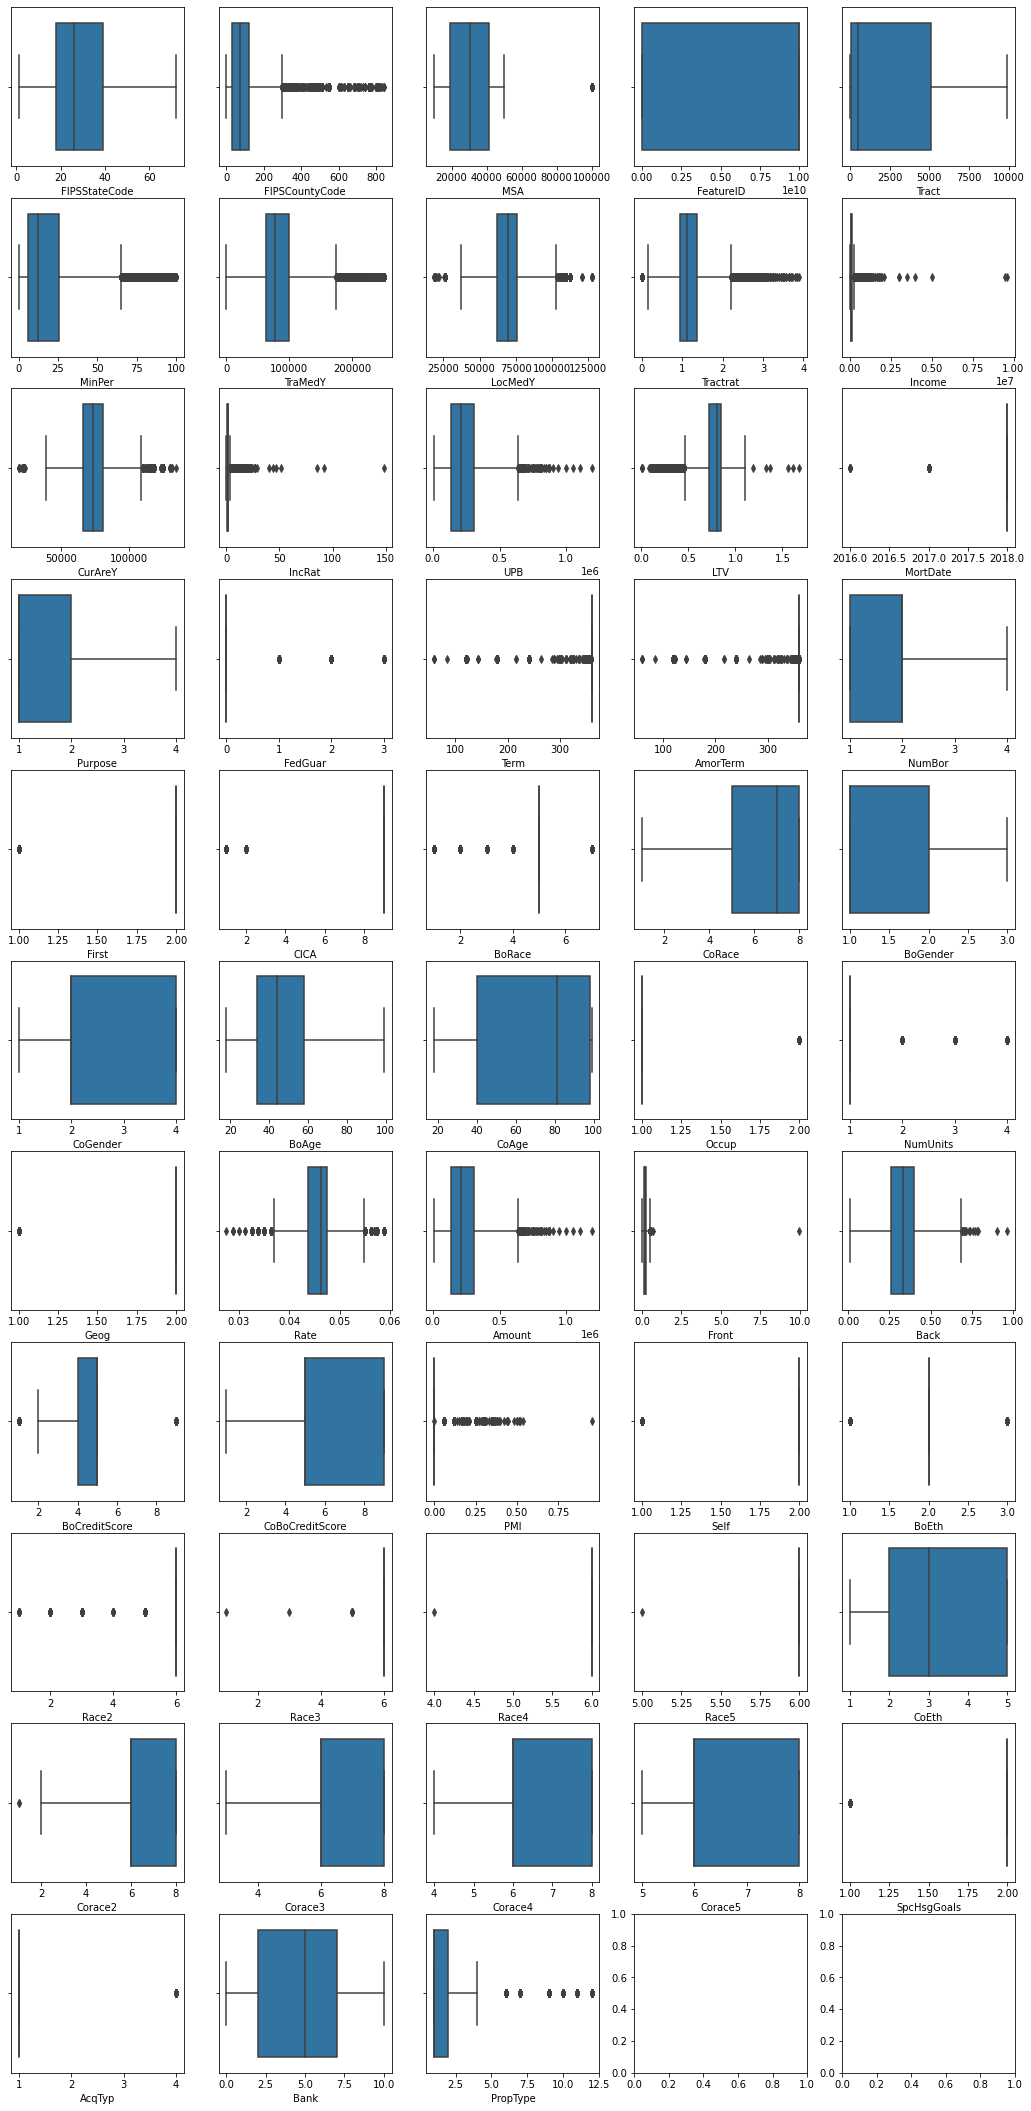

In [31]:
# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
fig, ax = plt.subplots(nrows = 11, ncols = 5, figsize=(18, 38))

for variable, subplot in zip(cp_num.columns, ax.flatten()):
    
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(cp_num[variable], ax = subplot, whis= 2)
plt.show()

In [32]:
a = (df_final.skew() > 0.5) | (df_final.skew() < -0.5)
a[a == 1].index

Index(['FIPSCountyCode', 'MSA', 'FeatureID', 'Tract', 'MinPer', 'TraMedY',
       'LocMedY', 'Tractrat', 'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV',
       'MortDate', 'Purpose', 'FedGuar', 'Term', 'AmorTerm', 'First', 'CICA',
       'BoRace', 'BoGender', 'BoAge', 'Occup', 'NumUnits', 'Geog', 'Amount',
       'Front', 'BoCreditScore', 'PMI', 'Self', 'BoEth', 'Race2', 'Race3',
       'Race4', 'Race5', 'SpcHsgGoals', 'AcqTyp', 'PropType'],
      dtype='object')

From the above we conclude that their exists no oulier in ['FeatureID'], ['Tract'], ['Bank'] etc columns.

From the above grabh we conclude that ['FIPSCountyCode', 'MSA', 'FeatureID', 'Tract', 'MinPer', 'TraMedY',
       'LocMedY', 'Tractrat', 'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV',
       'MortDate', 'Purpose', 'FedGuar', 'Term', 'AmorTerm', 'First', 'CICA',
       'BoRace', 'BoGender', 'BoAge', 'Occup', 'NumUnits', 'Geog', 'Amount',
       'Front', 'BoCreditScore', 'PMI', 'Self', 'BoEth', 'Race2', 'Race3',
       'Race4', 'Race5', 'SpcHsgGoals', 'AcqTyp', 'PropType' ] have outlier's and we can do the outlier treatment on these as they are important for the predictions later.

# Detection of Duplicate Data/rows

In [33]:
duplicate = df_final[df_final.duplicated(keep = 'last')]
duplicate

Empty DataFrame
Columns: [FIPSStateCode, FIPSCountyCode, MSA, FeatureID, Tract, MinPer, TraMedY, LocMedY, Tractrat, Income, CurAreY, IncRat, UPB, LTV, MortDate, Purpose, FedGuar, Term, AmorTerm, NumBor, First, CICA, BoRace, CoRace, BoGender, CoGender, BoAge, CoAge, Occup, NumUnits, Geog, Rate, Amount, Front, Back, BoCreditScore, CoBoCreditScore, PMI, Self, BoEth, Race2, Race3, Race4, Race5, CoEth, Corace2, Corace3, Corace4, Corace5, SpcHsgGoals, AcqTyp, Bank, PropType]
Index: []

[0 rows x 53 columns]

In [34]:
# No duplicate rows were found in the data

# Data Exploration

### checking the correlation between the variables


In [35]:
a = df_final.corr()
b = a[((a > 0.75) & (a != 1)) | ((a < -0.75) & (a != 0))]
c = b.dropna(axis= 1, how='all') 
c = c.dropna(axis= 0, how='all') 
c

TraMedY  LocMedY  Tractrat   Income  CurAreY   IncRat  \
TraMedY              NaN      NaN  0.870078      NaN      NaN      NaN   
LocMedY              NaN      NaN       NaN      NaN 0.979390      NaN   
Tractrat        0.870078      NaN       NaN      NaN      NaN      NaN   
Income               NaN      NaN       NaN      NaN      NaN 0.962111   
CurAreY              NaN 0.979390       NaN      NaN      NaN      NaN   
IncRat               NaN      NaN       NaN 0.962111      NaN      NaN   
UPB                  NaN      NaN       NaN      NaN      NaN      NaN   
NumBor               NaN      NaN       NaN      NaN      NaN      NaN   
CoRace               NaN      NaN       NaN      NaN      NaN      NaN   
CoGender             NaN      NaN       NaN      NaN      NaN      NaN   
CoAge                NaN      NaN       NaN      NaN      NaN      NaN   
Geog                 NaN      NaN       NaN      NaN      NaN      NaN   
Amount               NaN      NaN       NaN      NaN      NaN      NaN   
CoBoCreditScore      NaN      NaN       NaN      NaN      NaN      NaN   
Race4                NaN      NaN       NaN      NaN      NaN      NaN   
Race5                NaN      NaN       NaN      NaN      NaN      NaN   
CoEth                NaN      NaN       NaN      NaN      NaN      NaN   
Corace2              NaN      NaN       NaN      NaN      NaN      NaN   
Corace3              NaN      NaN       NaN      NaN      NaN      NaN   
Corace4              NaN      NaN       NaN      NaN      NaN      NaN   
Corace5              NaN      NaN       NaN      NaN      NaN      NaN   
SpcHsgGoals          NaN      NaN       NaN      NaN      NaN      NaN   

                     UPB    NumBor    CoRace  CoGender  ...   Amount  \
TraMedY              NaN       NaN       NaN       NaN  ...      NaN   
LocMedY              NaN       NaN       NaN       NaN  ...      NaN   
Tractrat             NaN       NaN       NaN       NaN  ...      NaN   
Income               NaN       NaN       NaN       NaN  ...      NaN   
CurAreY              NaN       NaN       NaN       NaN  ...      NaN   
IncRat               NaN       NaN       NaN       NaN  ...      NaN   
UPB                  NaN       NaN       NaN       NaN  ... 0.999705   
NumBor               NaN       NaN -0.890203 -0.929097  ...      NaN   
CoRace               NaN -0.890203       NaN  0.896210  ...      NaN   
CoGender             NaN -0.929097  0.896210       NaN  ...      NaN   
CoAge                NaN -0.831365  0.780005  0.816082  ...      NaN   
Geog                 NaN       NaN       NaN       NaN  ...      NaN   
Amount          0.999705       NaN       NaN       NaN  ...      NaN   
CoBoCreditScore      NaN -0.944513  0.877283  0.915787  ...      NaN   
Race4                NaN       NaN       NaN       NaN  ...      NaN   
Race5                NaN       NaN       NaN       NaN  ...      NaN   
CoEth                NaN -0.961957  0.927261  0.949763  ...      NaN   
Corace2              NaN -0.977696  0.906264  0.941537  ...      NaN   
Corace3              NaN -0.980857  0.905385  0.944358  ...      NaN   
Corace4              NaN -0.980942  0.905307  0.944432  ...      NaN   
Corace5              NaN -0.980973  0.905277  0.944464  ...      NaN   
SpcHsgGoals          NaN       NaN       NaN       NaN  ...      NaN   

                 CoBoCreditScore    Race4    Race5     CoEth   Corace2  \
TraMedY                      NaN      NaN      NaN       NaN       NaN   
LocMedY                      NaN      NaN      NaN       NaN       NaN   
Tractrat                     NaN      NaN      NaN       NaN       NaN   
Income                       NaN      NaN      NaN       NaN       NaN   
CurAreY                      NaN      NaN      NaN       NaN       NaN   
IncRat                       NaN      NaN      NaN       NaN       NaN   
UPB                          NaN      NaN      NaN       NaN       NaN   
NumBor                 -0.944513      NaN      NaN -0.961957 -0.9

From the above calculation we can see NAN values, the NAN values are for those columns who have less correlation strength and maginitude which lies in the range(-0.75, 0.75).

<AxesSubplot:>

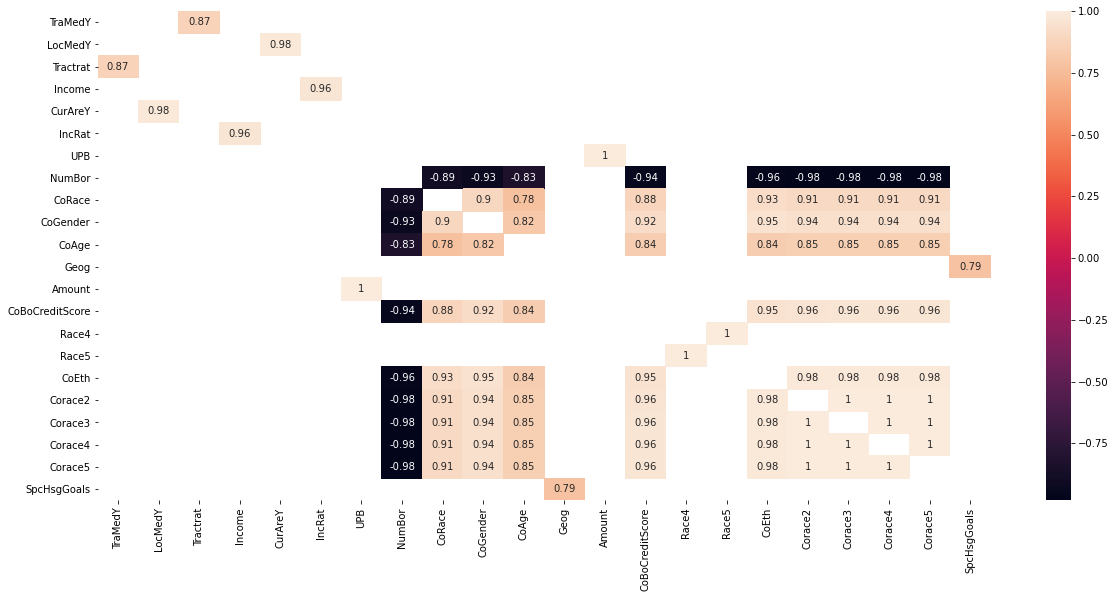

In [36]:
plt.figure(figsize=(20,9))
sns.heatmap(c, annot=True)

From the above plot, we can see that 

    strong positive correlation :
    1> ['TraMedY', 'Tractrat'] : 0.87, 
    2> ['LocMedY','CurAreY'] : 0.98, 
    3> ['Income','IncRat'] : 0.96, 
    4> ['Amount','UPB'] : 1, 
    5> ['Geog','SpcHsgGoals'] : 0.79 and 
    6> ['CoRace', 'CoGender','CoAge','CoBoCreditScore','CoEth','Corace2','Corace3','Corace4','Corace5'] : > 0.75
    
    strong negative correlation : 
    ['NumBor' v\s 'CoRace', 'CoGender','CoAge',','CoBoCreditScore','CoEth','Corace2','Corace3','Corace4','Corace5'] : >(-0.83)

In [37]:
# As we can see Values with NAN or white has less correlation amongest them.

### Checking Multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] =  cp_num.columns
vif['VIF_Factor'] = [variance_inflation_factor(cp_num.values, i ) for i in range(df_final.shape[1])]
vif.sort_values(by='VIF_Factor', ascending=False).head(15).T

18    17            47           48           46  \
Features    AmorTerm  Term       Corace4      Corace5      Corace3   
VIF_Factor       inf   inf 152086.535918 86839.240661 22868.642358   

                    32          12         42         45         43        44  \
Features        Amount         UPB      Race4    Corace2      Race5     CoEth   
VIF_Factor 1705.974834 1703.788465 181.122647 175.151464 174.560297 49.931877   

                  7         10        9         11  
Features     LocMedY   CurAreY    Income    IncRat  
VIF_Factor 34.114533 29.619569 28.902720 28.285272

As per the above VIF calculation we can conclude that columns ['Term' , 'AmortTerm'] has very high value multicolinearity hence we can drop one of them.

Although VIF of ['Income', 'IncRat'] are not much and close also both values are required for our calculation as per the Bussiness model hence we cannot drop the columns now.

In [39]:
# Using the above information, we conclude that 'Term' will be dropped from the dataset for futher calculation.

cp_num.drop('Term', axis = True,inplace= True)
cp_num.shape

(65703, 52)

In [40]:
vif.sort_values(by='VIF_Factor', ascending=False)[15:30].T

19        6         8                36        25       23  \
Features      NumBor   TraMedY  Tractrat  CoBoCreditScore  CoGender   CoRace   
VIF_Factor 27.147635 23.684695 18.127993        16.509170 11.582499 9.884306   

                 27       30           49       26         3        50  \
Features      CoAge     Geog  SpcHsgGoals    BoAge  FeatureID   AcqTyp   
VIF_Factor 7.364691 2.815798     2.742770 2.673120   2.669176 2.588947   

                 13       33       39  
Features        LTV    Front    BoEth  
VIF_Factor 2.047288 1.920723 1.919269

Although VIF of ['Front end ratio', 'BoEth'] and ['BoAge', 'FeatureID'] are very close but both values are required for our calculation as per the Bussiness model hence we cannot drop the columns now also they are adding different meaning to datset.

As per the above VIF calculation we can conclude that columns ['SpcHsgGoals' , 'Geog'] have similar VIF value, hence multicolinearity exists, we can drop one of them also they add similar value to the model.

Geog : Geographically Targeted Indicator indicating whether the property is in census tracts
annually classified as underserved by HUD =>> 1=yes; 2=no.

SpcHsgGoals : Special Housing Goals Loan =>> 1 – Yes ; 2 – No

In [41]:
df_final[['Geog','SpcHsgGoals']].value_counts()

Geog  SpcHsgGoals
2     2              63223
1     1               1628
      2                510
2     1                342
dtype: int64

In [42]:
# Using the above information, we conclude that 'Geog' will be dropped from the dataset for futher calculation.
cp_num.drop('Geog', axis = True,inplace= True)
cp_num.shape

(65703, 51)

In [43]:
vif.sort_values(by='VIF_Factor', ascending=False)[31:45].T

34       37       16       15       31       20       5   \
Features       Back      PMI  FedGuar  Purpose     Rate    First   MinPer   
VIF_Factor 1.673422 1.546633 1.487791 1.465849 1.437816 1.435378 1.413933   

                  24       41             35       2         14       51  \
Features    BoGender    Race3  BoCreditScore      MSA  MortDate     Bank   
VIF_Factor  1.347680 1.347505       1.318025 1.304966  1.237894 1.231776   

                  52  
Features    PropType  
VIF_Factor  1.198576

Although VIF of ['FedGuar', 'Purpose'], ['First', 'Rate'], ['MSA','BoCreditScore'] and ['Bank', 'MortDate'] are very close but both values are required for our calculation as per the Bussiness model hence we cannot drop the columns now.

In [44]:
df_final[['MSA', 'BoCreditScore']].value_counts()

MSA    BoCreditScore
99999  5                2803
       4                1866
17140  5                1723
16980  5                1335
26900  5                 908
                        ... 
34580  4                   1
28700  3                   1
42900  3                   1
28660  3                   1
44220  2                   1
Length: 2559, dtype: int64

In [45]:
df_final[['Bank', 'MortDate']].value_counts()

Bank  MortDate
2     2018        12551
10    2018         9291
6     2018         9074
5     2018         8524
3     2018         8354
4     2018         4741
8     2018         3362
1     2018         2449
9     2018         1941
7     2018         1095
0     2018          923
3     2017          601
4     2017          528
2     2017          442
6     2017          440
9     2017          353
10    2017          284
1     2017          221
5     2017          212
8     2017          203
0     2017           78
7     2017           28
10    2016            2
5     2016            2
8     2016            1
7     2016            1
2     2016            1
1     2016            1
dtype: int64

In [46]:
df_final[['First', 'Rate']].value_counts()

First  Rate    
2      0.046300    8432
       0.045000    8082
       0.047500    6397
       0.043800    5609
       0.048800    4912
                   ... 
       0.048400       1
       0.048700       1
1      0.048300       1
       0.048100       1
2      0.047900       1
Length: 159, dtype: int64

In [47]:
df_final[['FedGuar', 'Purpose']].value_counts()

FedGuar  Purpose
0        1          39558
         2          21767
3        1           1433
2        1           1196
1        1           1126
2        2            475
1        2            129
0        4             16
3        2              3
dtype: int64

In [48]:
vif.sort_values(by='VIF_Factor', ascending=False)[45:55].T

4              0        28       40              1        38  \
Features      Tract  FIPSStateCode    Occup    Race2  FIPSCountyCode     Self   
VIF_Factor 1.190366       1.183325 1.137885 1.113759        1.093025 1.070732   

                  29       21  
Features    NumUnits     CICA  
VIF_Factor  1.033570 1.013191

We cannot remove these columns as per given explainations, we will be using them for model clustering.

In [49]:
cp_num.columns

Index(['FIPSStateCode', 'FIPSCountyCode', 'MSA', 'FeatureID', 'Tract',
       'MinPer', 'TraMedY', 'LocMedY', 'Tractrat', 'Income', 'CurAreY',
       'IncRat', 'UPB', 'LTV', 'MortDate', 'Purpose', 'FedGuar', 'AmorTerm',
       'NumBor', 'First', 'CICA', 'BoRace', 'CoRace', 'BoGender', 'CoGender',
       'BoAge', 'CoAge', 'Occup', 'NumUnits', 'Rate', 'Amount', 'Front',
       'Back', 'BoCreditScore', 'CoBoCreditScore', 'PMI', 'Self', 'BoEth',
       'Race2', 'Race3', 'Race4', 'Race5', 'CoEth', 'Corace2', 'Corace3',
       'Corace4', 'Corace5', 'SpcHsgGoals', 'AcqTyp', 'Bank', 'PropType'],
      dtype='object')

### Outlier Treatment

In [50]:
df_final = pd.concat([cp_num], axis = 1)
cp_num = df_final.select_dtypes(np.number)
df_final.head()

FIPSStateCode  FIPSCountyCode    MSA   FeatureID       Tract    MinPer  \
0             24              21  47900  9999999999 7512.010000 29.850000   
1             24              17  47900  9999999999 8509.040000 67.240000   
2             51             153  47900  9999999999 9012.360000 40.760000   
3             51              59  47900  9999999999 4221.020000 75.970000   
4             24               5  12580  9999999999 4924.020000 64.560000   

   TraMedY  LocMedY  Tractrat  Income  ...  Race5  CoEth  Corace2  Corace3  \
0    93261   108141  0.862400  146196  ...      6      3        6        6   
1   112623   108141  1.041400  156972  ...      6      2        6        6   
2   140156   108141  1.296000  337464  ...      6      2        6        6   
3    89250   108141  0.825300  132000  ...      6      5        8        8   
4    81397    87788  0.927200   29376  ...      6      5        8        8   

   Corace4  Corace5  SpcHsgGoals  AcqTyp  Bank  PropType  
0        6        6            2       1     0         7  
1        6        6            2       1     0         7  
2        6        6            2       1     0         7  
3        8        8            2       1     0         7  
4        8        8            2       1     0         1  

[5 rows x 51 columns]

In [51]:
a = (cp_num.skew() > 0.5) | (cp_num.skew() < -0.5)
a[a == 1].index

Index(['FIPSCountyCode', 'MSA', 'FeatureID', 'Tract', 'MinPer', 'TraMedY',
       'LocMedY', 'Tractrat', 'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV',
       'MortDate', 'Purpose', 'FedGuar', 'AmorTerm', 'First', 'CICA', 'BoRace',
       'BoGender', 'BoAge', 'Occup', 'NumUnits', 'Amount', 'Front',
       'BoCreditScore', 'PMI', 'Self', 'BoEth', 'Race2', 'Race3', 'Race4',
       'Race5', 'SpcHsgGoals', 'AcqTyp', 'PropType'],
      dtype='object')

In [52]:
q1=cp_num.quantile(0.25)
q3=cp_num.quantile(0.75)
iqr=q3-q1
ul=q3+(3*iqr)
ll=q1-(3*iqr)
cp_num[((cp_num>ll)|(cp_num<ul)).any(axis=1)]


FIPSStateCode  FIPSCountyCode    MSA   FeatureID       Tract    MinPer  \
0                 24              21  47900  9999999999 7512.010000 29.850000   
1                 24              17  47900  9999999999 8509.040000 67.240000   
2                 51             153  47900  9999999999 9012.360000 40.760000   
3                 51              59  47900  9999999999 4221.020000 75.970000   
4                 24               5  12580  9999999999 4924.020000 64.560000   
...              ...             ...    ...         ...         ...       ...   
65698             40             143  46140  9999999999   75.220000 22.820000   
65699             31             109  30700  9999999999   37.090000  7.610000   
65700             19             133  99999  9999999999 9602.000000  3.690000   
65701             31             153  36540  9999999999  106.230000 10.160000   
65702             31             179  99999  9999999999 9787.000000  9.020000   

       TraMedY  LocMedY  Tractrat  Income  ...  Race5  CoEth  Corace2  \
0        93261   108141  0.862400  146196  ...      6      3        6   
1       112623   108141  1.041400  156972  ...      6      2        6   
2       140156   108141  1.296000  337464  ...      6      2        6   
3        89250   108141  0.825300  132000  ...      6      5        8   
4        81397    87788  0.927200   29376  ...      6      5        8   
...        ...      ...       ...     ...  ...    ...    ...      ...   
65698    69635    62478  1.114600  100008  ...      6      2        6   
65699    94198    72700  1.295700  154452  ...      6      2        6   
65700    69688    63366  1.099800   54540  ...      6      5        8   
65701    98707    75898  1.300500   87996  ...      6      2        6   
65702    69090    70303  0.982700   91320  ...      6      2        6   

       Corace3  Corace4  Corace5  SpcHsgGoals  AcqTyp  Bank  PropType  
0            6        6        6            2       1     0         7  
1            6        6        6            2       1     0         7  
2            6        6        6            2       1     0         7  
3            8        8        8            2       1     0         7  
4            8        8        8            2       1     0         1  
...        ...      ...      ...          ...     ...   ...       ...  
65698        6        6        6            2       1    10         7  
65699        6        6        6            2       1    10         7  
65700        8        8        8            2       1    10         1  
65701        6        6        6            2       1    10         7  
65702        6        6        6            2       1    10         1  

[65703 rows x 51 columns]

In [53]:
# As per the above results it seems like all values are out of bound.
# Will do the skewness transformation on each of the above columns.

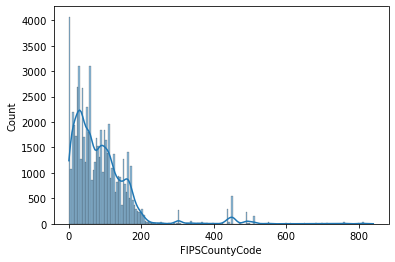

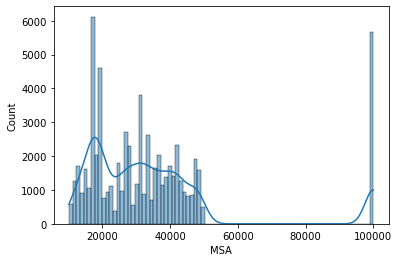

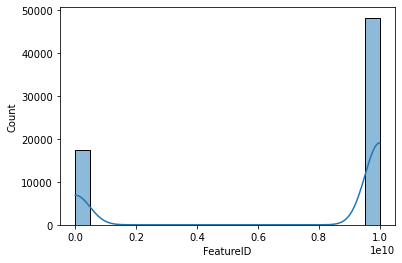

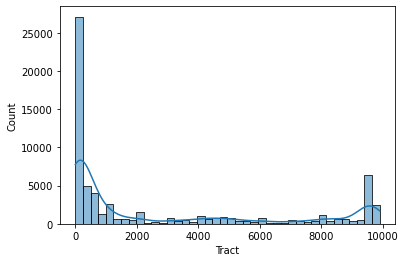

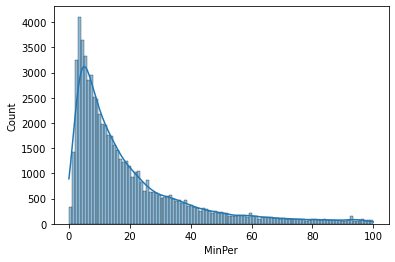

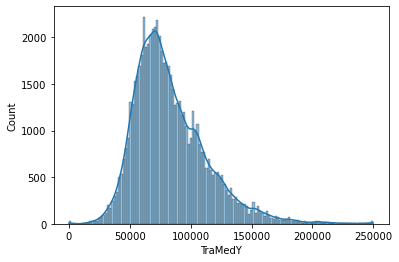

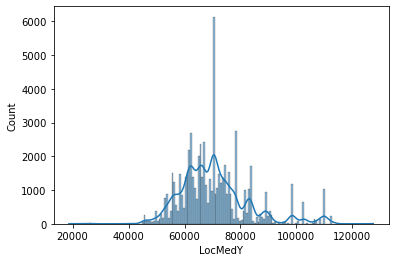

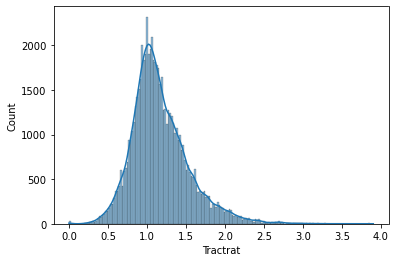

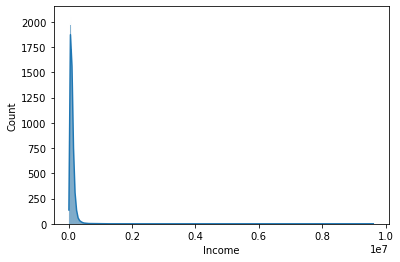

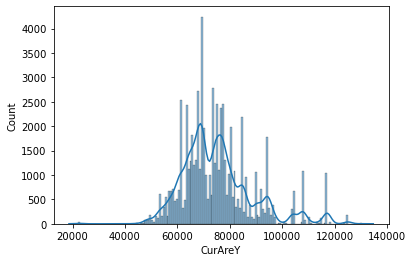

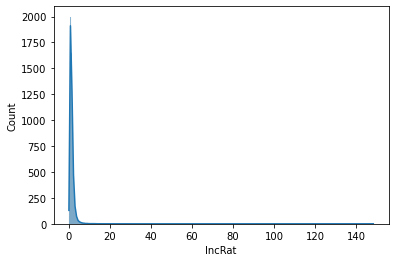

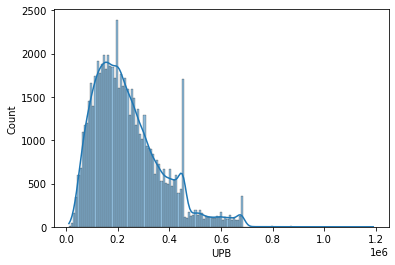

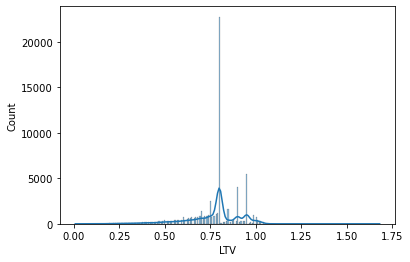

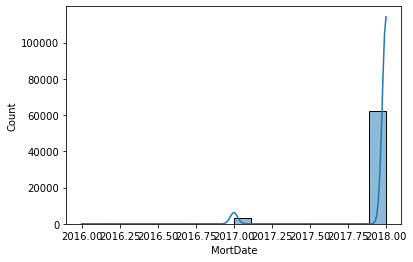

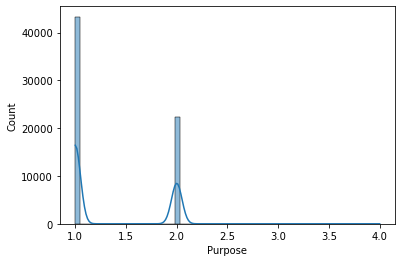

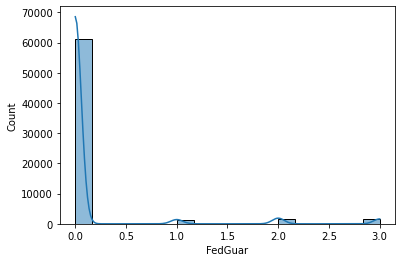

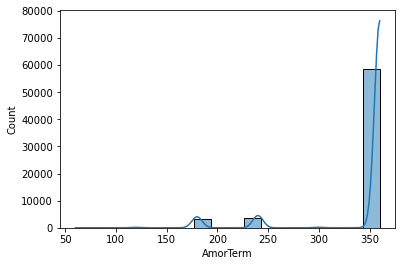

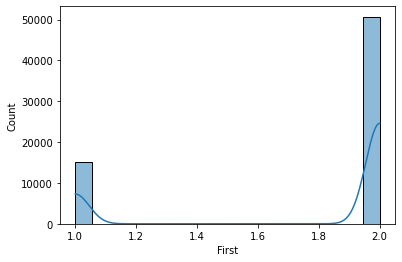

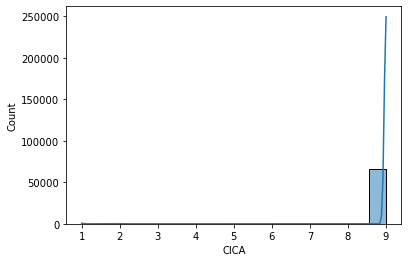

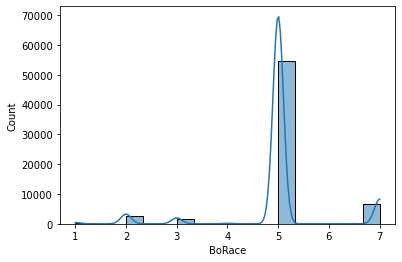

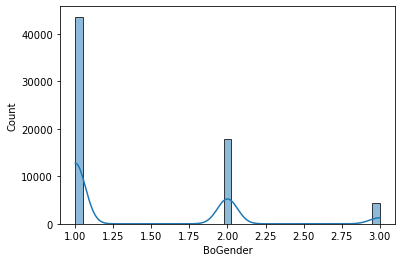

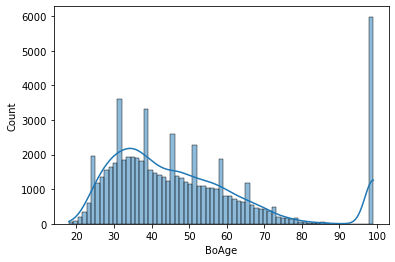

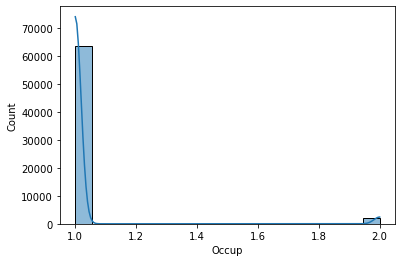

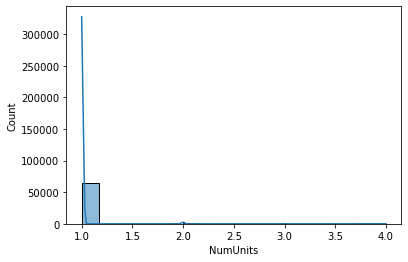

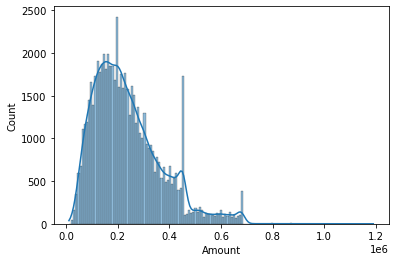

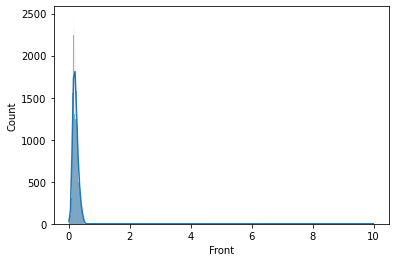

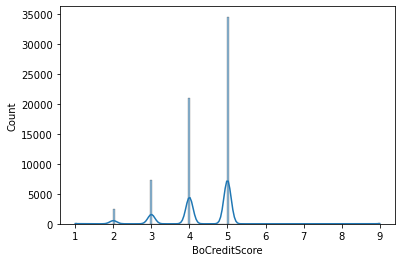

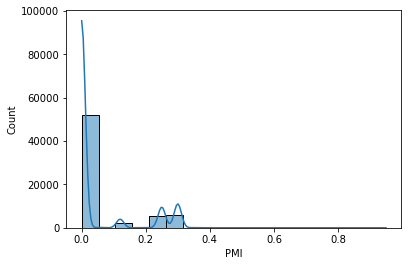

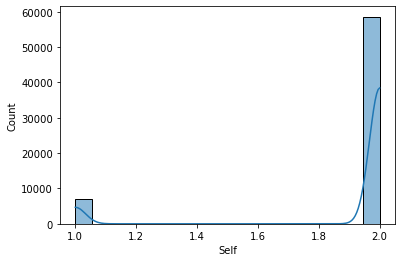

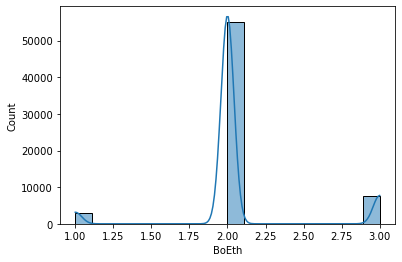

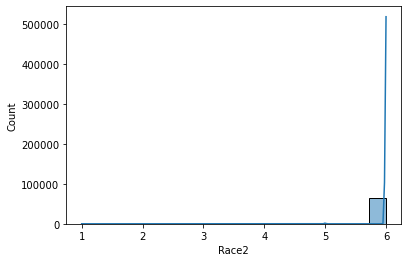

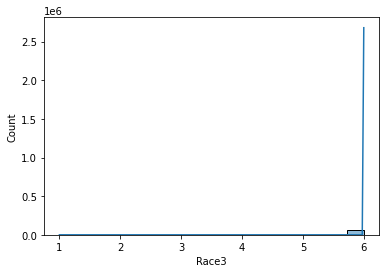

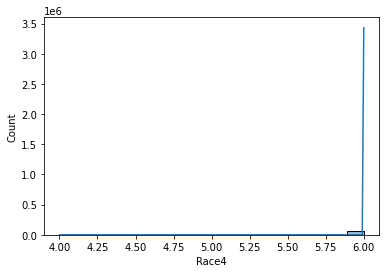

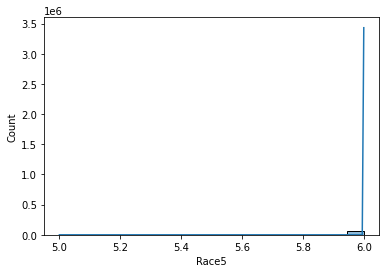

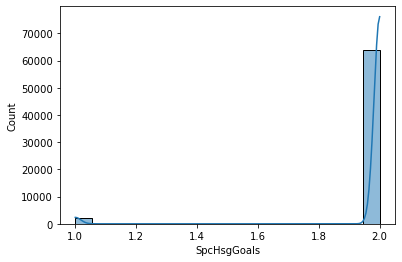

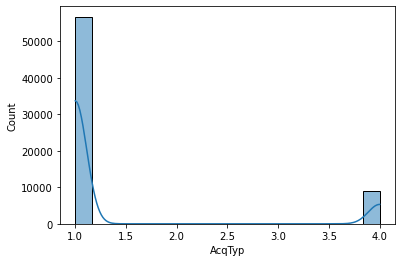

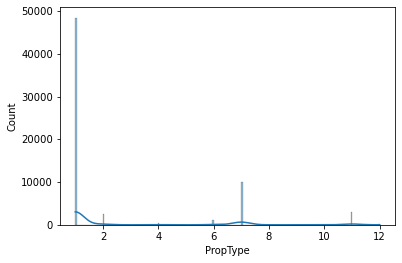

In [54]:
skew_col = cp_num[['FIPSCountyCode', 'MSA', 'FeatureID', 'Tract', 'MinPer', 'TraMedY',
       'LocMedY', 'Tractrat', 'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV',
       'MortDate', 'Purpose', 'FedGuar', 'AmorTerm', 'First', 'CICA',
       'BoRace', 'BoGender', 'BoAge', 'Occup', 'NumUnits', 'Amount',
       'Front', 'BoCreditScore', 'PMI', 'Self', 'BoEth', 'Race2', 'Race3',
       'Race4', 'Race5', 'SpcHsgGoals', 'AcqTyp', 'PropType']]
for i in skew_col:
    plt.tight_layout()
    sns.histplot(skew_col[i], kde=True)
    plt.show()

# Feature Engineering

### Checking any transformations required

In [55]:
X = cp_num.select_dtypes(np.number)
X.head()

FIPSStateCode  FIPSCountyCode    MSA   FeatureID       Tract    MinPer  \
0             24              21  47900  9999999999 7512.010000 29.850000   
1             24              17  47900  9999999999 8509.040000 67.240000   
2             51             153  47900  9999999999 9012.360000 40.760000   
3             51              59  47900  9999999999 4221.020000 75.970000   
4             24               5  12580  9999999999 4924.020000 64.560000   

   TraMedY  LocMedY  Tractrat  Income  ...  Race5  CoEth  Corace2  Corace3  \
0    93261   108141  0.862400  146196  ...      6      3        6        6   
1   112623   108141  1.041400  156972  ...      6      2        6        6   
2   140156   108141  1.296000  337464  ...      6      2        6        6   
3    89250   108141  0.825300  132000  ...      6      5        8        8   
4    81397    87788  0.927200   29376  ...      6      5        8        8   

   Corace4  Corace5  SpcHsgGoals  AcqTyp  Bank  PropType  
0        6        6            2       1     0         7  
1        6        6            2       1     0         7  
2        6        6            2       1     0         7  
3        8        8            2       1     0         7  
4        8        8            2       1     0         1  

[5 rows x 51 columns]

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others. Reducing the bias for model while clustering.

In [56]:
from sklearn.preprocessing import normalize
for i in skew_col:
    cp_norm = pd.DataFrame(normalize(df_final, axis=1), columns = df_final.columns)
cp_norm

FIPSStateCode  FIPSCountyCode      MSA  FeatureID    Tract   MinPer  \
0           0.000000        0.000000 0.000005   1.000000 0.000001 0.000000   
1           0.000000        0.000000 0.000005   1.000000 0.000001 0.000000   
2           0.000000        0.000000 0.000005   1.000000 0.000001 0.000000   
3           0.000000        0.000000 0.000005   1.000000 0.000000 0.000000   
4           0.000000        0.000000 0.000001   1.000000 0.000000 0.000000   
...              ...             ...      ...        ...      ...      ...   
65698       0.000000        0.000000 0.000005   1.000000 0.000000 0.000000   
65699       0.000000        0.000000 0.000003   1.000000 0.000000 0.000000   
65700       0.000000        0.000000 0.000010   1.000000 0.000001 0.000000   
65701       0.000000        0.000000 0.000004   1.000000 0.000000 0.000000   
65702       0.000000        0.000000 0.000010   1.000000 0.000001 0.000000   

       TraMedY  LocMedY  Tractrat   Income  ...    Race5    CoEth  Corace2  \
0     0.000009 0.000011  0.000000 0.000015  ... 0.000000 0.000000 0.000000   
1     0.000011 0.000011  0.000000 0.000016  ... 0.000000 0.000000 0.000000   
2     0.000014 0.000011  0.000000 0.000034  ... 0.000000 0.000000 0.000000   
3     0.000009 0.000011  0.000000 0.000013  ... 0.000000 0.000000 0.000000   
4     0.000008 0.000009  0.000000 0.000003  ... 0.000000 0.000000 0.000000   
...        ...      ...       ...      ...  ...      ...      ...      ...   
65698 0.000007 0.000006  0.000000 0.000010  ... 0.000000 0.000000 0.000000   
65699 0.000009 0.000007  0.000000 0.000015  ... 0.000000 0.000000 0.000000   
65700 0.000007 0.000006  0.000000 0.000005  ... 0.000000 0.000000 0.000000   
65701 0.000010 0.000008  0.000000 0.000009  ... 0.000000 0.000000 0.000000   
65702 0.000007 0.000007  0.000000 0.000009  ... 0.000000 0.000000 0.000000   

       Corace3  Corace4  Corace5  SpcHsgGoals   AcqTyp     Bank  PropType  
0     0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
1     0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
2     0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
3     0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
4     0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
...        ...      ...      ...          ...      ...      ...       ...  
65698 0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
65699 0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
65700 0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
65701 0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  
65702 0.000000 0.000000 0.000000     0.000000 0.000000 0.000000  0.000000  

[65703 rows x 51 columns]

### Scaling the data

In [57]:
ss = StandardScaler()
num_norm = ss.fit_transform(X)
X = pd.DataFrame(num_norm, columns = X.columns)
X.shape

(65703, 51)

In [58]:
X.columns

Index(['FIPSStateCode', 'FIPSCountyCode', 'MSA', 'FeatureID', 'Tract',
       'MinPer', 'TraMedY', 'LocMedY', 'Tractrat', 'Income', 'CurAreY',
       'IncRat', 'UPB', 'LTV', 'MortDate', 'Purpose', 'FedGuar', 'AmorTerm',
       'NumBor', 'First', 'CICA', 'BoRace', 'CoRace', 'BoGender', 'CoGender',
       'BoAge', 'CoAge', 'Occup', 'NumUnits', 'Rate', 'Amount', 'Front',
       'Back', 'BoCreditScore', 'CoBoCreditScore', 'PMI', 'Self', 'BoEth',
       'Race2', 'Race3', 'Race4', 'Race5', 'CoEth', 'Corace2', 'Corace3',
       'Corace4', 'Corace5', 'SpcHsgGoals', 'AcqTyp', 'Bank', 'PropType'],
      dtype='object')

# Unsupervised learning Model building



### Model 1:  K-means algo

In [59]:
# create several cluster combinations ranging from 1 to 20 
# observe the wcss (Within Cluster Sum of Squares) for each cluster
xkm = X.copy()
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, random_state = 10, init='k-means++', n_init=10)
    kmeans.fit(xkm)
    wcss.append(kmeans.inertia_)
    
wcss

[3350852.999999996,
 2721371.865952786,
 2625834.077096685,
 2544240.854742048,
 2397386.001731072,
 2338082.105520806,
 2273663.3395401062,
 2221059.046752606,
 2172759.302556145,
 2148970.830035243,
 2083189.278185132,
 2045667.7769490192,
 2002951.2928315673,
 1973288.4742018762]

In [60]:
a = kmeans.predict(xkm)
a

array([12, 12, 12, ...,  1,  0,  3])

In [61]:
k_cluster_centers =kmeans.cluster_centers_

### Visualize the elbow plot to get the optimal value of K

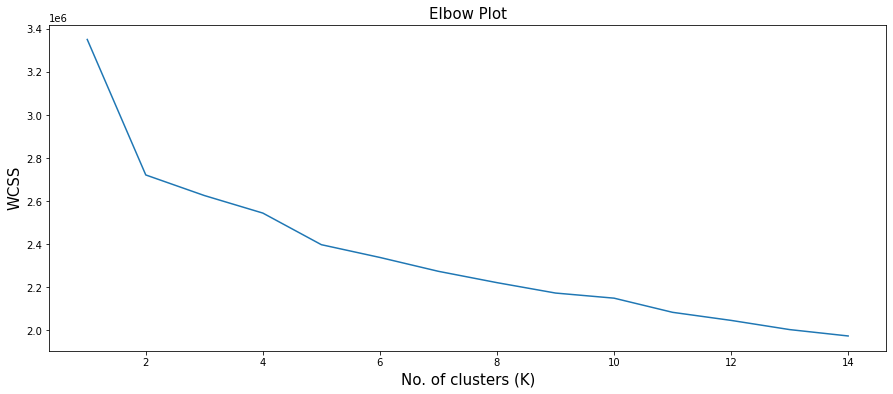

In [62]:

plt.figure(figsize=(15,6))
plt.plot(range(1,15), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

Interpretation: We can see that the for K = 2, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 2, the WCSS is decreasing slowly.

In [63]:

# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6]

# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(xkm)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.2096989140517838)
For 3 clusters the silhouette score is 0.1274354471168816)
For 4 clusters the silhouette score is 0.08605691039769664)
For 5 clusters the silhouette score is 0.08493158879277285)
For 6 clusters the silhouette score is 0.08775598627029046)


In [64]:
# As we can see from silhoutte scores the cluster 2 has highest score after that is deccreasing very slowly.
# Hhence, It is evidentCluster two explains/clusters the dataset into two clusters.


Inference : As we can see that that the cliuster having a good Silhouette score and it can predict cluster is very positive manner. As we increase the umber of cluster it is negatively impacting the model in clustering the data.


### Build the Clusters

In [65]:
# build a K-Means model with 2 clusters
df_km = X.copy()
from sklearn.cluster import KMeans
new_km = KMeans(n_clusters = 2, random_state = 10)
new_km.fit(df_km)
centroids = new_km.cluster_centers_
df_km['Cluster'] = new_km.labels_
df_km.Cluster.describe()

count   65703.000000
mean        0.447179
std         0.497206
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Cluster, dtype: float64

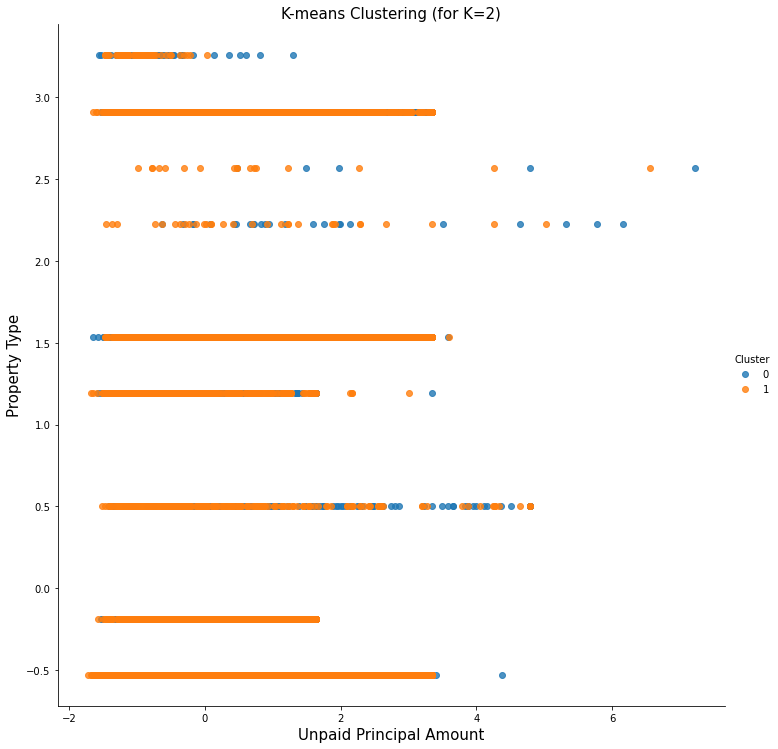

In [66]:
# plot the lmplot to visualize the clusters

# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot(x = 'UPB', y= 'PropType', data = df_km, hue = 'Cluster', 
              fit_reg = False, size = 10)
plt.title('K-means Clustering (for K=2)', fontsize = 15)
plt.xlabel('Unpaid Principal Amount', fontsize = 15)
plt.ylabel('Property Type', fontsize = 15)
plt.show()


### Analyze the Clusters

Let us visualize the clusters.

### Check the size of each cluster

In [67]:
df_km.Cluster.value_counts()

0    36322
1    29381
Name: Cluster, dtype: int64

### Plot a barplot to visualize the cluster sizes

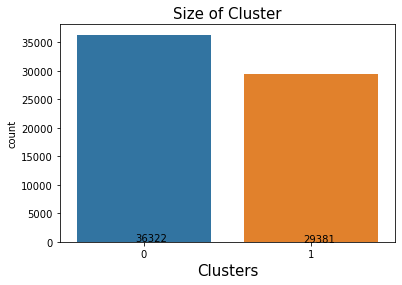

In [68]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_km, x = 'Cluster')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_km.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_km.labels_, return_counts=True)[1][1])

# display the plot
plt.show()

#### Cluster 1

Check the size of the cluster

In [69]:
# size of a cluster 1
len(df_km[df_km['Cluster'] == 0])

36322





Compute the statistical summary for the customers in this cluster

In [70]:
# statistical summary of the numerical variables
df_final[df_km.Cluster==0].describe()

FIPSStateCode  FIPSCountyCode          MSA         FeatureID  \
count   36322.000000    36322.000000 36322.000000      36322.000000   
mean       28.815979       87.815346 35602.385304 7401803156.076648   
std        14.911192       83.337909 23073.807567 4384841539.951893   
min         1.000000        1.000000 10100.000000      11953.000000   
25%        18.000000       31.000000 19380.000000    2411371.500000   
50%        26.000000       71.000000 31080.000000 9999999999.000000   
75%        40.000000      119.000000 41540.000000 9999999999.000000   
max        72.000000      840.000000 99999.000000 9999999999.000000   

             Tract       MinPer       TraMedY       LocMedY     Tractrat  \
count 36322.000000 36322.000000  36322.000000  36322.000000 36322.000000   
mean   2867.769092    17.806425  84585.956005  70402.864545     1.190257   
std    3687.644078    18.366672  29605.218520  12356.805779     0.362056   
min       1.000000     0.000000      0.000000  18666.000000     0.000000   
25%     104.060000     5.410000  63750.000000  62393.000000     0.953700   
50%     518.060000    11.260000  78600.000000  69235.000000     1.124000   
75%    5504.000000    22.817500 100962.250000  75898.000000     1.375400   
max    9900.010000    99.890000 250001.000000 127500.000000     3.852600   

              Income  ...        Race5        CoEth      Corace2      Corace3  \
count   36322.000000  ... 36322.000000 36322.000000 36322.000000 36322.000000   
mean   131323.701118  ...     5.999972     2.081080     5.994879     5.999890   
std    118282.174670  ...     0.005247     0.395600     0.111685     0.025705   
min     14232.000000  ...     5.000000     1.000000     1.000000     3.000000   
25%     81732.000000  ...     6.000000     2.000000     6.000000     6.000000   
50%    112866.500000  ...     6.000000     2.000000     6.000000     6.000000   
75%    155553.000000  ...     6.000000     2.000000     6.000000     6.000000   
max   9614088.000000  ...     6.000000     5.000000     8.000000     8.000000   

           Corace4      Corace5  SpcHsgGoals       AcqTyp         Bank  \
count 36322.000000 36322.000000 36322.000000 36322.000000 36322.000000   
mean      6.000028     6.000083     1.985573     1.398601     5.142366   
std       0.018919     0.015741     0.119243     1.018307     2.914646   
min       4.000000     5.000000     1.000000     1.000000     0.000000   
25%       6.000000     6.000000     2.000000     1.000000     3.000000   
50%       6.000000     6.000000     2.000000     1.000000     5.000000   
75%       6.000000     6.000000     2.000000     1.000000     7.000000   
max       8.000000     8.000000     2.000000     4.000000    10.000000   

          PropType  
count 36322.000000  
mean      2.366885  
std       2.714040  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max      12.000000  

[8 rows x 51 columns]

Interpretation Cluster 1 :

According to the above cluster 1 analysis we see that FIPSStateCode, FIPSCountyCode, FeatureID, MinPer, TraMedY, LocMedY, Tractrat, SpcHsgGoals, AcqTyp have a higher standard deviation and a higher spread so they have a bigger say in the final system.

Cluster 1 has more peopletaking loan from Chicago Region

#### Cluster 2

Check the size of the cluster

In [71]:
# size of a cluster 1
len(df_km[df_km['Cluster'] == 1])

29381

Compute the statistical summary for the customers in this cluster

In [72]:
# statistical summary of the numerical variables
df_final[df_km.Cluster==1].describe()

FIPSStateCode  FIPSCountyCode          MSA         FeatureID  \
count   29381.000000    29381.000000 29381.000000      29381.000000   
mean       28.079609       88.110514 34208.651646 7282440570.828222   
std        14.914641       87.865928 21946.831167 4448134745.724813   
min         1.000000        1.000000 10100.000000       6920.000000   
25%        17.000000       31.000000 19100.000000    2410324.000000   
50%        26.000000       67.000000 29820.000000 9999999999.000000   
75%        39.000000      117.000000 40900.000000 9999999999.000000   
max        72.000000      820.000000 99999.000000 9999999999.000000   

             Tract       MinPer       TraMedY       LocMedY     Tractrat  \
count 29381.000000 29381.000000  29381.000000  29381.000000 29381.000000   
mean   2659.607332    21.688057  81739.666996  70697.569041     1.148766   
std    3551.761751    20.916391  30383.959354  12343.711376     0.378443   
min       1.000000     0.000000      0.000000  19679.000000     0.000000   
25%     102.120000     6.780000  60875.000000  62393.000000     0.907700   
50%     503.060000    14.310000  75701.000000  69624.000000     1.087900   
75%    4901.000000    29.270000  97941.000000  75898.000000     1.340700   
max    9900.000000   100.000000 250001.000000 127500.000000     3.903700   

              Income  ...        Race5        CoEth      Corace2      Corace3  \
count   29381.000000  ... 29381.000000 29381.000000 29381.000000 29381.000000   
mean    89651.851537  ...     6.000000     5.000000     8.000000     8.000000   
std     71153.485504  ...     0.000000     0.000000     0.000000     0.000000   
min     11004.000000  ...     6.000000     5.000000     8.000000     8.000000   
25%     49920.000000  ...     6.000000     5.000000     8.000000     8.000000   
50%     72100.000000  ...     6.000000     5.000000     8.000000     8.000000   
75%    108180.000000  ...     6.000000     5.000000     8.000000     8.000000   
max   1763676.000000  ...     6.000000     5.000000     8.000000     8.000000   

           Corace4      Corace5  SpcHsgGoals       AcqTyp         Bank  \
count 29381.000000 29381.000000 29381.000000 29381.000000 29381.000000   
mean      8.000000     8.000000     1.950785     1.421599     4.880875   
std       0.000000     0.000000     0.216321     1.042635     2.848113   
min       8.000000     8.000000     1.000000     1.000000     0.000000   
25%       8.000000     8.000000     2.000000     1.000000     2.000000   
50%       8.000000     8.000000     2.000000     1.000000     5.000000   
75%       8.000000     8.000000     2.000000     1.000000     6.000000   
max       8.000000     8.000000     2.000000     4.000000    10.000000   

          PropType  
count 29381.000000  
mean      2.750111  
std       3.112325  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       4.000000  
max      12.000000  

[8 rows x 51 columns]

Interpretation Cluster 2: 

According to the above cluster 1 analysis we see that FIPSStateCode, FIPSCountyCode, FeatureID, MinPer, TraMedY, LocMedY, Tractrat, SpcHsgGoals, AcqTyp, MSA, Income have a higher standard deviation and a higher spread so they have a bigger say in the final system.

Cluster 2 has more people taking loan from Cincinnati and Indianapolis Region

Inference of the CLusters:
    
    The second cluster has a higher mean and a higher standard deviation making cluster 2 more accurate than cluster 1,  but as we can see above we are not getting a very clear picture using the above two clusters [0,1].
Hence we choose DBScan algo for the Model building.

### Model 2 : DBSCAN Algo

#### Model1

<AxesSubplot:xlabel='Cluster_DB', ylabel='count'>

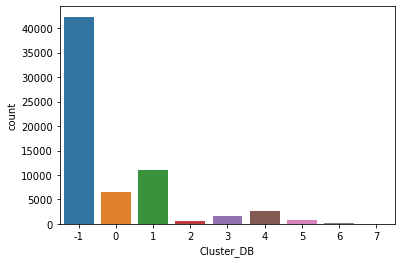

In [73]:
# Build a clustering model1  using DBSCAN 
X2 = X.copy()
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3, min_samples=52).fit(X2)
X2['Cluster_DB']=db.labels_
sns.countplot(X2['Cluster_DB'])

In [74]:
# When we used the small epsilon value(radius) = 3 and 
# the min_sample >= D+1 size =65 we are getting the high value of noise, 
# as smaller the dataset leads to more variation and treated as less densely populated
# Since, it is density based clustering so it it is treating/assigning all far datapoint as new clusters.

# Cluster -1 tells us about the high Noise in dataset. So in order to reduce noise we will use higher epsilon values.

# Hence we cannot use this model1

#### Model2

<AxesSubplot:xlabel='Cluster_DB', ylabel='count'>

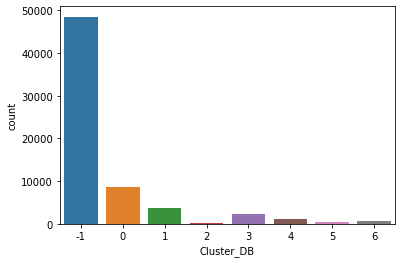

In [75]:
# Build a clustering model2 using DBSCAN 

from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3, min_samples=100).fit(X2.drop('Cluster_DB', axis=1))
X2['Cluster_DB']=db.labels_
sns.countplot(X2['Cluster_DB'])

In [76]:
# When we used the small epsilon value(radius) = 3 and 
# the min_sample size =100(2D) we are getting the high value of noise 
# as it is density based clustering so it it is treating/assigning all far datapoint as new clusters.

# Cluster -1 tells us about the high Noise in dataset. So in order to reduce noise we will use higher epsilon values.

# Hence we cannot use this model2

#### Model 3

 0    57716
-1     4851
 3     1354
 1     1025
 4      450
 2      307
Name: Cluster_DB, dtype: int64

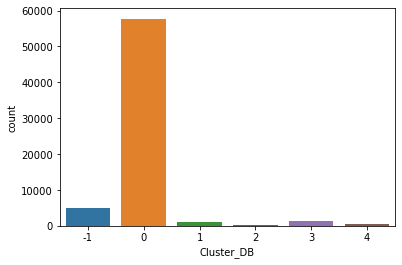

In [77]:
# Build a clustering model3 using DBSCAN 

from sklearn.cluster import DBSCAN
db=DBSCAN(eps=5, min_samples=100).fit(X2.drop('Cluster_DB', axis=1))
X2['Cluster_DB']=db.labels_
sns.countplot(X2['Cluster_DB'])
X2['Cluster_DB'].value_counts()

In [78]:
# When we used the epsilon value(radius) = 5 and 
# the min_sample size =100(2D), we are getting the high value of Cluster 0 and others have a value very less.

# Cluster 0 could be an impact of overlapping.
# Possibility as it is density based clustering so it it is treating/assigning very close datapoint as clusters 0.
# We will analyse this clusters and check if they add a meaningful value to the system.

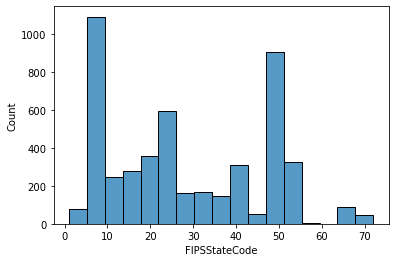

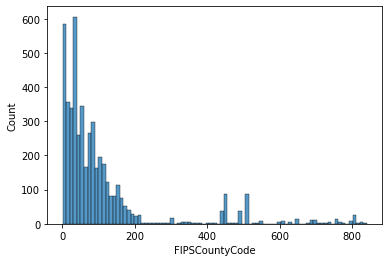

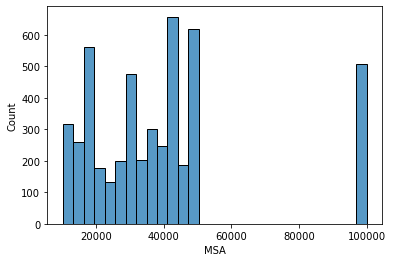

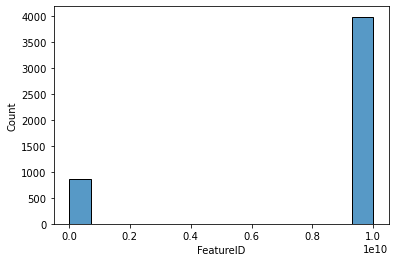

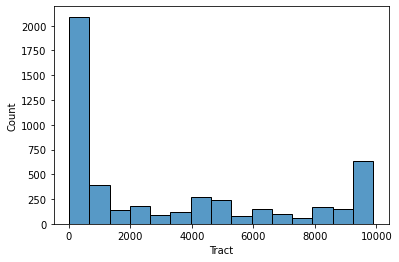

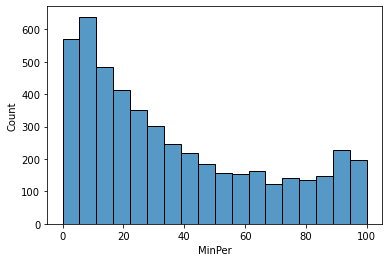

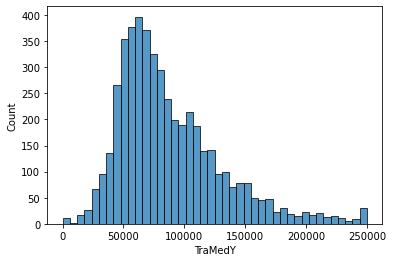

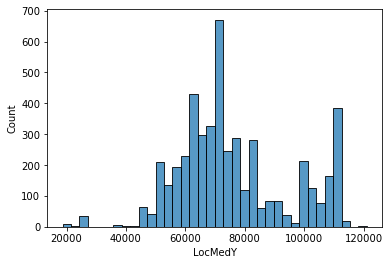

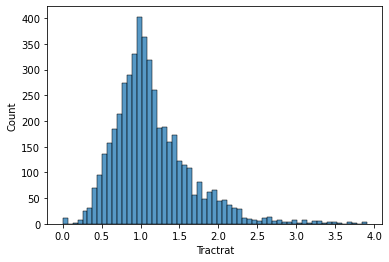

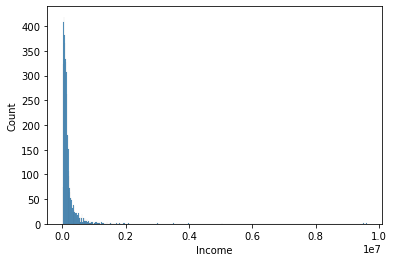

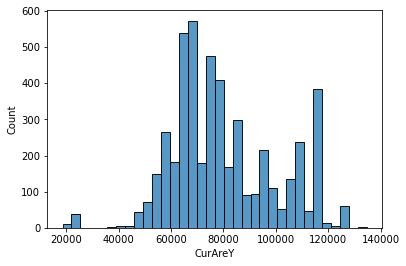

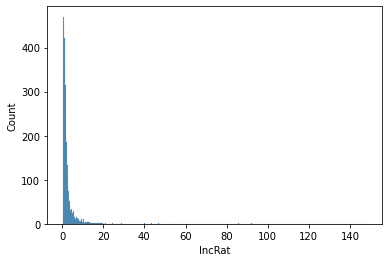

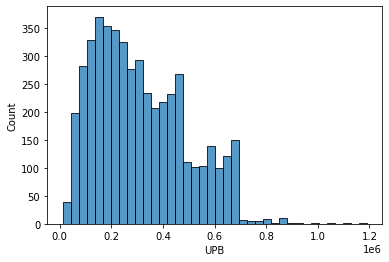

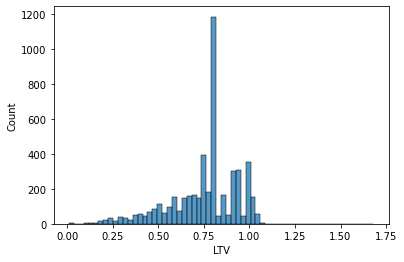

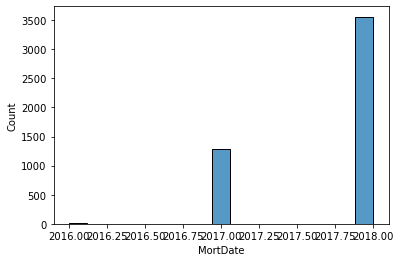

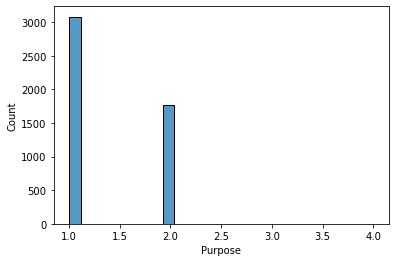

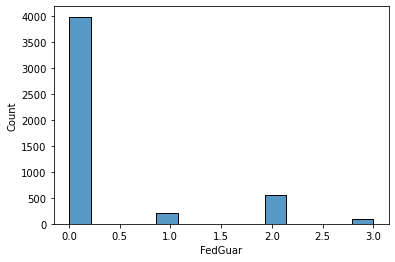

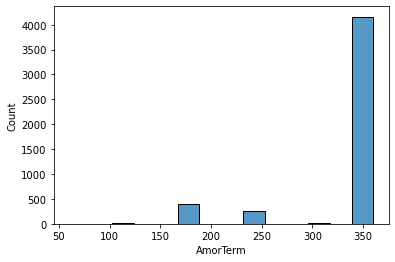

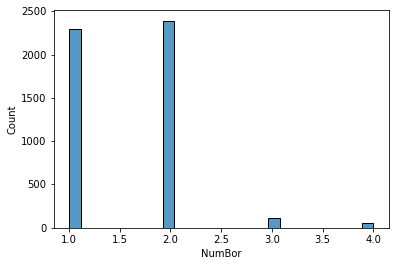

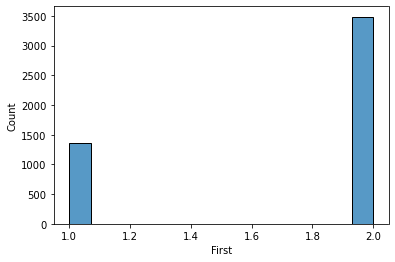

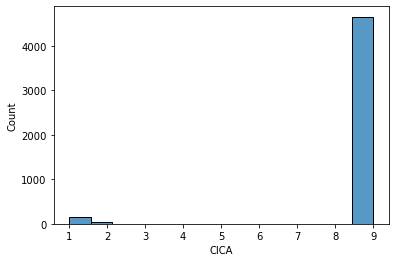

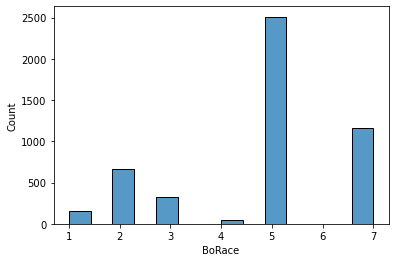

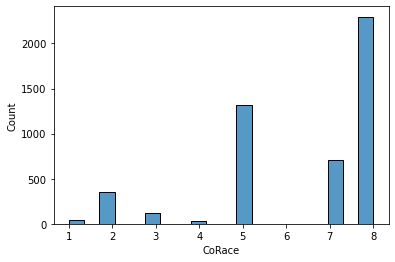

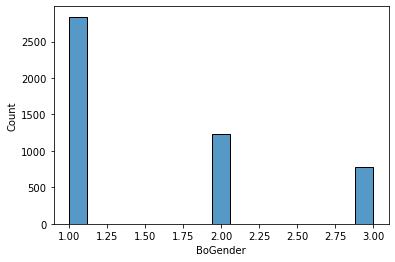

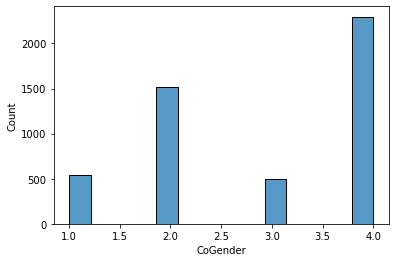

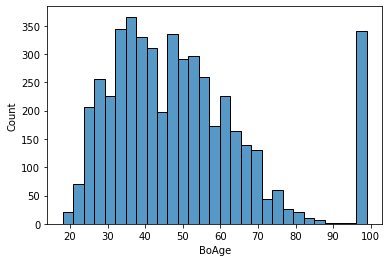

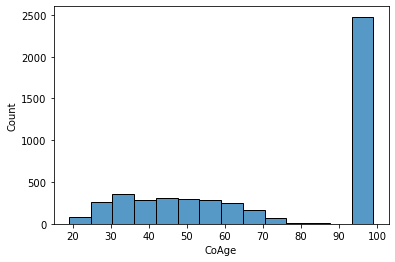

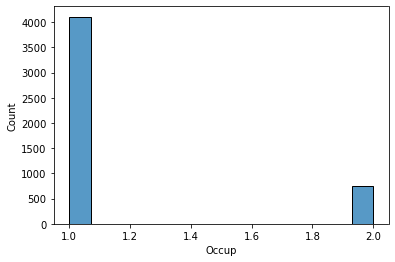

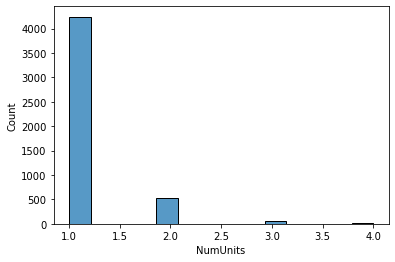

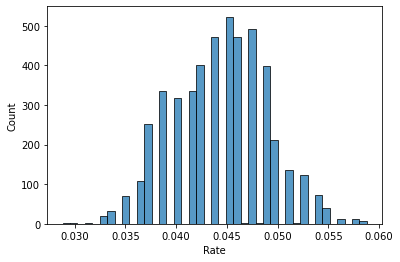

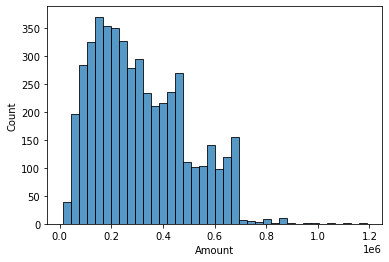

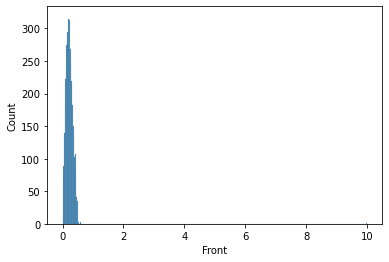

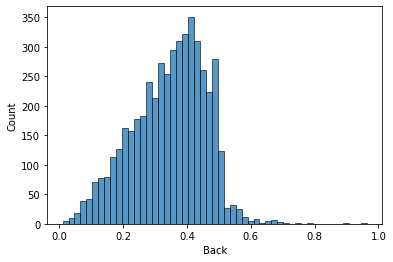

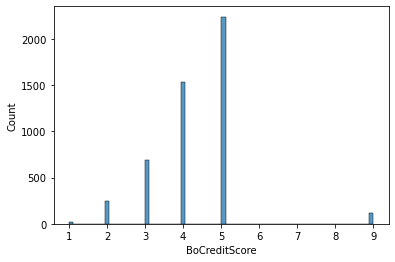

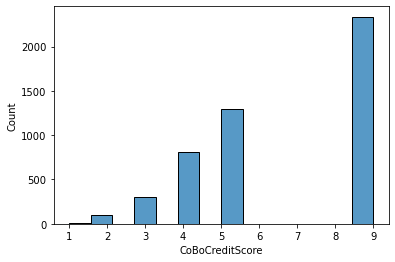

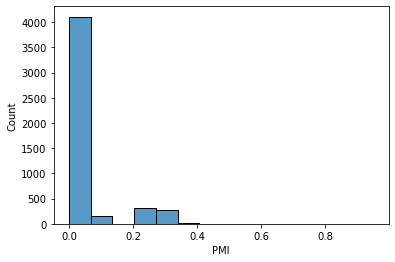

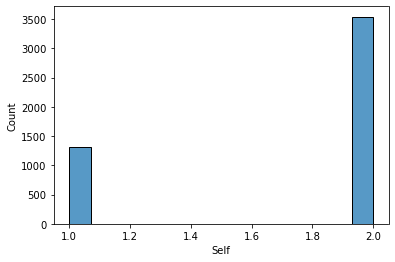

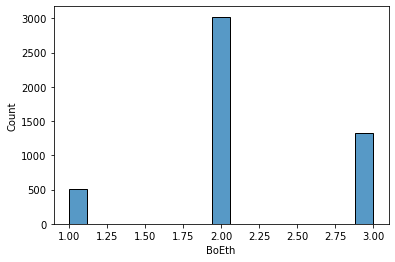

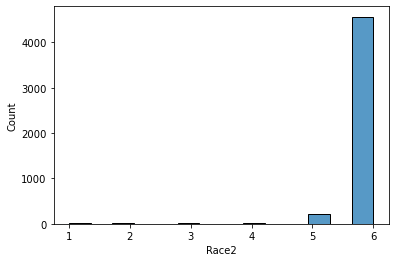

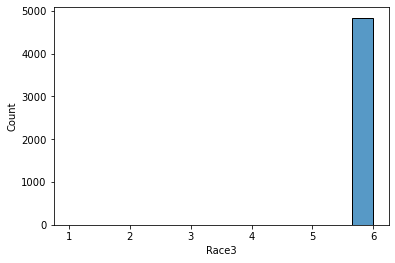

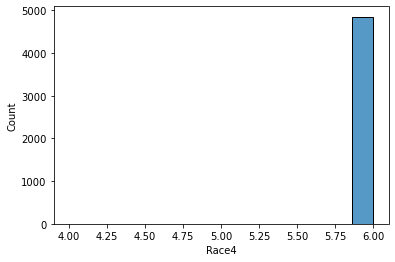

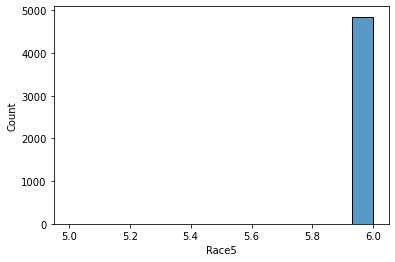

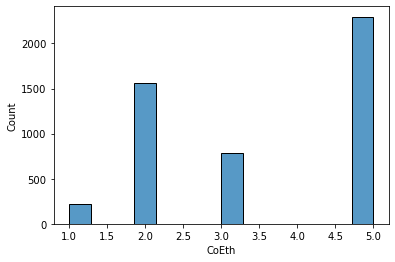

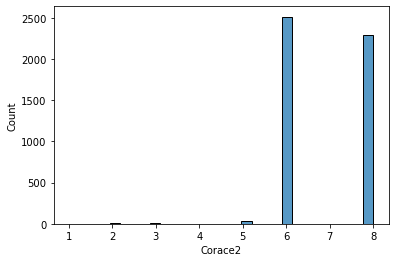

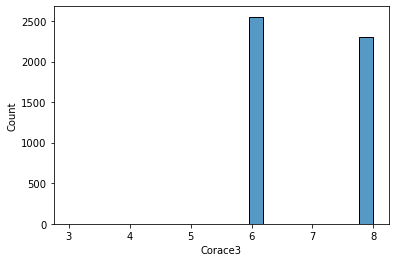

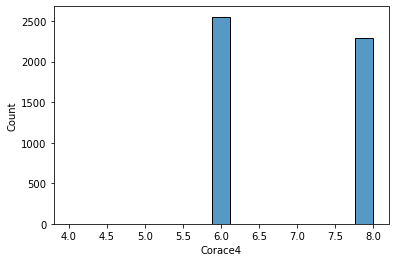

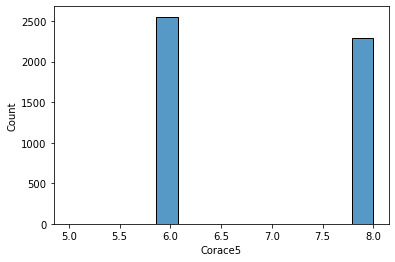

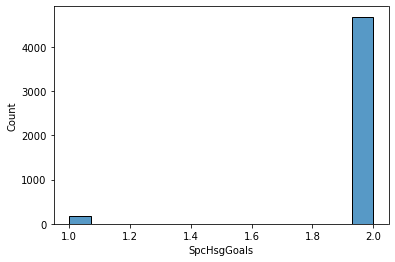

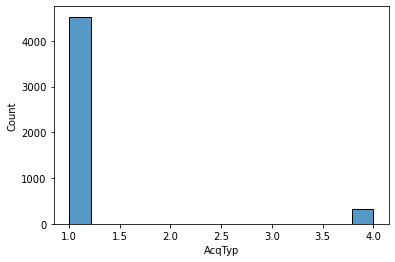

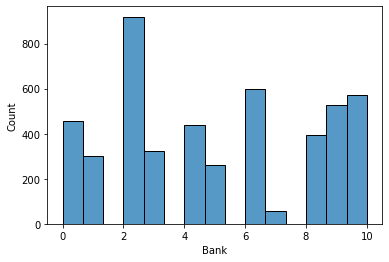

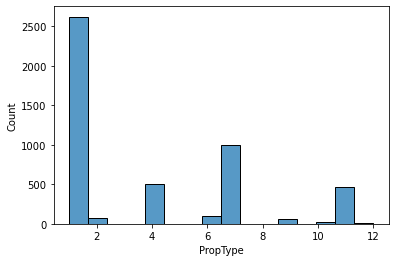

FIPSStateCode  FIPSCountyCode          MSA         FeatureID  \
count    4851.000000     4851.000000  4851.000000       4851.000000   
mean       28.597403      106.644816 38972.571222 8235746285.483199   
std        18.341203      149.183018 23816.645644 3811775539.843000   
min         1.000000        1.000000 10180.000000       6920.000000   
25%        11.000000       29.000000 19820.000000 9999999999.000000   
50%        25.000000       59.000000 35620.000000 9999999999.000000   
75%        48.000000      113.000000 46970.000000 9999999999.000000   
max        72.000000      840.000000 99999.000000 9999999999.000000   

            Tract      MinPer       TraMedY       LocMedY    Tractrat  \
count 4851.000000 4851.000000   4851.000000   4851.000000 4851.000000   
mean  3207.055933   36.503467  87564.222016  75984.334982    1.151325   
std   3571.400393   29.579044  42712.712406  18618.373299    0.498268   
min      1.000000    0.000000      0.000000  18666.000000    0.000000   
25%    111.045000   11.165000  57329.000000  62621.000000    0.833650   
50%   1140.070000   27.270000  76838.000000  71351.000000    1.058500   
75%   6033.000000   58.315000 108750.000000  86766.000000    1.377800   
max   9900.000000  100.000000 250001.000000 121130.000000    3.903700   

              Income  ...       Race5       CoEth     Corace2     Corace3  \
count    4851.000000  ... 4851.000000 4851.000000 4851.000000 4851.000000   
mean   183656.909091  ...    5.999794    3.536384    6.929911    6.945372   
std    293897.508668  ...    0.014358    1.451081    1.037460    1.001290   
min     13560.000000  ...    5.000000    1.000000    1.000000    3.000000   
25%     71035.000000  ...    6.000000    2.000000    6.000000    6.000000   
50%    120192.000000  ...    6.000000    3.000000    6.000000    6.000000   
75%    193626.000000  ...    6.000000    5.000000    8.000000    8.000000   
max   9614088.000000  ...    6.000000    5.000000    8.000000    8.000000   

          Corace4     Corace5  SpcHsgGoals      AcqTyp        Bank    PropType  
count 4851.000000 4851.000000  4851.000000 4851.000000 4851.000000 4851.000000  
mean     6.945991    6.946403     1.965780    1.199753    4.904968    3.787054  
std      0.999778    0.998975     0.181812    0.747979    3.317905    3.488746  
min      4.000000    5.000000     1.000000    1.000000    0.000000    1.000000  
25%      6.000000    6.000000     2.000000    1.000000    2.000000    1.000000  
50%      6.000000    6.000000     2.000000    1.000000    4.000000    1.000000  
75%      8.000000    8.000000     2.000000    1.000000    8.000000    7.000000  
max      8.000000    8.000000     2.000000    4.000000   10.000000   12.000000  

[8 rows x 51 columns]

In [79]:
# statistical summary of the numerical variables

for i in df_final.columns:
    sns.histplot(df_final[X2.Cluster_DB== -1][i])
    plt.show()
    
df_final[X2.Cluster_DB== -1].describe()

In [80]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 > Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

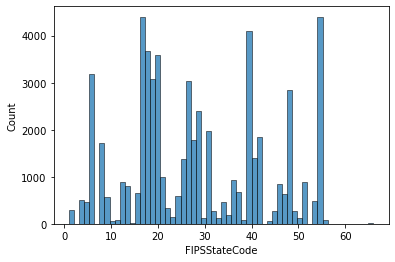

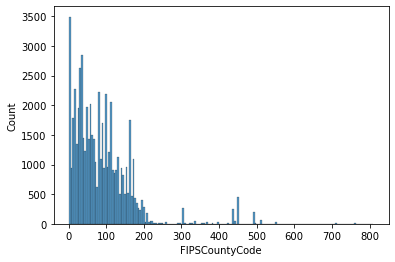

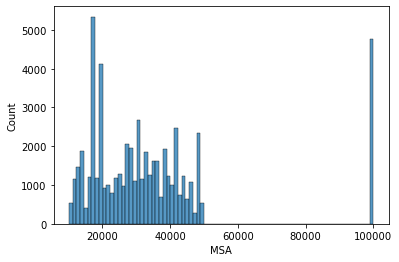

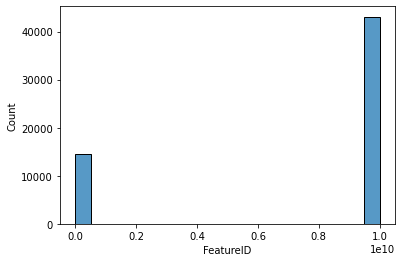

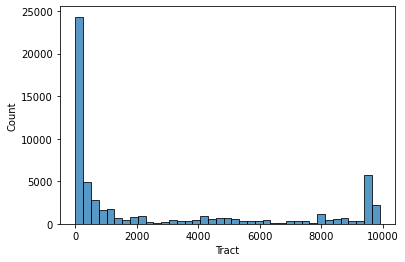

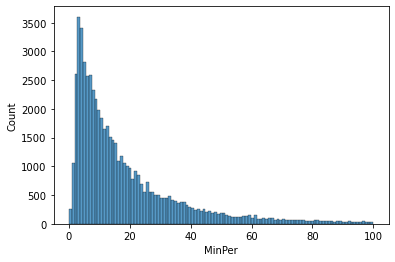

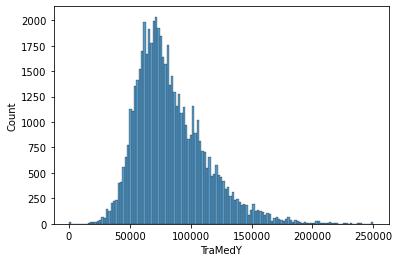

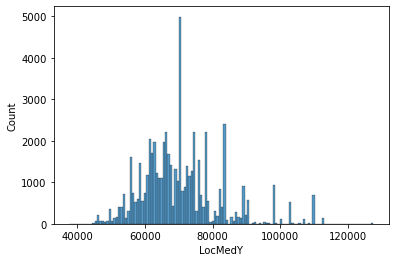

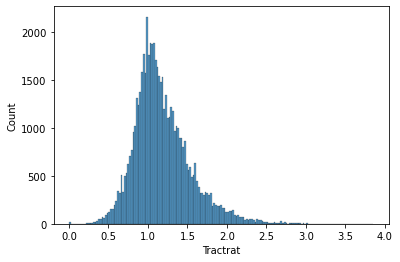

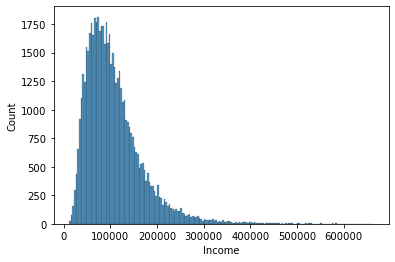

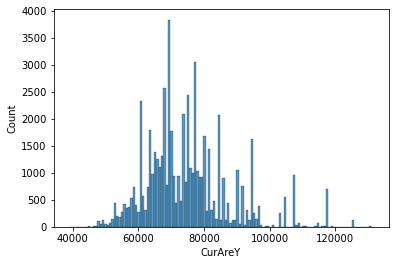

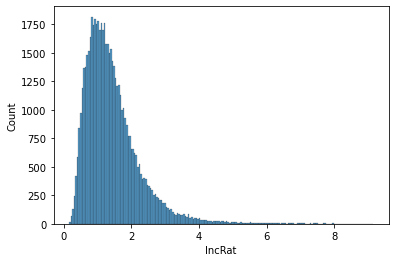

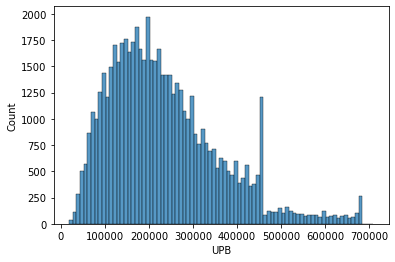

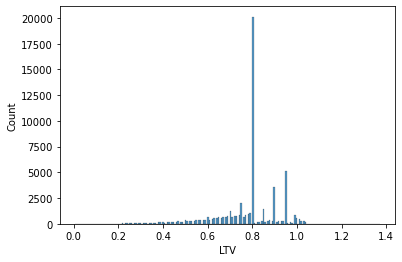

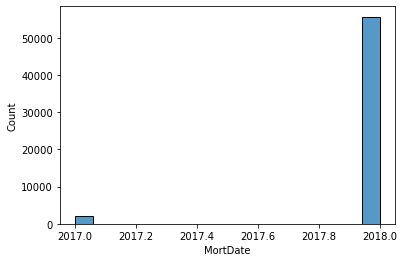

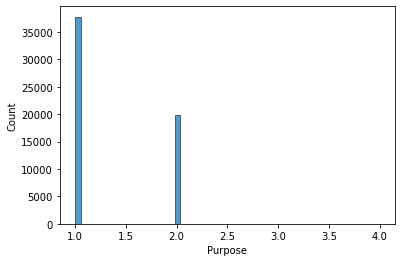

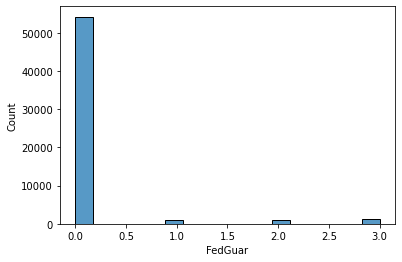

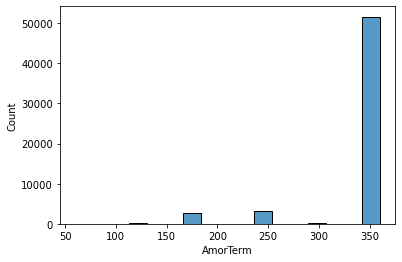

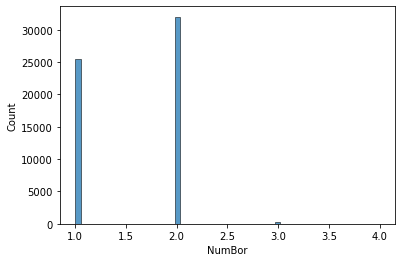

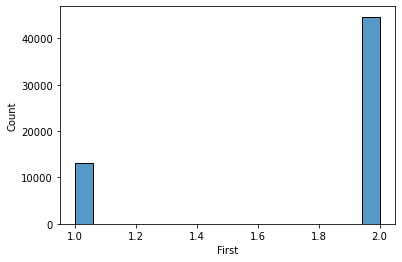

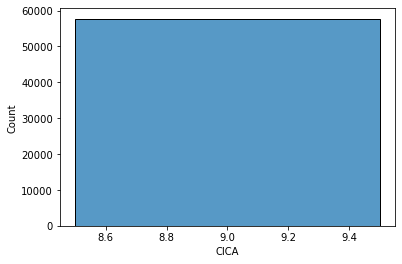

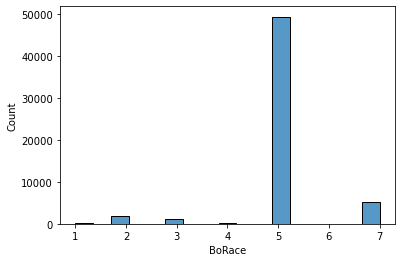

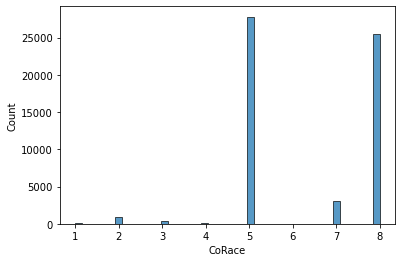

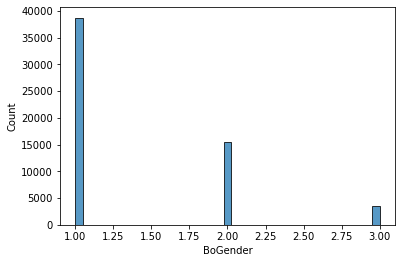

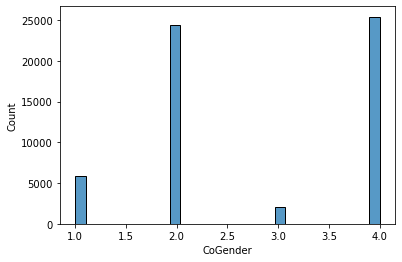

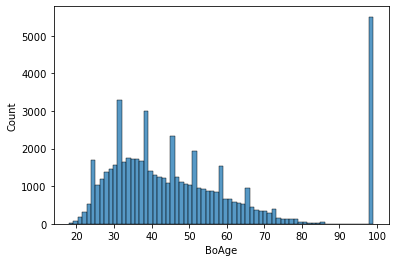

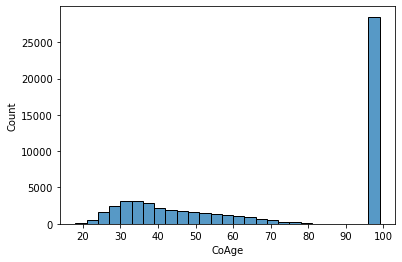

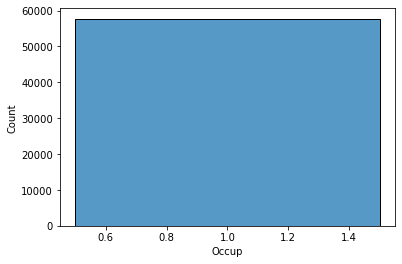

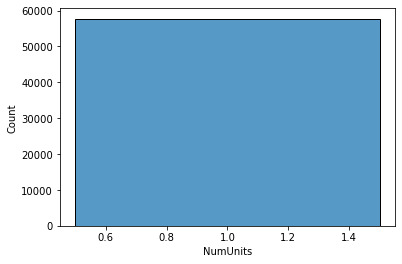

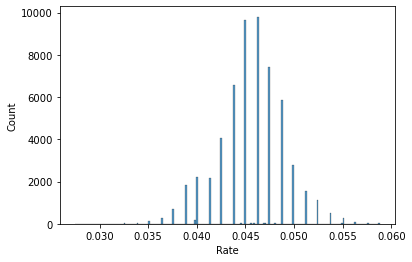

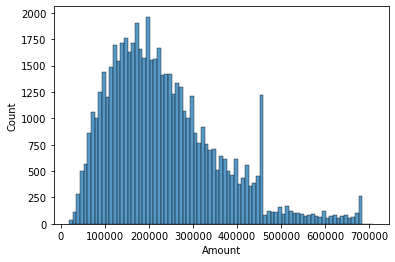

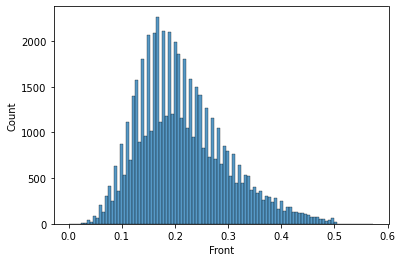

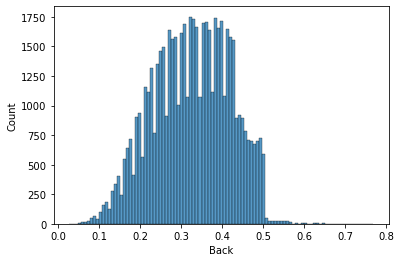

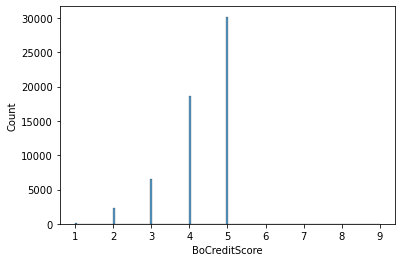

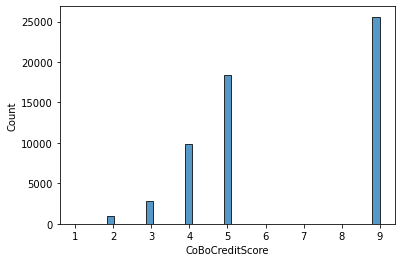

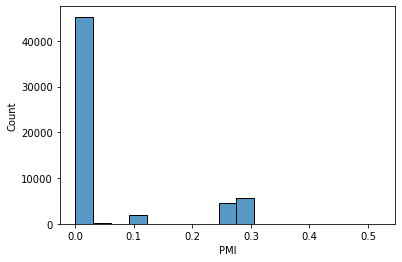

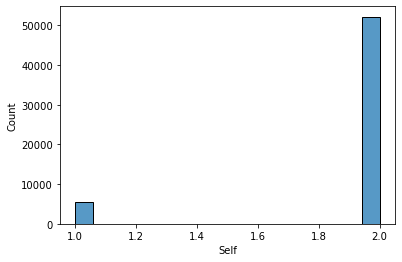

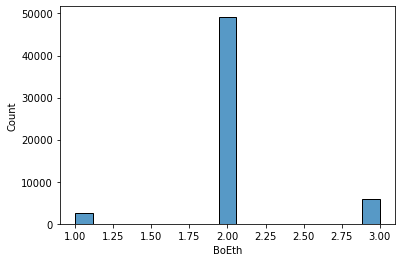

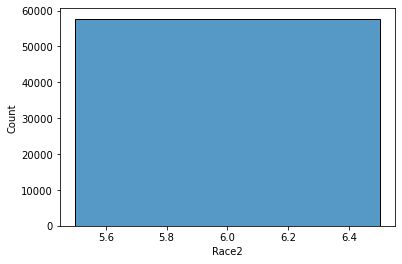

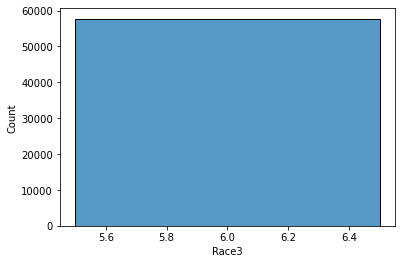

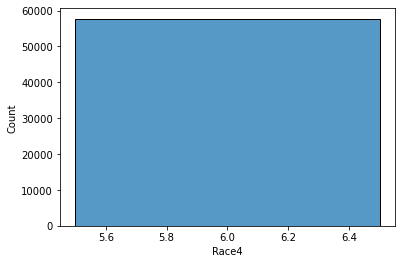

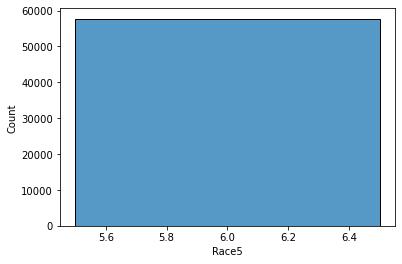

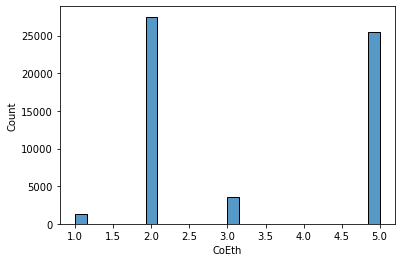

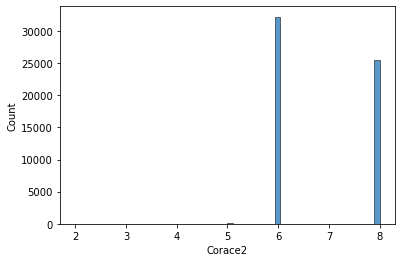

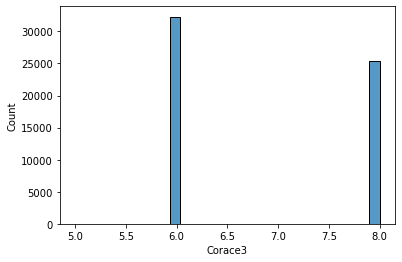

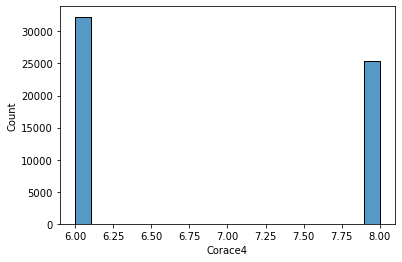

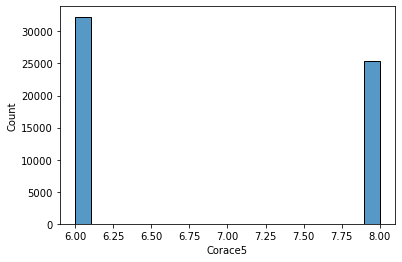

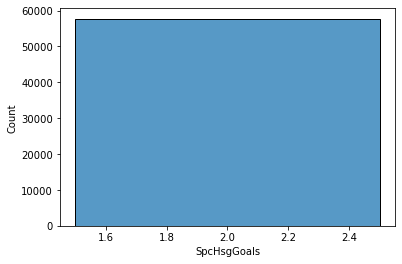

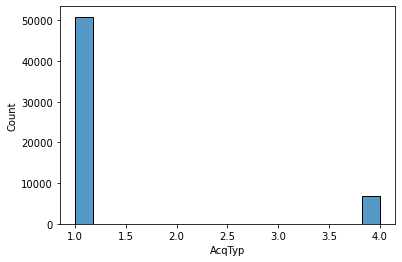

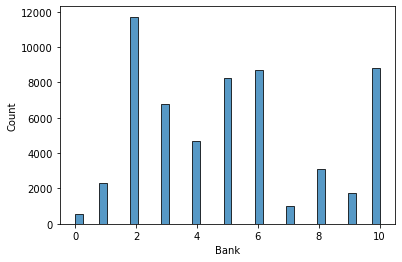

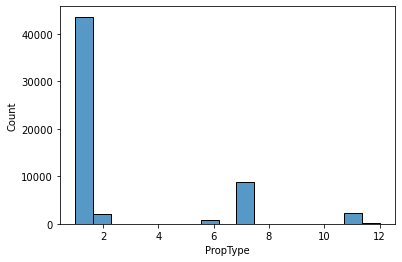

FIPSStateCode  FIPSCountyCode          MSA         FeatureID  \
count   57716.000000    57716.000000 57716.000000      57716.000000   
mean       28.367333       87.300246 34658.124766 7467572988.848309   
std        14.665522       78.969813 22213.060162 4348158706.660817   
min         1.000000        1.000000 10100.000000       6920.000000   
25%        18.000000       32.500000 19340.000000    2412087.000000   
50%        26.000000       73.000000 30660.000000 9999999999.000000   
75%        39.000000      121.000000 40900.000000 9999999999.000000   
max        66.000000      810.000000 99999.000000 9999999999.000000   

             Tract       MinPer       TraMedY       LocMedY     Tractrat  \
count 57716.000000 57716.000000  57716.000000  57716.000000 57716.000000   
mean   2750.561526    18.305087  83703.246708  70349.136929     1.181181   
std    3628.700250    17.978916  28848.122839  11697.881656     0.358400   
min       1.000000     0.000000      0.000000  37529.000000     0.000000   
25%     103.020000     5.820000  63206.000000  62469.000000     0.945675   
50%     504.310000    12.120000  78061.000000  69373.000000     1.120000   
75%    5068.030000    23.970000 100129.000000  75898.000000     1.367700   
max    9900.010000   100.000000 250001.000000 127500.000000     3.852600   

             Income  ...        Race5        CoEth      Corace2      Corace3  \
count  57716.000000  ... 57716.000000 57716.000000 57716.000000 57716.000000   
mean  107083.062028  ...     6.000000     3.361442     6.879184     6.881038   
std    61346.536197  ...     0.000000     1.481276     0.996455     0.992960   
min    11004.000000  ...     6.000000     1.000000     2.000000     5.000000   
25%    64608.000000  ...     6.000000     2.000000     6.000000     6.000000   
50%    94404.000000  ...     6.000000     3.000000     6.000000     6.000000   
75%   133575.000000  ...     6.000000     5.000000     8.000000     8.000000   
max   663482.000000  ...     6.000000     5.000000     8.000000     8.000000   

           Corace4      Corace5  SpcHsgGoals       AcqTyp         Bank  \
count 57716.000000 57716.000000 57716.000000 57716.000000 57716.000000   
mean      6.881073     6.881073     2.000000     1.353143     5.101410   
std       0.992912     0.992912     0.000000     0.966817     2.875382   
min       6.000000     6.000000     2.000000     1.000000     0.000000   
25%       6.000000     6.000000     2.000000     1.000000     2.000000   
50%       6.000000     6.000000     2.000000     1.000000     5.000000   
75%       8.000000     8.000000     2.000000     1.000000     7.000000   
max       8.000000     8.000000     2.000000     4.000000    10.000000   

          PropType  
count 57716.000000  
mean      2.444036  
std       2.834034  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max      12.000000  

[8 rows x 51 columns]

In [81]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[X2.Cluster_DB== 0][i])
    plt.show()   
df_final[X2.Cluster_DB== 0].describe()

In [82]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 > Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

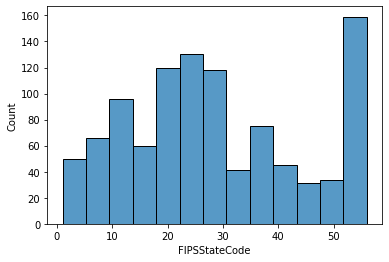

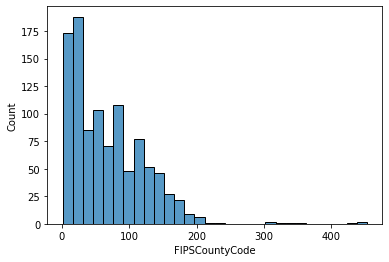

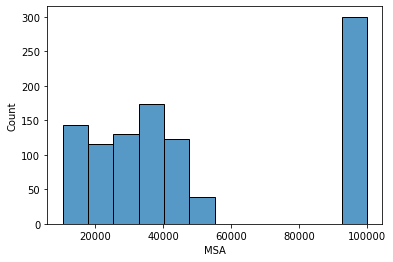

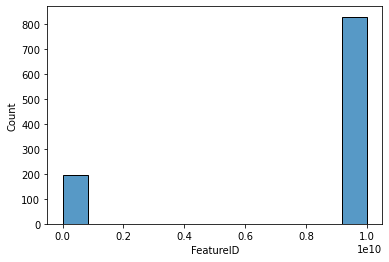

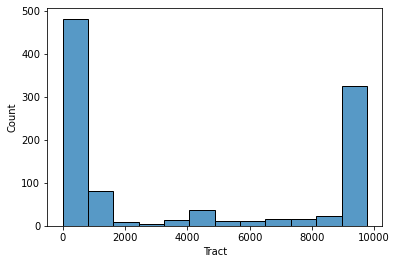

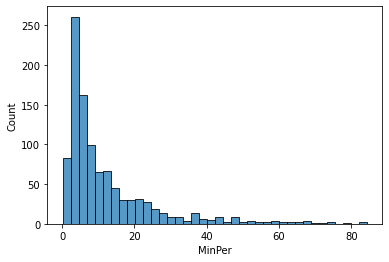

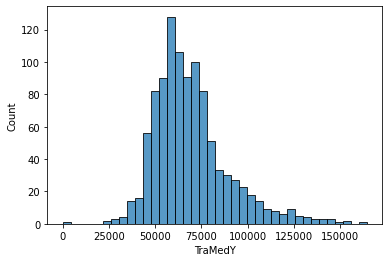

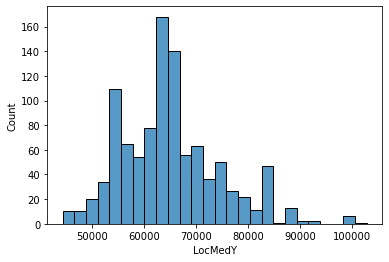

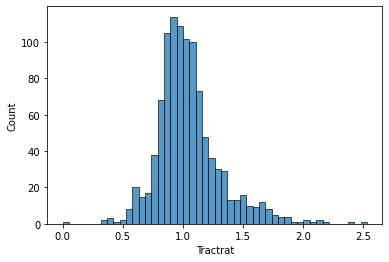

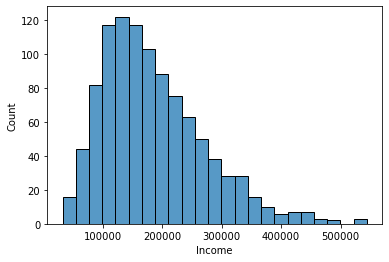

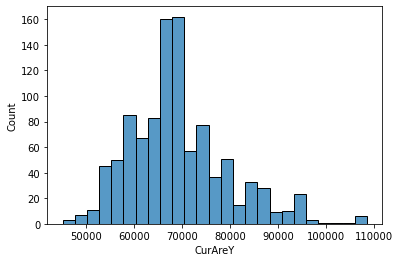

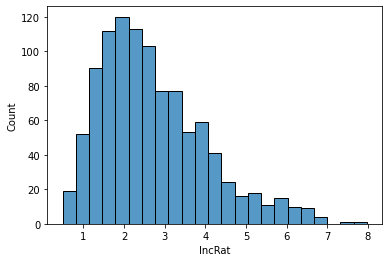

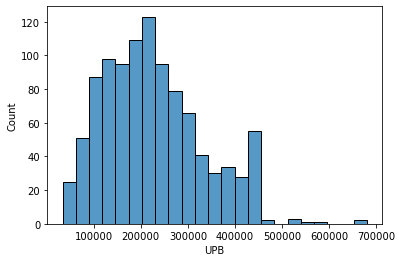

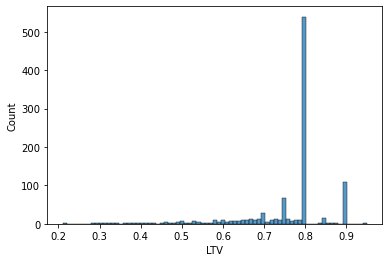

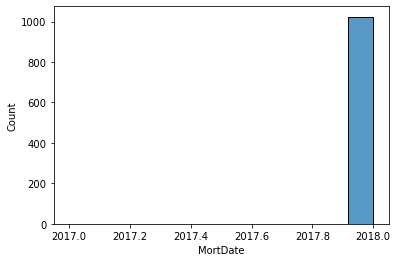

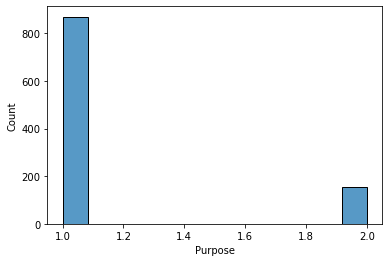

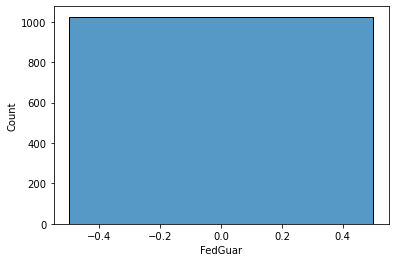

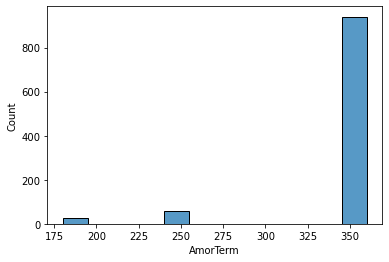

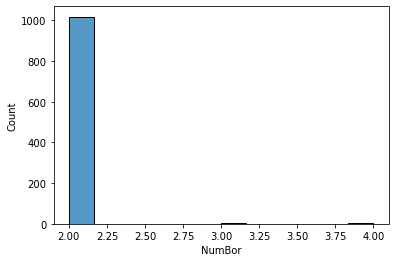

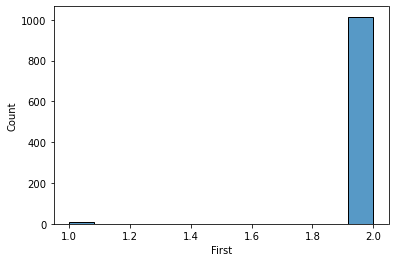

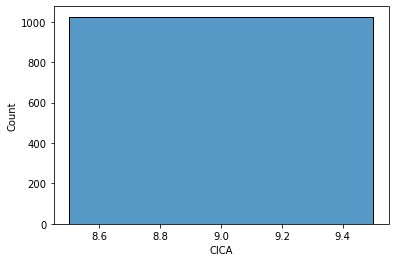

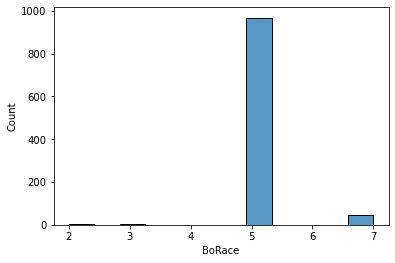

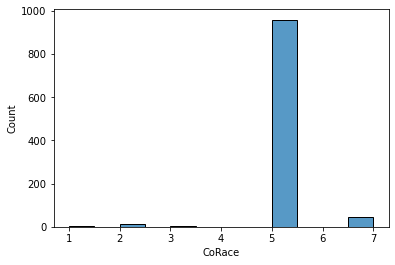

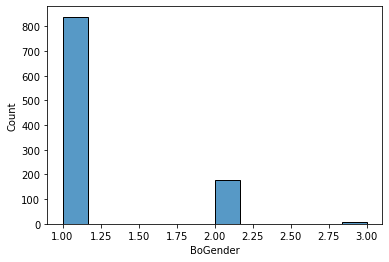

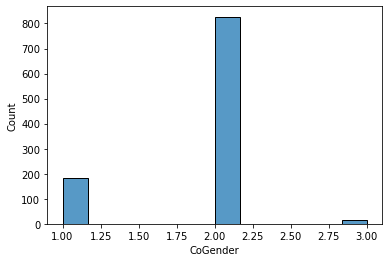

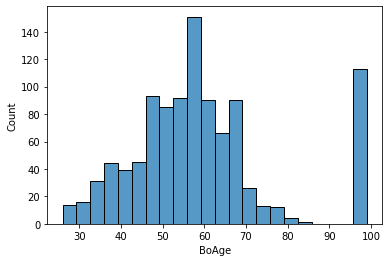

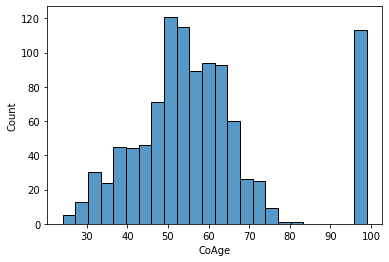

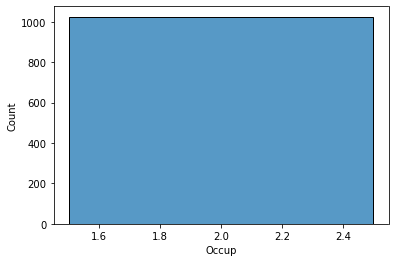

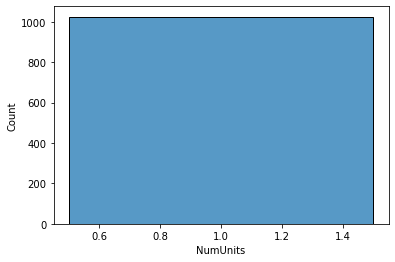

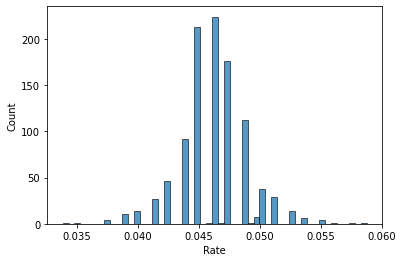

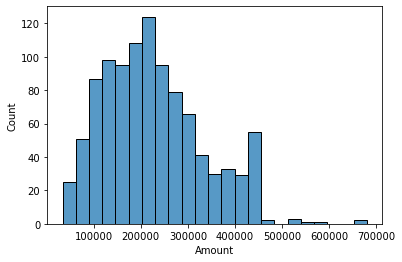

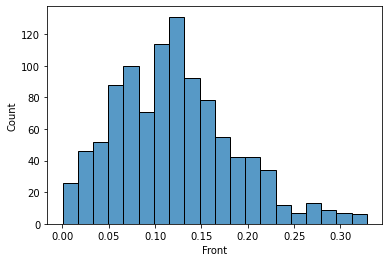

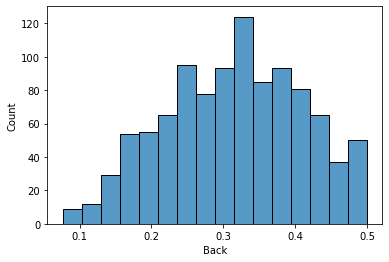

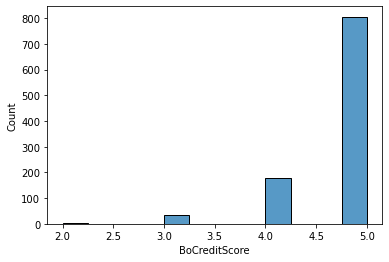

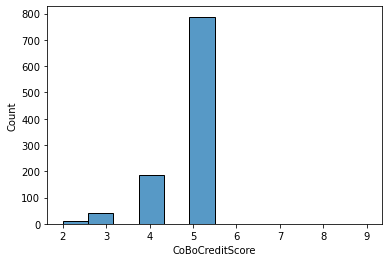

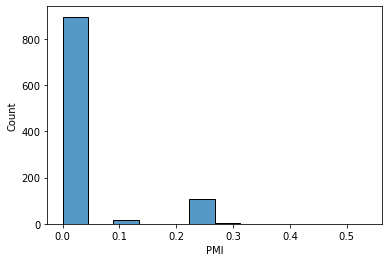

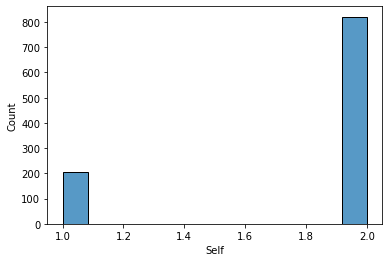

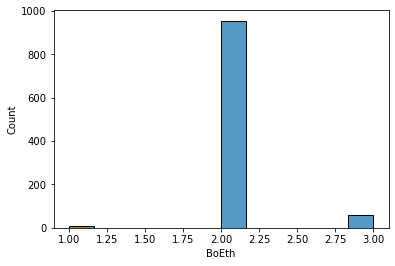

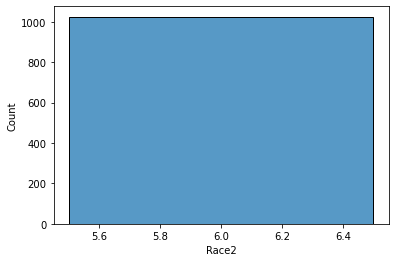

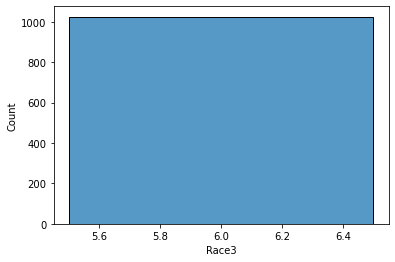

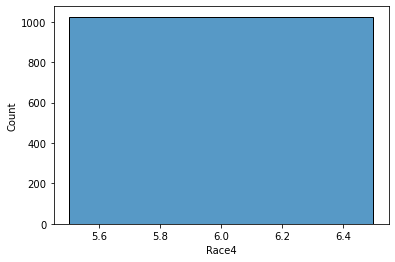

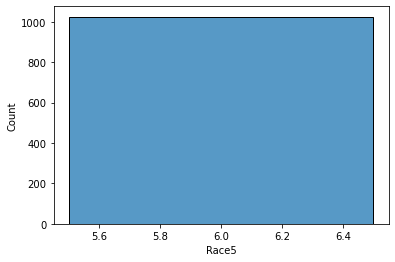

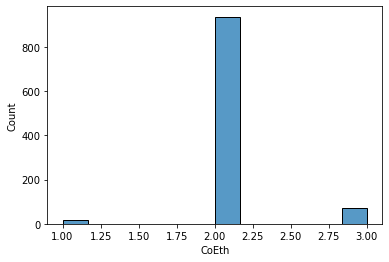

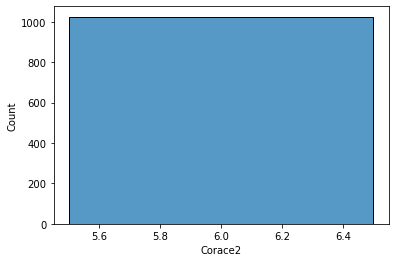

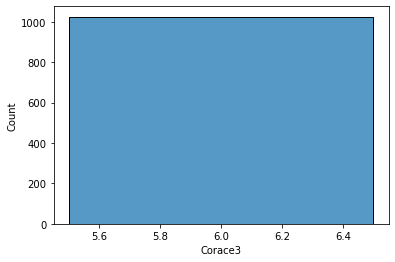

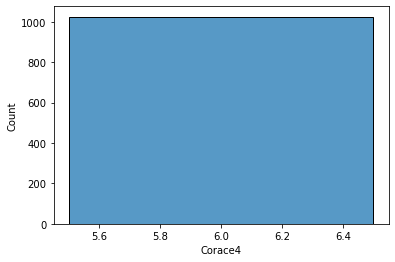

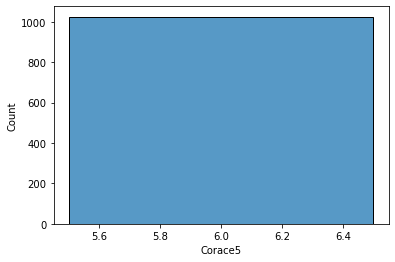

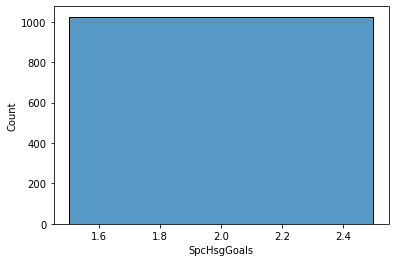

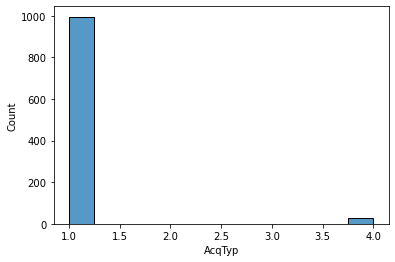

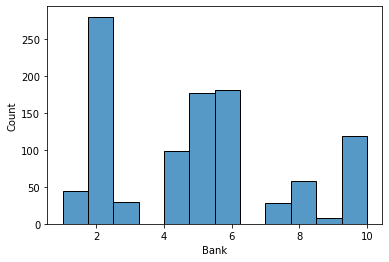

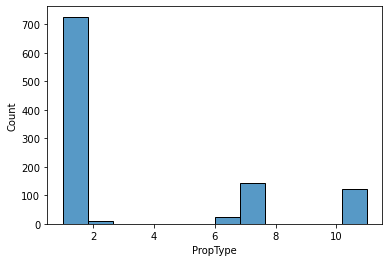

FIPSStateCode  FIPSCountyCode          MSA         FeatureID  \
count    1025.000000     1025.000000  1025.000000       1025.000000   
mean       28.814634       68.552195 50609.050732 8107660966.115122   
std        15.793429       56.234299 33134.106892 3918416082.145312   
min         1.000000        1.000000 10300.000000      25111.000000   
25%        17.000000       27.000000 25200.000000 9999999999.000000   
50%        26.000000       57.000000 38060.000000 9999999999.000000   
75%        40.000000      103.000000 99999.000000 9999999999.000000   
max        56.000000      453.000000 99999.000000 9999999999.000000   

            Tract      MinPer       TraMedY       LocMedY    Tractrat  \
count 1025.000000 1025.000000   1025.000000   1025.000000 1025.000000   
mean  3969.563600   11.957561  69230.775610  64834.651707    1.046978   
std   4289.928288   13.072138  20511.812229   9452.920140    0.269215   
min      1.000000    0.120000      0.000000  44368.000000    0.000000   
25%    110.000000    3.490000  55635.000000  58432.000000    0.882600   
50%   1004.000000    6.850000  65446.000000  63729.000000    1.006700   
75%   9504.000000   14.920000  77635.000000  69758.000000    1.152600   
max   9764.000000   84.310000 164438.000000 102770.000000    2.529200   

             Income  ...       Race5       CoEth     Corace2     Corace3  \
count   1025.000000  ... 1025.000000 1025.000000 1025.000000 1025.000000   
mean  184804.599024  ...    6.000000    2.053659    6.000000    6.000000   
std    86287.125098  ...    0.000000    0.289883    0.000000    0.000000   
min    31704.000000  ...    6.000000    1.000000    6.000000    6.000000   
25%   120526.000000  ...    6.000000    2.000000    6.000000    6.000000   
50%   168828.000000  ...    6.000000    2.000000    6.000000    6.000000   
75%   234948.000000  ...    6.000000    2.000000    6.000000    6.000000   
max   544476.000000  ...    6.000000    3.000000    6.000000    6.000000   

          Corace4     Corace5  SpcHsgGoals      AcqTyp        Bank    PropType  
count 1025.000000 1025.000000  1025.000000 1025.000000 1025.000000 1025.000000  
mean     6.000000    6.000000     2.000000    1.087805    4.862439    3.140488  
std      0.000000    0.000000     0.000000    0.505920    2.680515    3.581878  
min      6.000000    6.000000     2.000000    1.000000    1.000000    1.000000  
25%      6.000000    6.000000     2.000000    1.000000    2.000000    1.000000  
50%      6.000000    6.000000     2.000000    1.000000    5.000000    1.000000  
75%      6.000000    6.000000     2.000000    1.000000    6.000000    7.000000  
max      6.000000    6.000000     2.000000    4.000000   10.000000   11.000000  

[8 rows x 51 columns]

In [83]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[X2.Cluster_DB== 1][i])
    plt.show()
df_final[X2.Cluster_DB== 1].describe()

In [84]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Borower Ethnocity : 2 -- Not Hispanic or Latino 
# Maximum number of BoRace and CoRace are not provide
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached; PT02=Deminimus PUD; and PT06=Low-Rise Condominium;

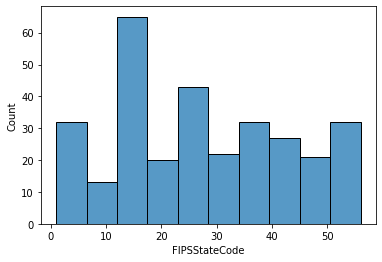

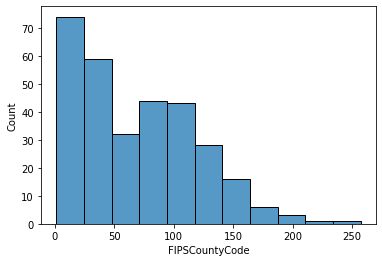

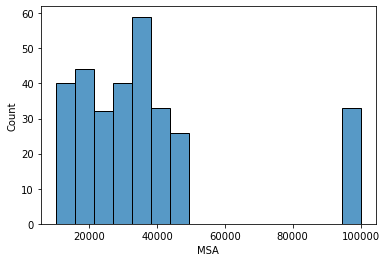

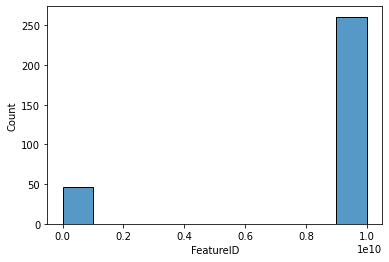

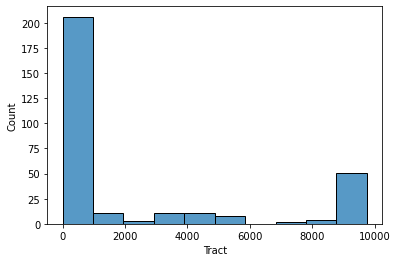

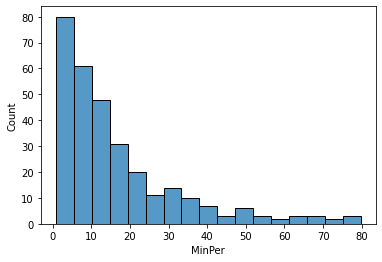

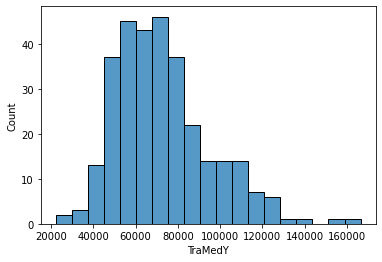

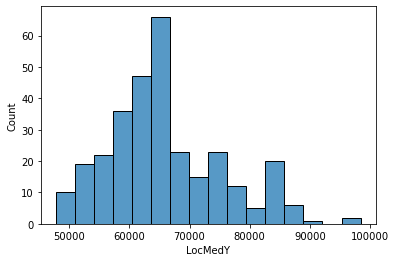

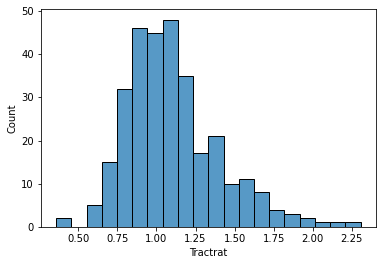

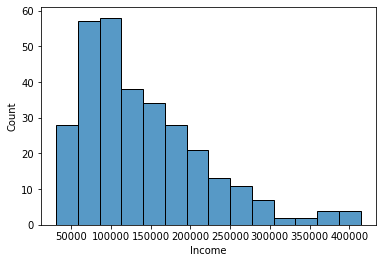

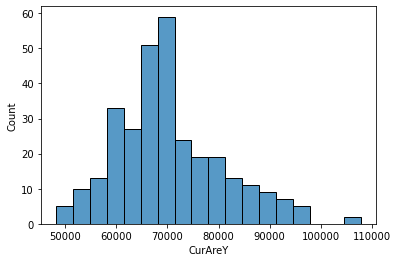

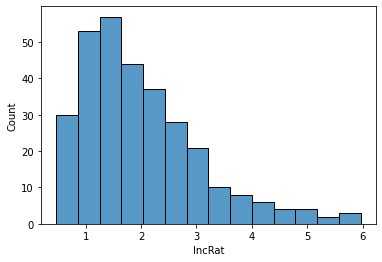

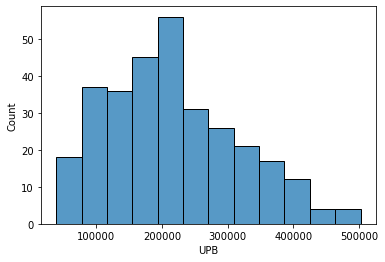

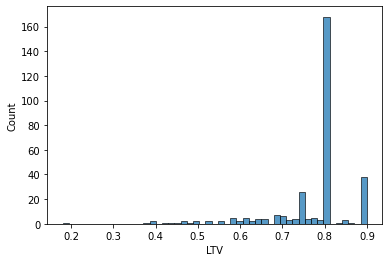

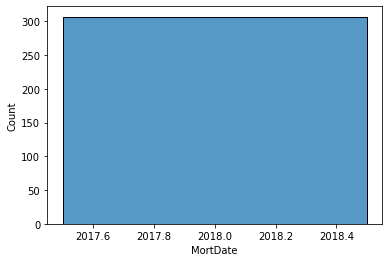

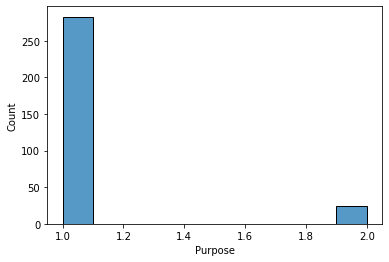

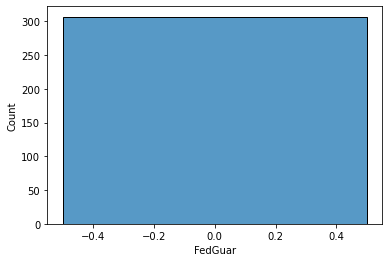

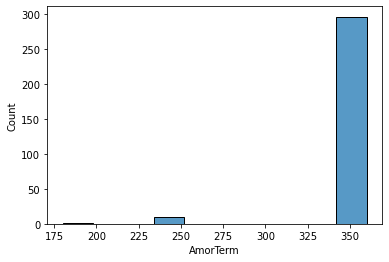

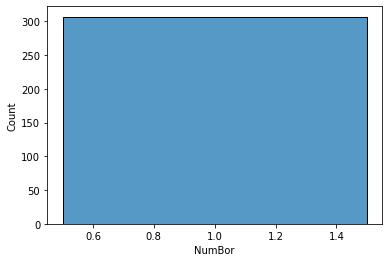

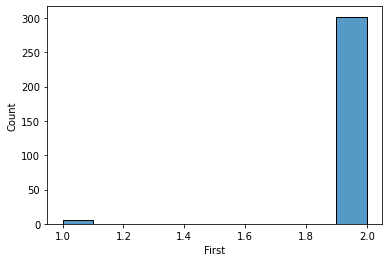

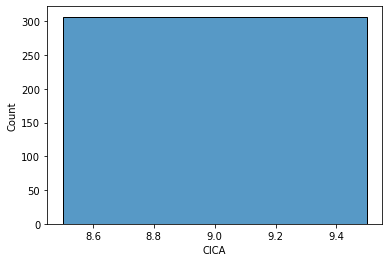

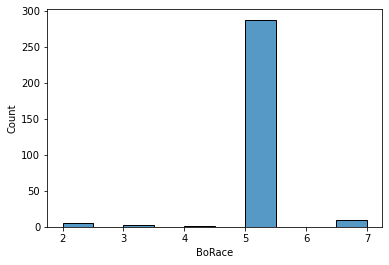

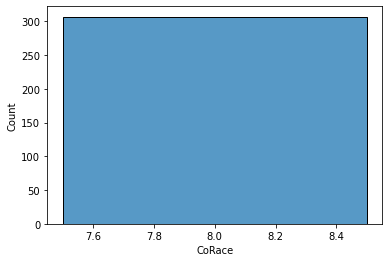

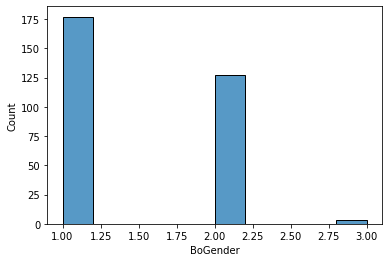

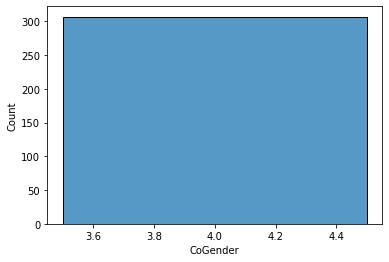

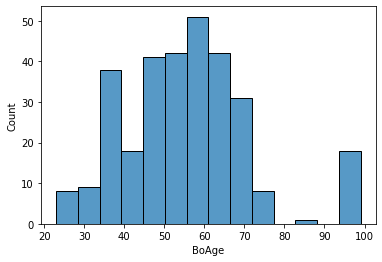

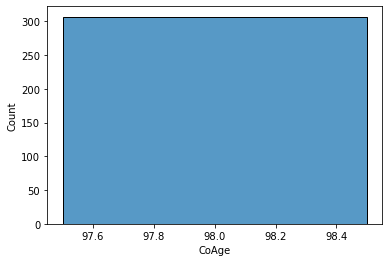

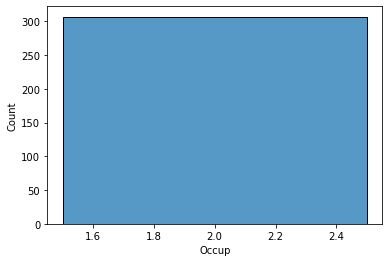

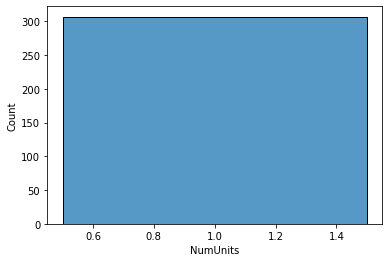

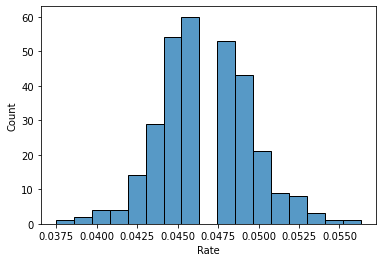

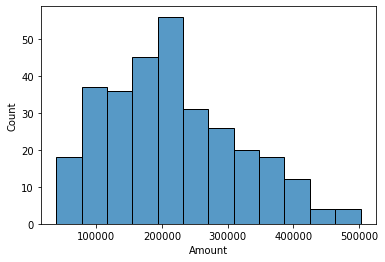

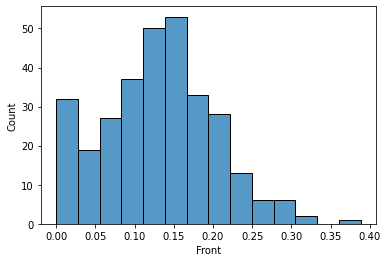

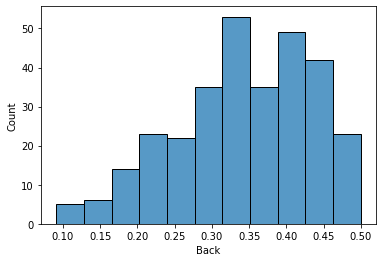

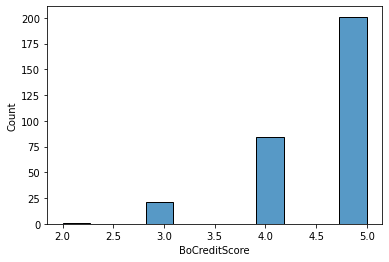

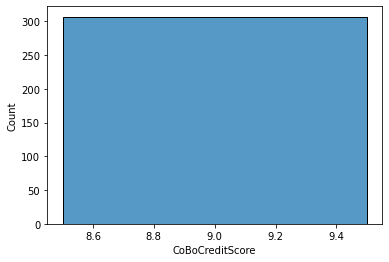

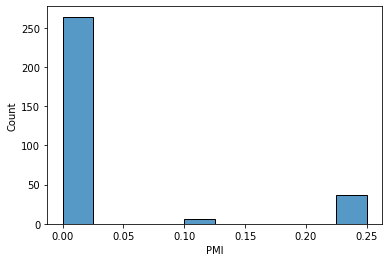

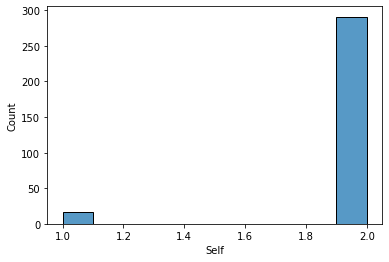

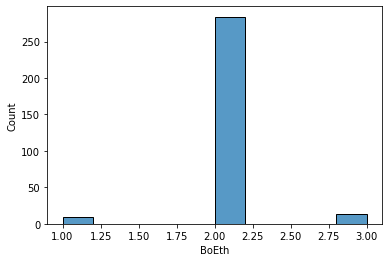

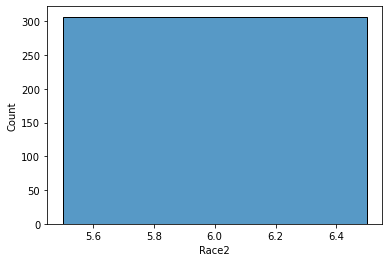

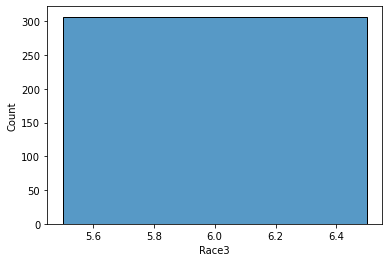

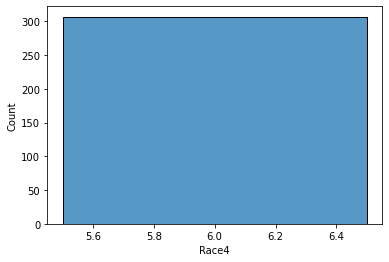

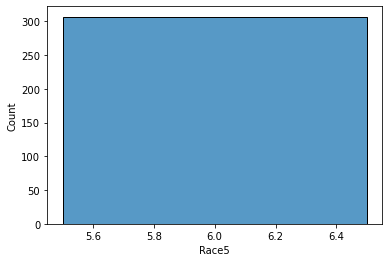

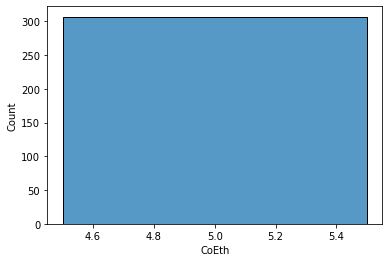

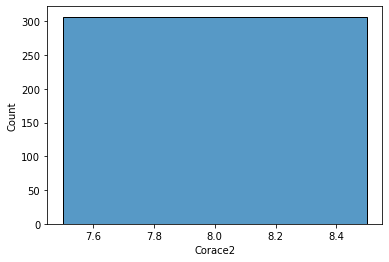

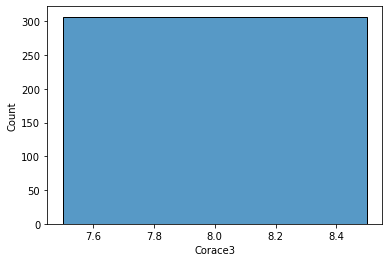

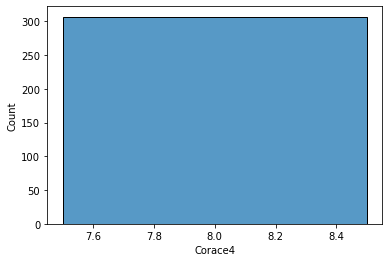

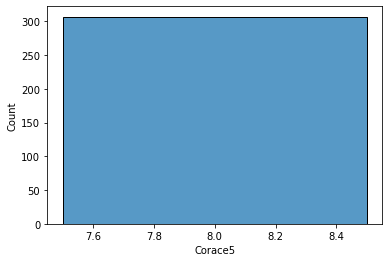

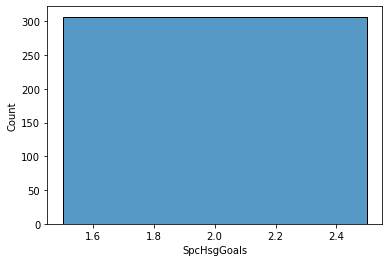

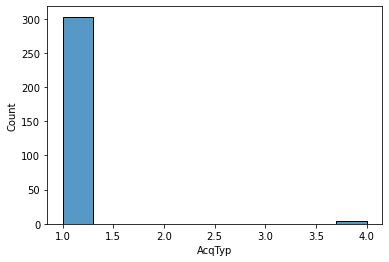

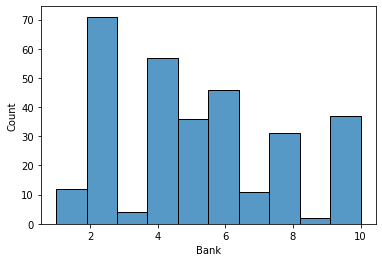

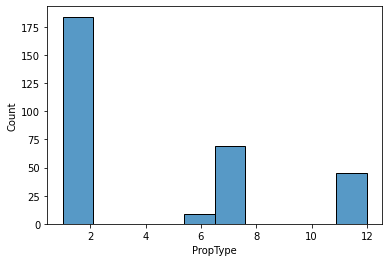

In [85]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[X2.Cluster_DB== 2][i])
    plt.show()

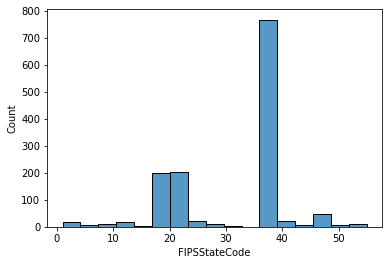

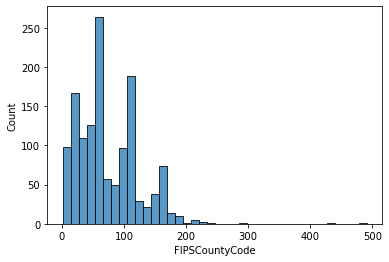

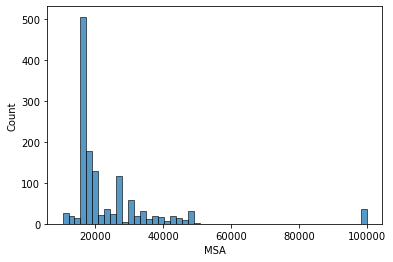

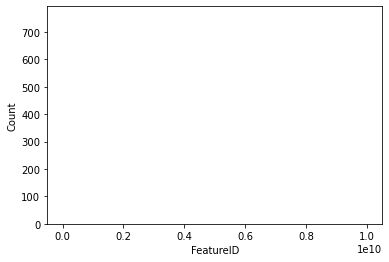

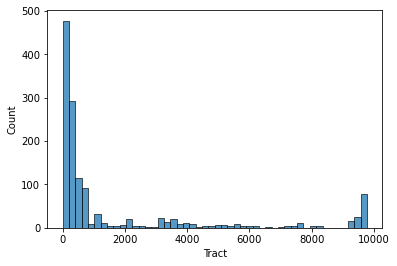

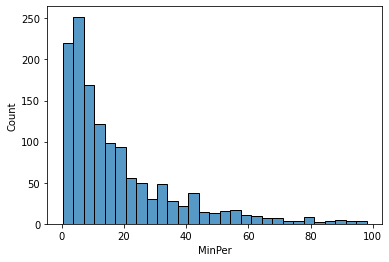

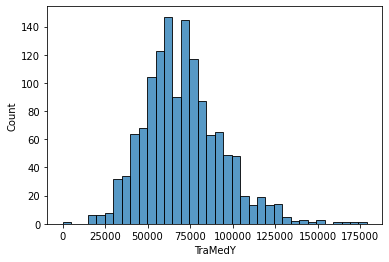

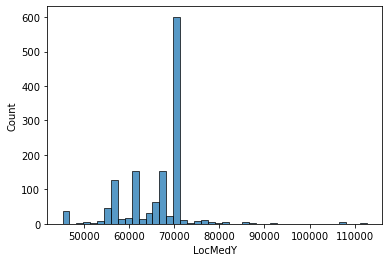

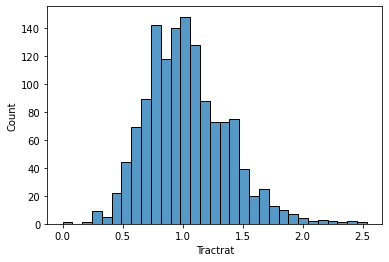

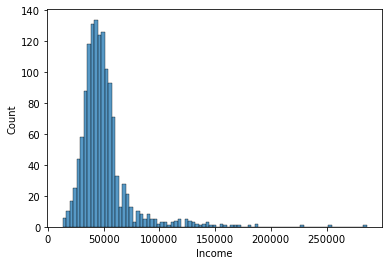

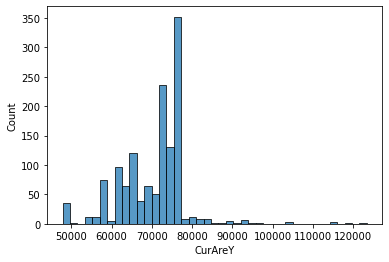

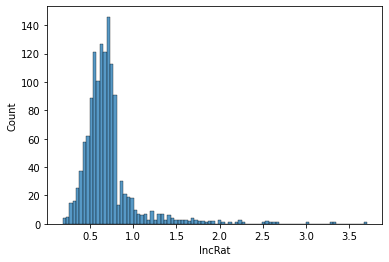

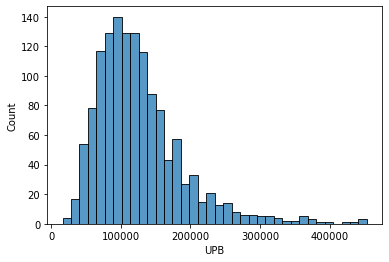

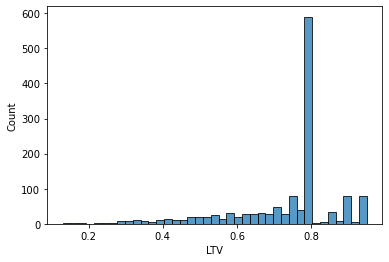

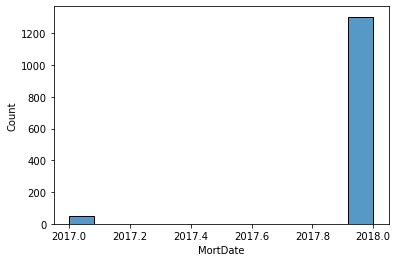

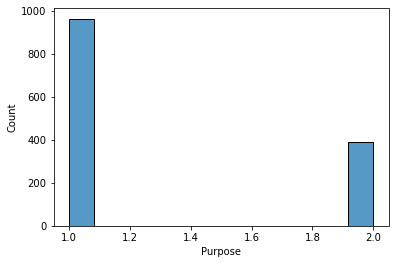

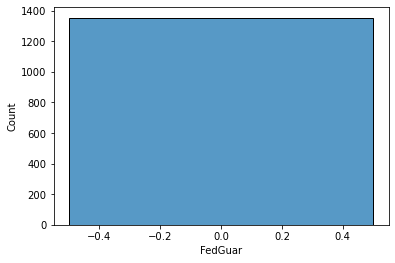

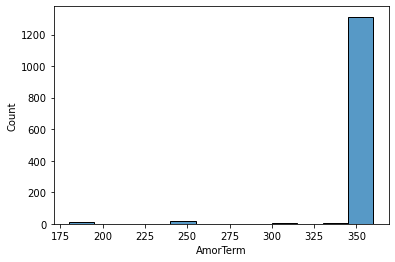

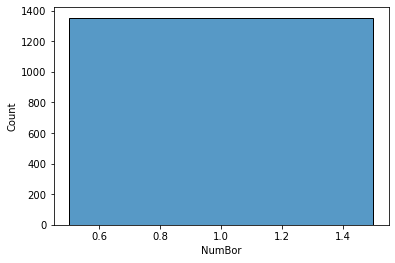

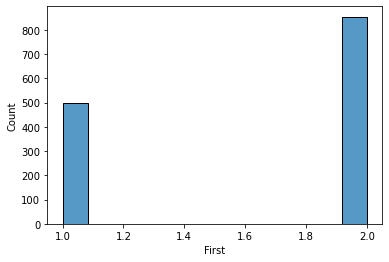

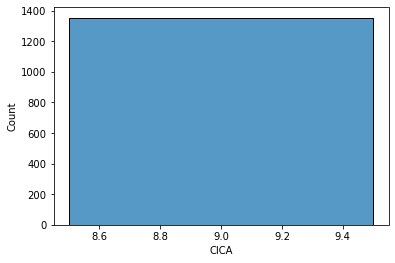

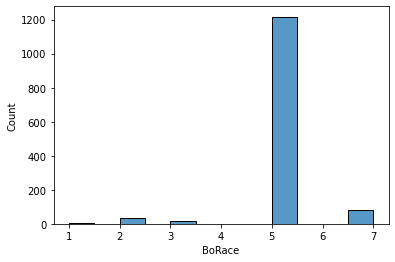

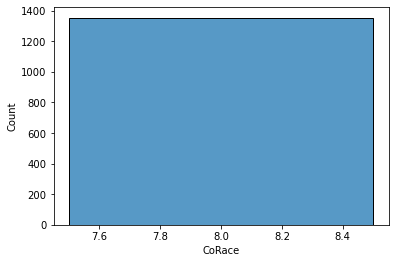

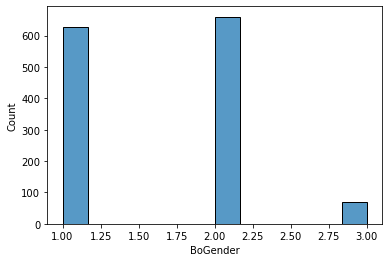

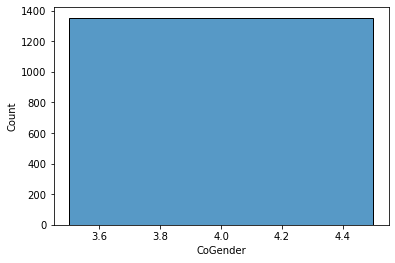

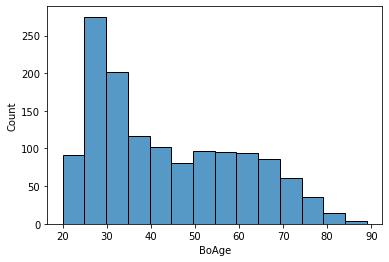

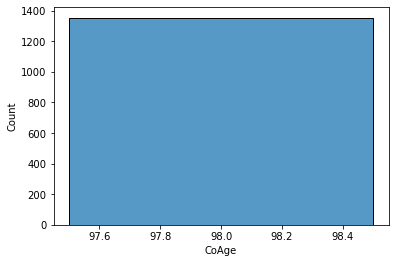

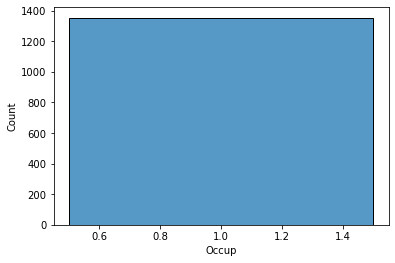

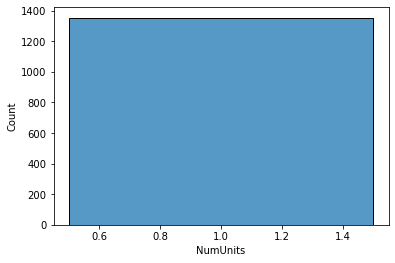

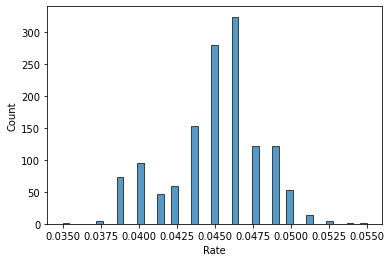

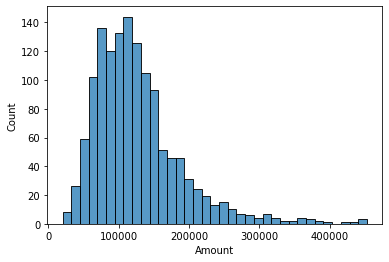

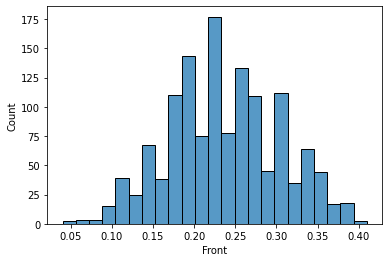

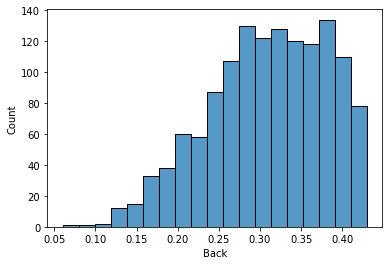

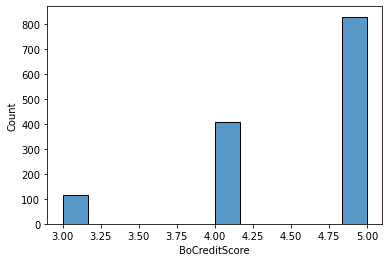

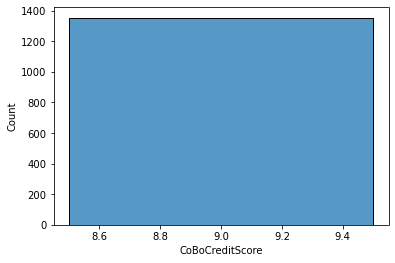

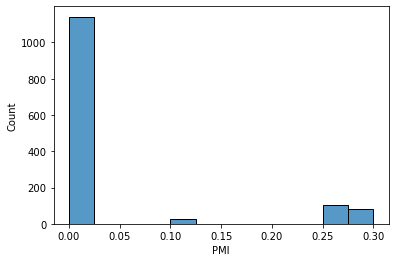

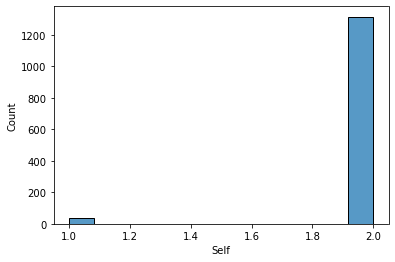

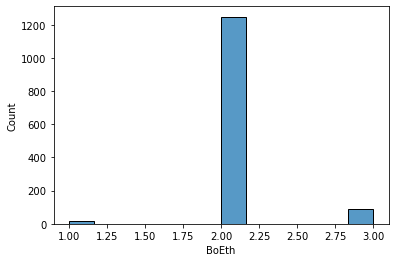

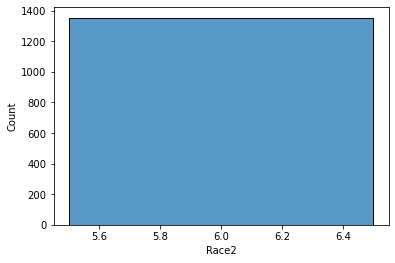

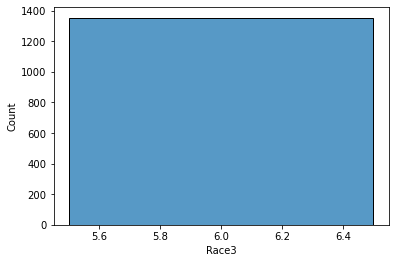

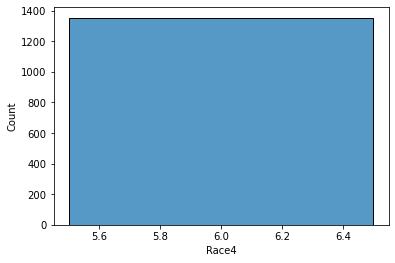

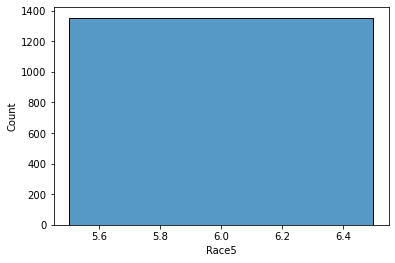

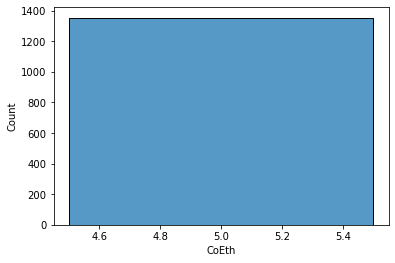

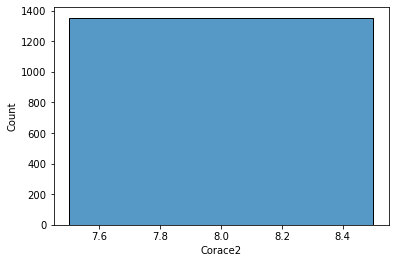

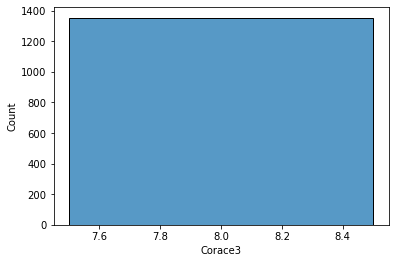

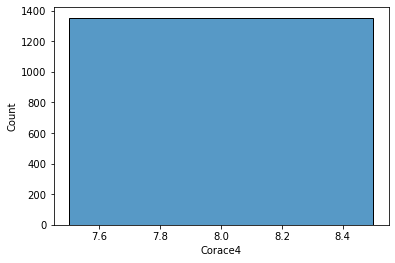

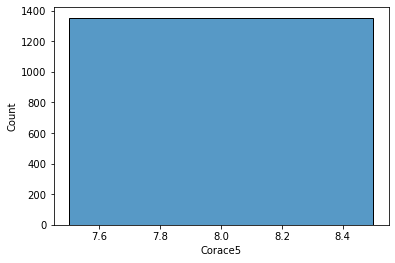

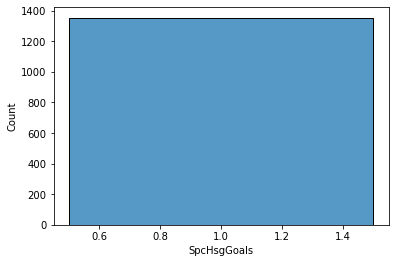

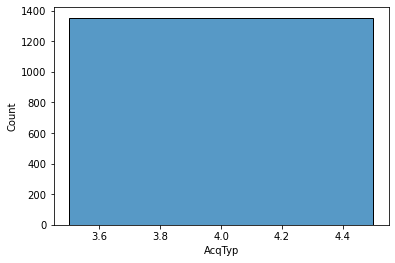

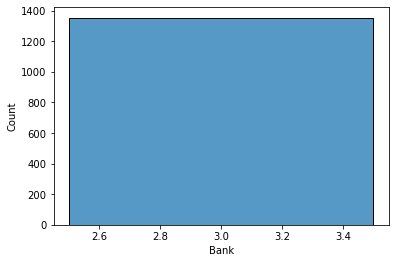

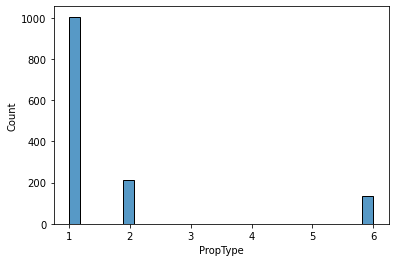

In [86]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[X2.Cluster_DB== 3][i])
    plt.show()

In [87]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Borower Ethnocity : 2 -- Not Hispanic or Latino 
# Maximum number of BoRace and CoRace are not provide
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached; PT02=Deminimus PUD; and PT06=Low-Rise Condominium;

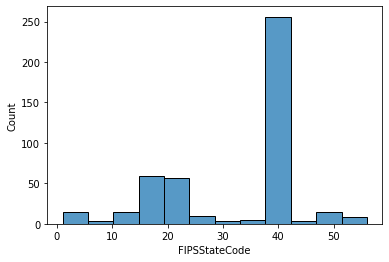

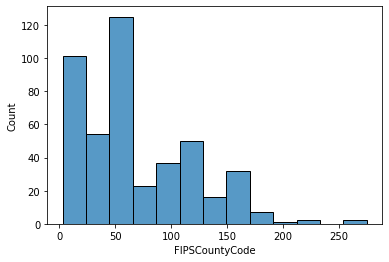

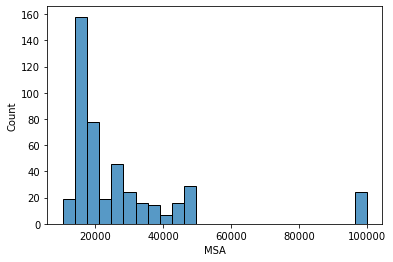

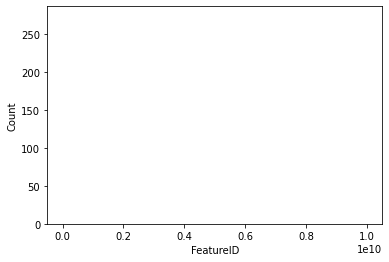

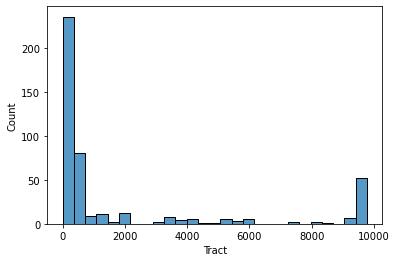

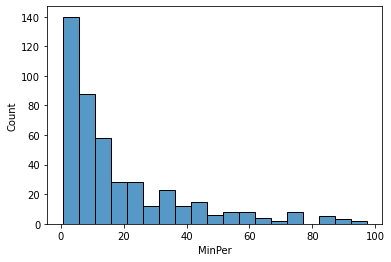

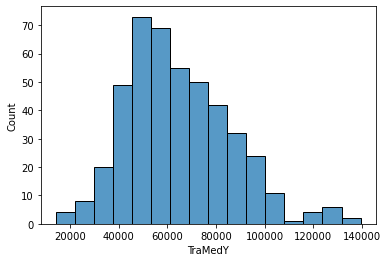

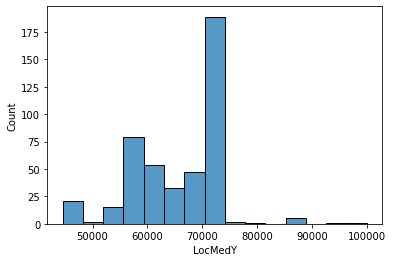

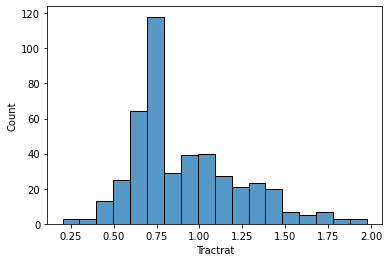

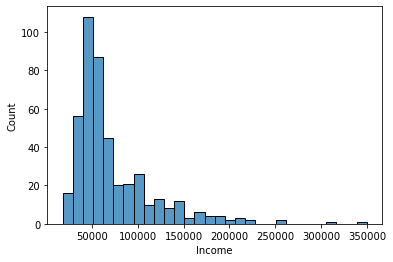

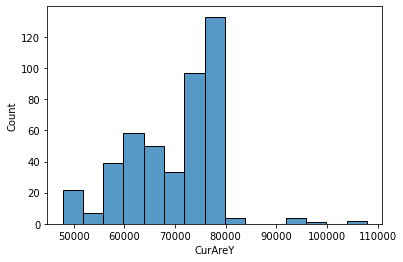

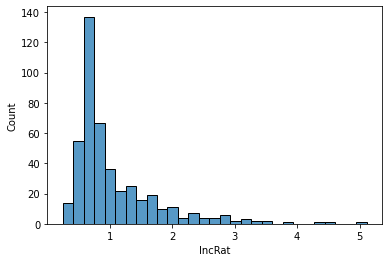

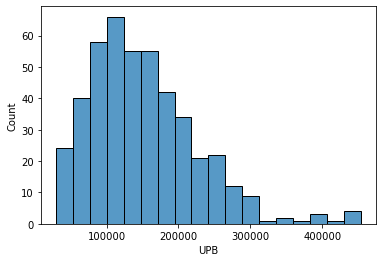

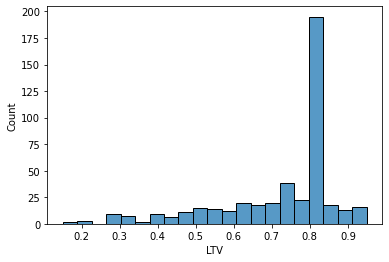

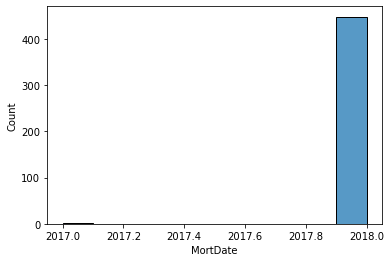

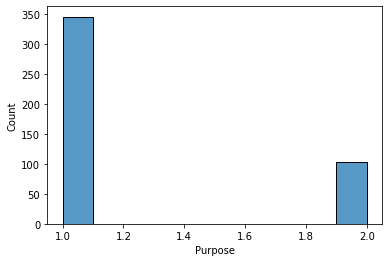

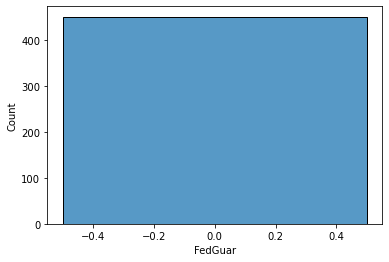

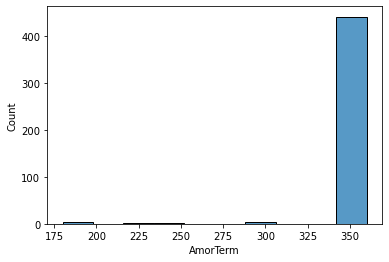

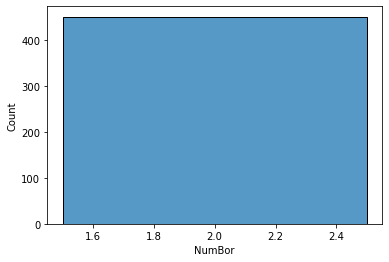

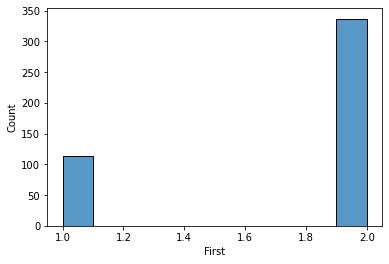

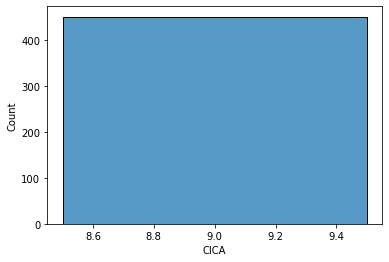

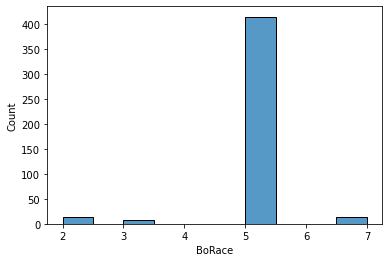

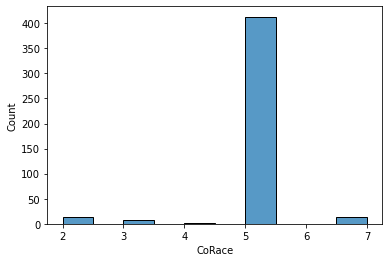

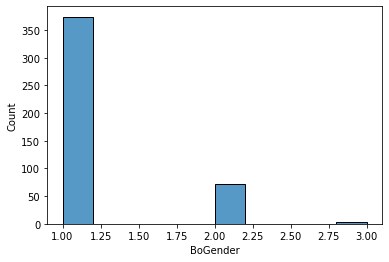

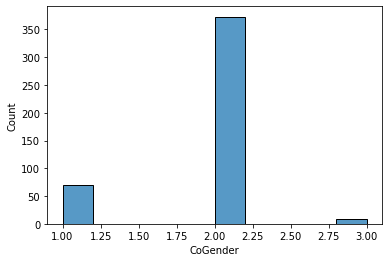

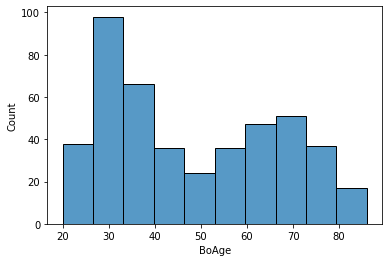

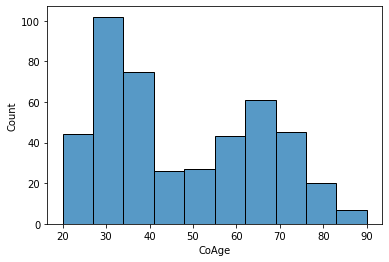

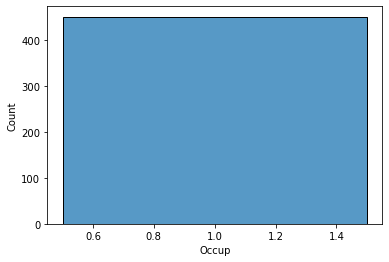

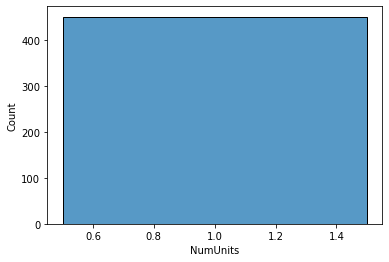

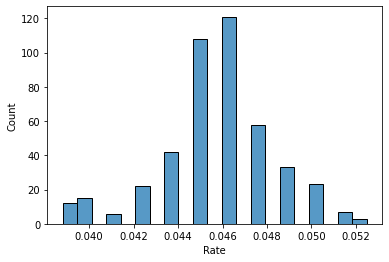

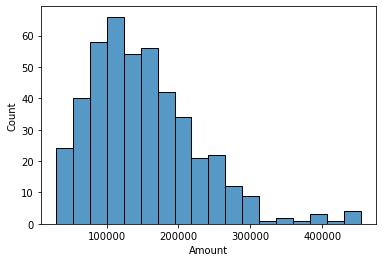

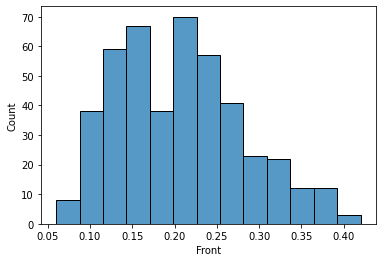

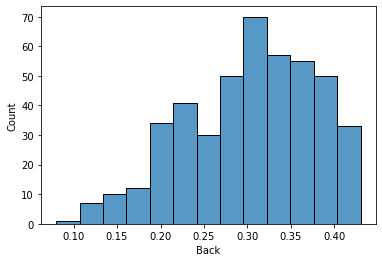

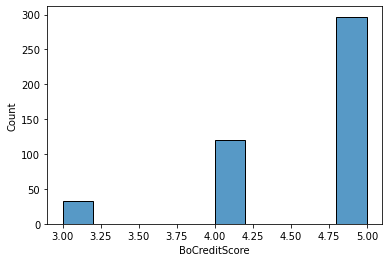

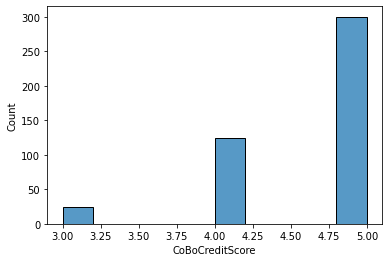

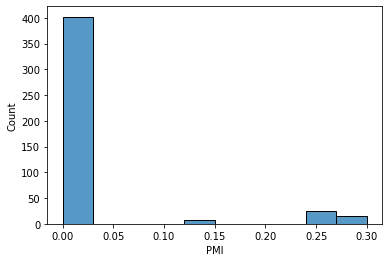

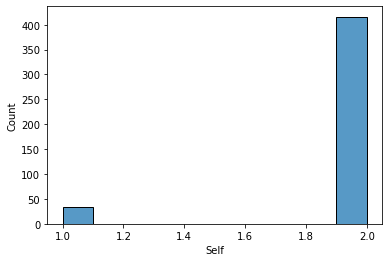

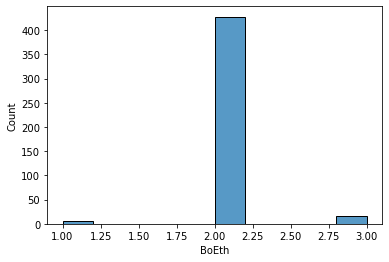

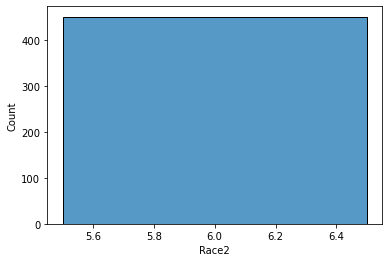

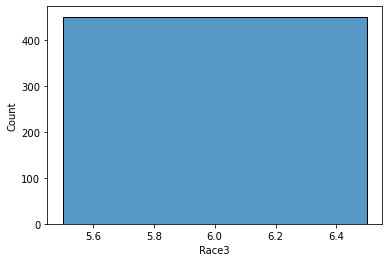

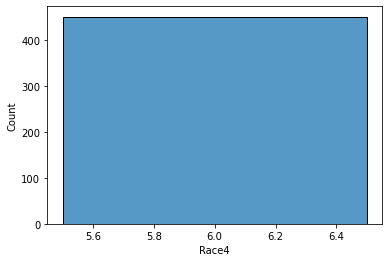

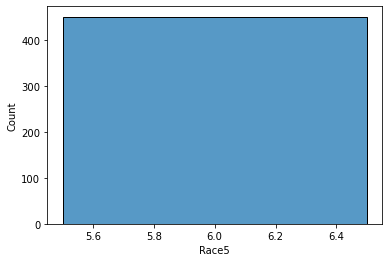

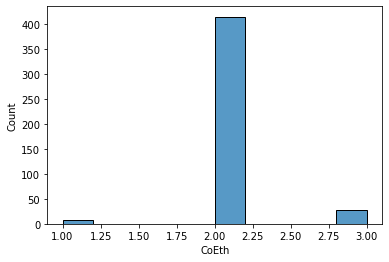

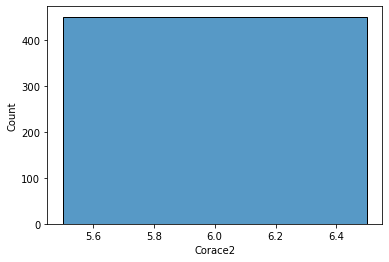

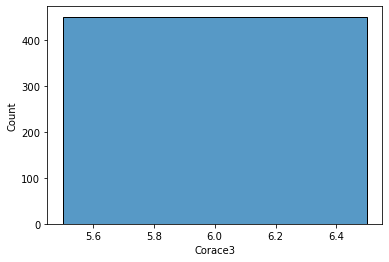

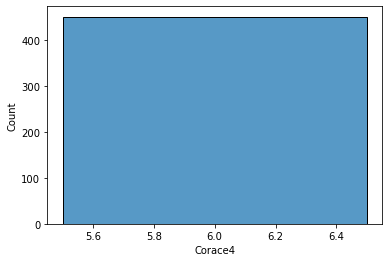

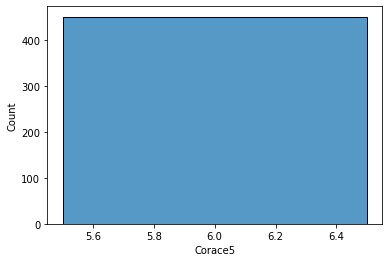

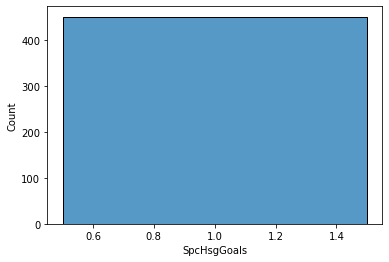

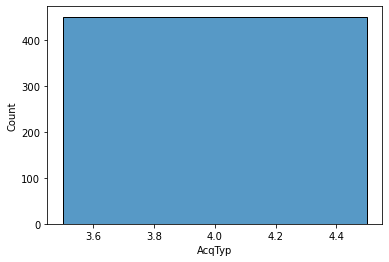

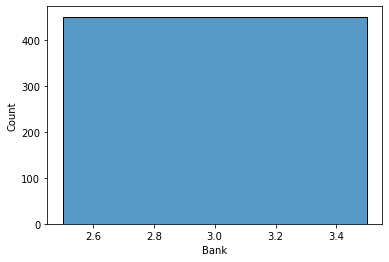

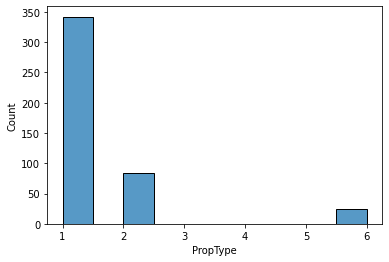

In [88]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[X2.Cluster_DB== 4][i])
    plt.show()

In [89]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 55 ) but highest for (40) >(18-22)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 > Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

In [90]:
# model 3 is not able to explain or differenciate between cluster 1 and cluster 2 properly hence we cannot use this model

#### MOdel 4

 0    64069
-1     1411
 1      223
Name: Cluster_DB, dtype: int64

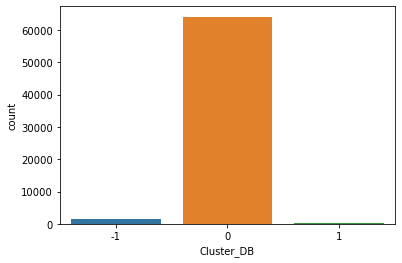

In [91]:
# Build a clustering model4 using DBSCAN 

x= X.copy()

from sklearn.cluster import DBSCAN
db=DBSCAN(eps=6, min_samples=100).fit(x)
x['Cluster_DB']=db.labels_
sns.countplot(x['Cluster_DB'])
x['Cluster_DB'].value_counts()

In [92]:
# statistical summary of the numerical variables
df_final[x.Cluster_DB== -1].describe().T

count              mean               std           min  \
FIPSStateCode   1411.000000         28.843373         18.798378      1.000000   
FIPSCountyCode  1411.000000         99.428774        143.012402      1.000000   
MSA             1411.000000      38515.105599      23540.127505  10380.000000   
FeatureID       1411.000000 8731636452.014883 3328714453.668145 204726.000000   
Tract           1411.000000       3058.342736       3517.506402      1.000000   
MinPer          1411.000000         37.861630         31.498595      0.300000   
TraMedY         1411.000000      82260.763288      40706.783717      0.000000   
LocMedY         1411.000000      73589.031184      18396.206394  18666.000000   
Tractrat        1411.000000          1.123800          0.493526      0.000000   
Income          1411.000000     243721.623671     501022.220005  13560.000000   
CurAreY         1411.000000      77681.927711      20114.946794  18600.000000   
IncRat          1411.000000          3.356561          6.911519      0.195100   
UPB             1411.000000     308679.224663     193764.231543  22100.000000   
LTV             1411.000000          0.752325          0.190758      0.090000   
MortDate        1411.000000       2017.840539          0.372000   2016.000000   
Purpose         1411.000000          1.355067          0.478703      1.000000   
FedGuar         1411.000000          0.382707          0.819677      0.000000   
AmorTerm        1411.000000        337.675408         57.025410    120.000000   
NumBor          1411.000000          1.575478          0.600657      1.000000   
First           1411.000000          1.678242          0.467316      1.000000   
CICA            1411.000000          7.905032          2.715241      1.000000   
BoRace          1411.000000          4.407512          1.718626      1.000000   
CoRace          1411.000000          6.302622          1.948955      1.000000   
BoGender        1411.000000          1.485471          0.679201      1.000000   
CoGender        1411.000000          2.875266          1.148557      1.000000   
BoAge           1411.000000         46.441531         17.886758     19.000000   
CoAge           1411.000000         71.302622         28.348362     20.000000   
Occup           1411.000000          1.127569          0.333728      1.000000   
NumUnits        1411.000000          1.347980          0.642547      1.000000   
Rate            1411.000000          0.044982          0.004631      0.028800   
Amount          1411.000000     308939.074415     193880.956717  22100.000000   
Front           1411.000000          0.225238          0.284460      0.000100   
Back            1411.000000          0.333652          0.124547      0.010000   
BoCreditScore   1411.000000          4.262934          1.046931      1.000000   
CoBoCreditScore 1411.000000          6.538625          2.442044      1.000000   
PMI             1411.000000          0.031559          0.088522      0.000000   
Self            1411.000000          1.749114          0.433677      1.000000   
BoEth           1411.000000          2.053863          0.535218      1.000000   
Race2           1411.000000          5.681786          0.820881      1.000000   
Race3           1411.000000          5.989369          0.170191      1.000000   
Race4           1411.000000          5.998583          0.053243      4.000000   
Race5           1411.000000          5.999291          0.026622      5.000000   
CoEth           1411.000000          3.463501          1.502922      1.000000   
Corace2         1411.000000          6.897945          1.102320      1.000000   
Corace3         1411.000000          6.939759          1.007729      3.000000   
Corace4         1411.000000          6.941885          1.002562      4.000000   
Corace5         1411.000000          6.943303          0.999810      5.000000   
SpcHsgGoals     1411.000000          1.982282          0.131971      1.000000   
AcqTyp          1411.000000          1.148831        

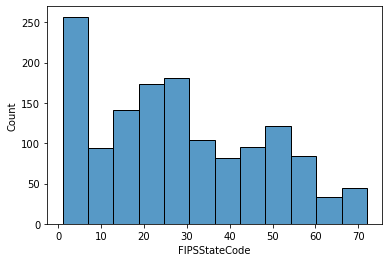

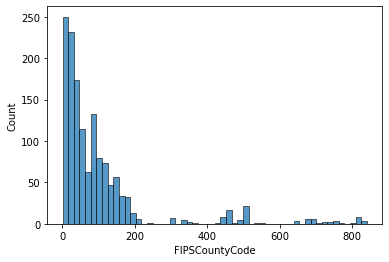

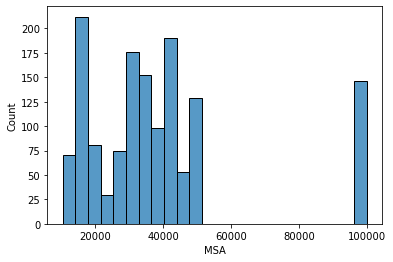

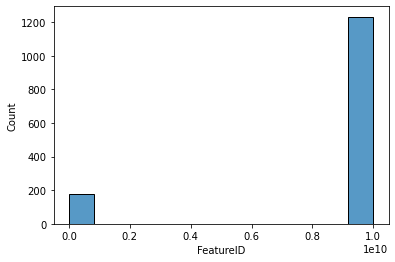

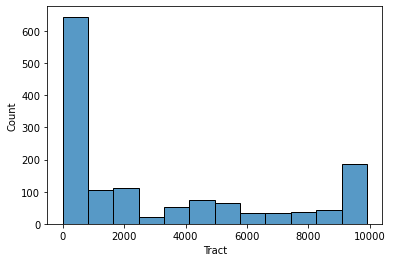

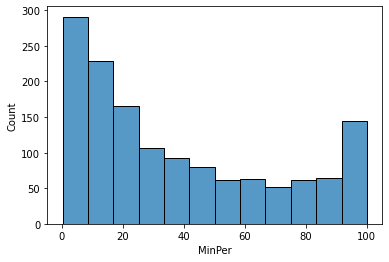

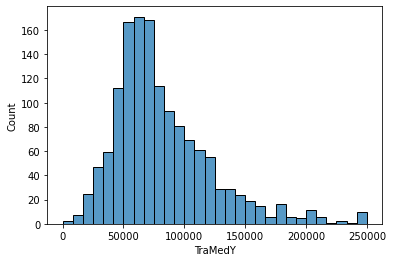

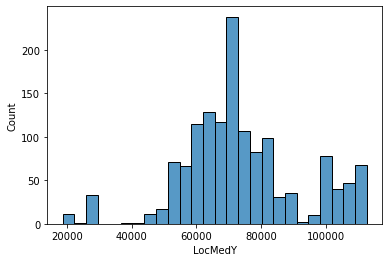

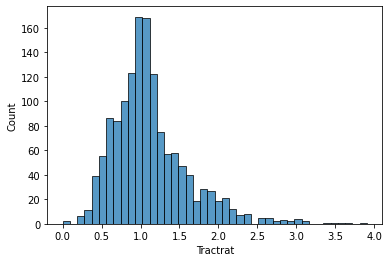

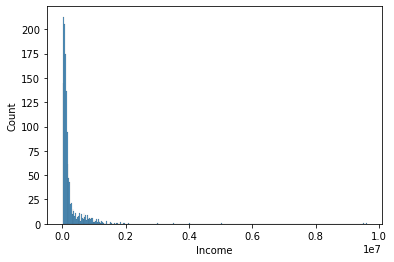

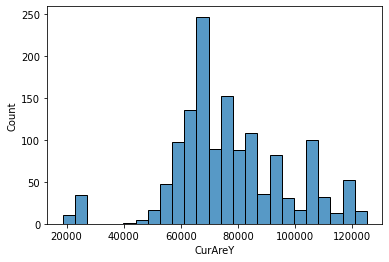

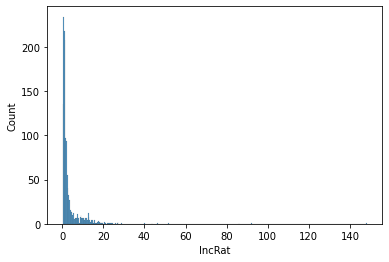

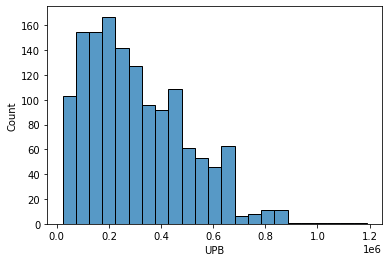

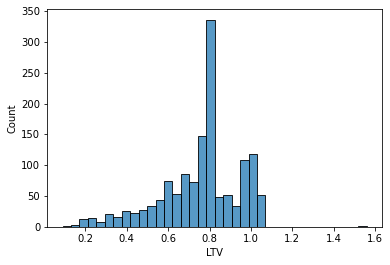

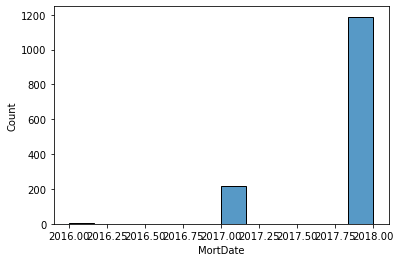

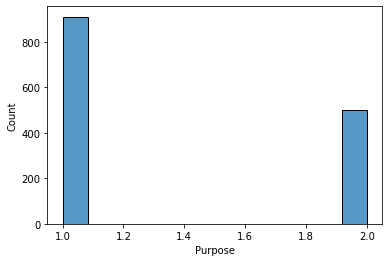

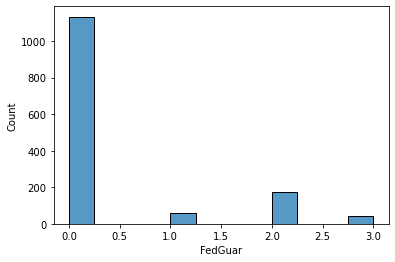

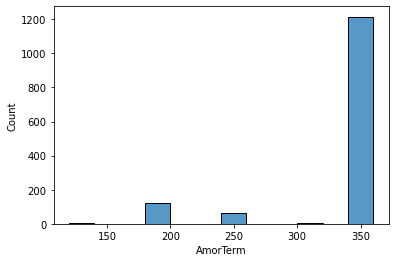

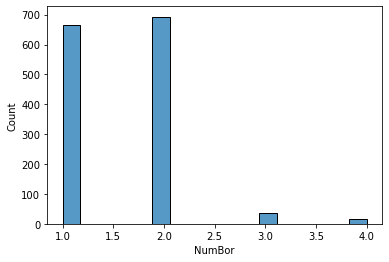

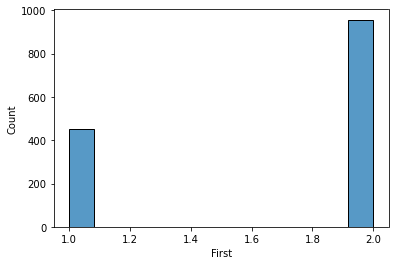

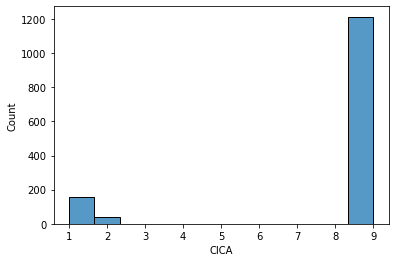

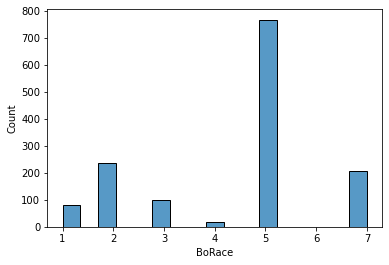

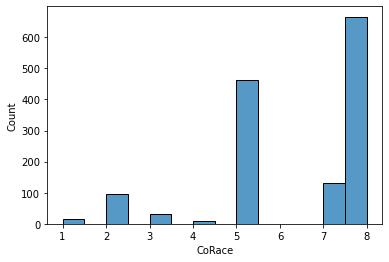

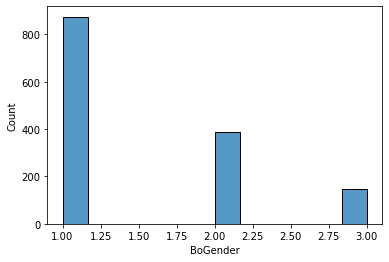

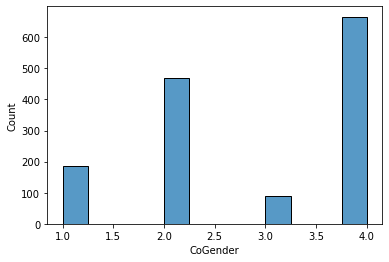

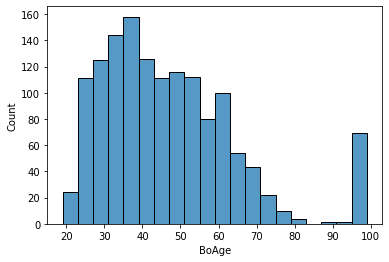

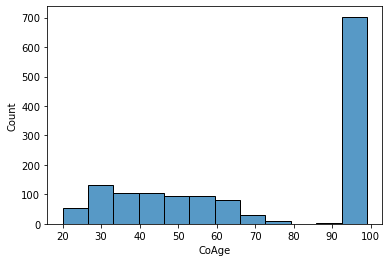

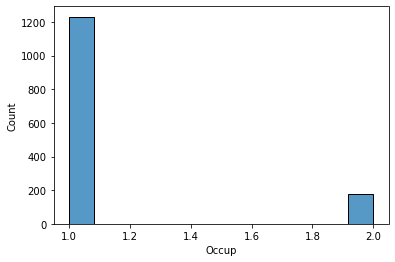

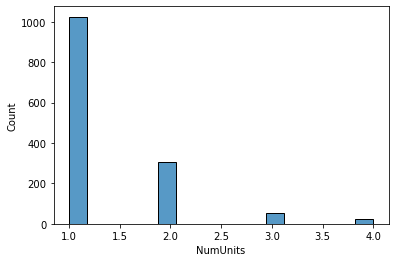

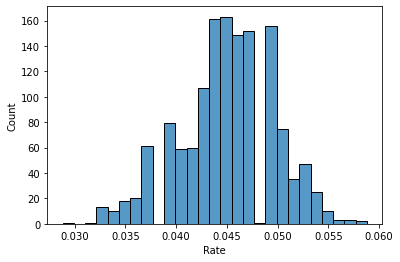

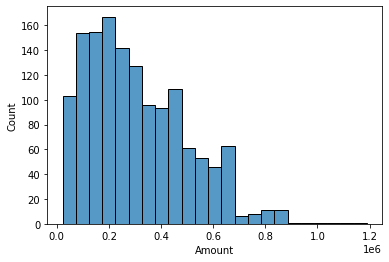

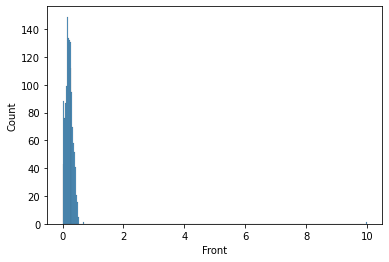

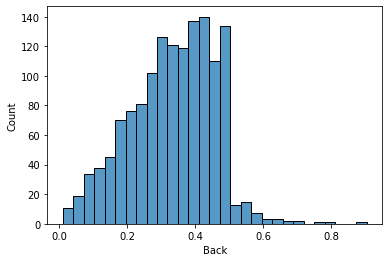

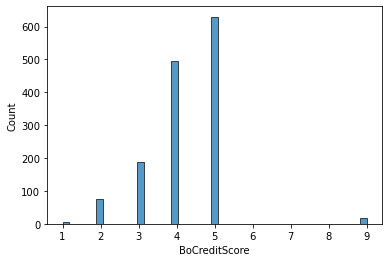

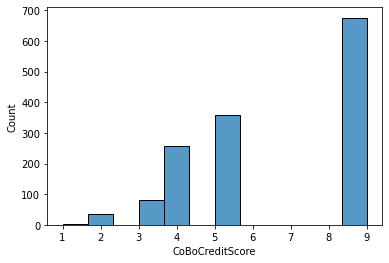

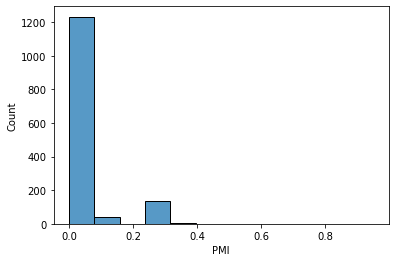

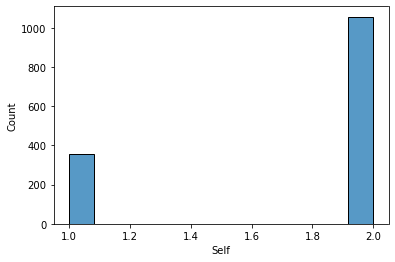

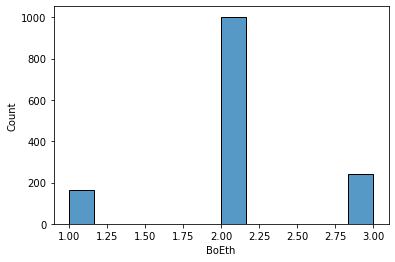

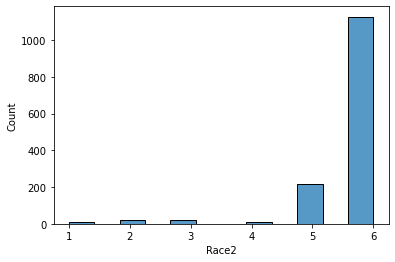

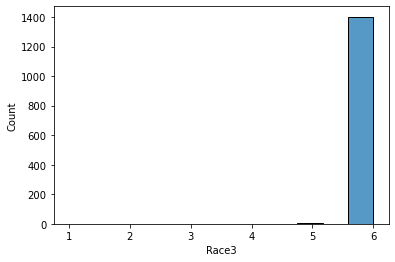

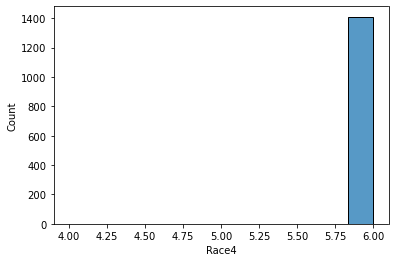

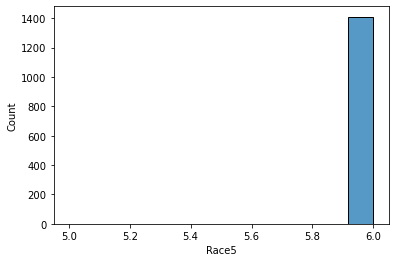

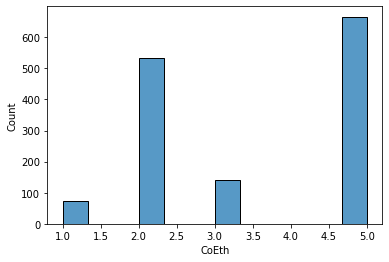

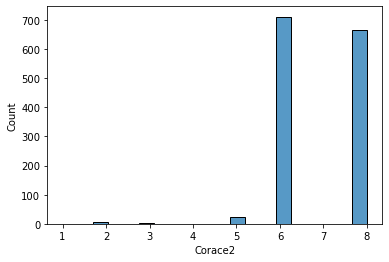

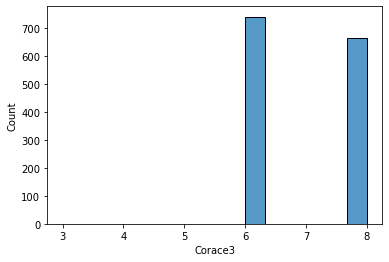

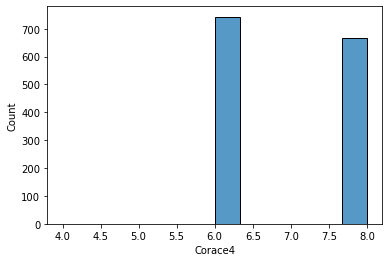

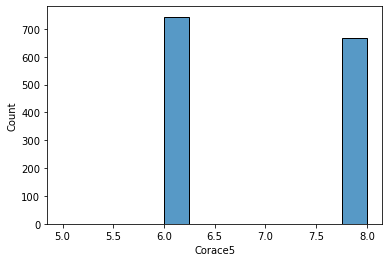

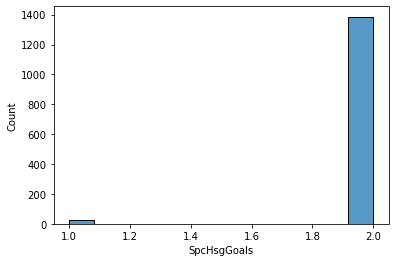

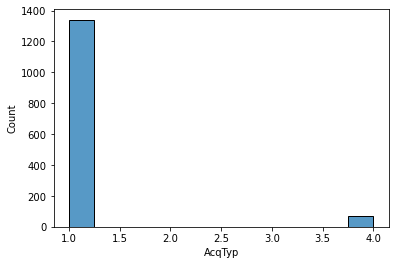

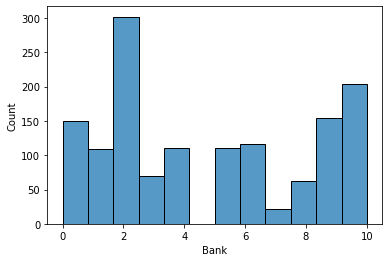

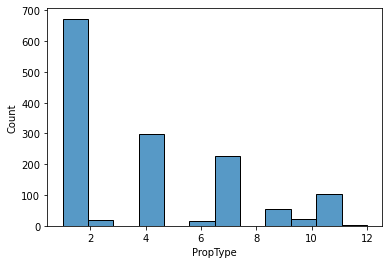

In [93]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[x.Cluster_DB== -1][i])
    plt.show()

In [94]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (0 to 70 ) but highest for (3-8)> (20-30)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 > Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

In [95]:
# statistical summary of the numerical variables
df_final[x.Cluster_DB== 0].describe().T

count              mean               std          min  \
FIPSStateCode   64069.000000         28.457772         14.815189     1.000000   
FIPSCountyCode  64069.000000         87.792973         83.724529     1.000000   
MSA             64069.000000      34920.270365      22583.361683 10100.000000   
FeatureID       64069.000000 7313416621.671214 4432066712.399454  6920.000000   
Tract           64069.000000       2771.518278       3633.446176     1.000000   
MinPer          64069.000000         19.100925         19.069127     0.000000   
TraMedY         64069.000000      83371.809190      29715.093161     0.000000   
LocMedY         64069.000000      70447.870874      12174.150000 26023.000000   
Tractrat        64069.000000          1.173479          0.366722     0.000000   
Income          64069.000000     109940.405766      69090.154040 11004.000000   
CurAreY         64069.000000      74937.440884      13316.109399 22900.000000   
IncRat          64069.000000          1.483867          0.943196     0.158600   
UPB             64069.000000     235914.679361     129919.343616 10400.000000   
LTV             64069.000000          0.771494          0.146769     0.008000   
MortDate        64069.000000       2017.950413          0.217451  2016.000000   
Purpose         64069.000000          1.340758          0.475546     1.000000   
FedGuar         64069.000000          0.130079          0.538635     0.000000   
AmorTerm        64069.000000        344.491455         46.672711    60.000000   
NumBor          64069.000000          1.562160          0.511705     1.000000   
First           64069.000000          1.773869          0.418328     1.000000   
CICA            64069.000000          9.000000          0.000000     9.000000   
BoRace          64069.000000          5.028063          0.929120     1.000000   
CoRace          64069.000000          6.369711          1.607618     1.000000   
BoGender        64069.000000          1.399991          0.607779     1.000000   
CoGender        64069.000000          2.826609          1.111648     1.000000   
BoAge           64069.000000         48.758229         20.496655    18.000000   
CoAge           64069.000000         70.514477         29.021792    18.000000   
Occup           64069.000000          1.029546          0.169333     1.000000   
NumUnits        64069.000000          1.000000          0.000000     1.000000   
Rate            64069.000000          0.045556          0.003531     0.027500   
Amount          64069.000000     236095.322496     129986.833267 10400.000000   
Front           64069.000000          0.213855          0.085410     0.000100   
Back            64069.000000          0.326508          0.094066     0.025700   
BoCreditScore   64069.000000          4.344129          0.855249     1.000000   
CoBoCreditScore 64069.000000          6.475940          2.345927     1.000000   
PMI             64069.000000          0.052506          0.106202     0.000000   
Self            64069.000000          1.894738          0.306892     1.000000   
BoEth           64069.000000          2.068114          0.391199     1.000000   
Race2           64069.000000          6.000000          0.000000     6.000000   
Race3           64069.000000          6.000000          0.000000     6.000000   
Race4           64069.000000          6.000000          0.000000     6.000000   
Race5           64069.000000          6.000000          0.000000     6.000000   
CoEth           64069.000000          3.379044          1.479786     1.000000   
Corace2         64069.000000          6.887528          0.997652     1.000000   
Corace3         64069.000000          6.889447          0.993925     5.000000   
Corace4         64069.000000          6.889479          0.993881     6.000000   
Corace5         64069.000000          6.889479          0.993881     6.000000   
SpcHsgGoals     64069.000000          1.969642          0.171571     1.000000   
AcqTyp          64069.000000          1.415708        

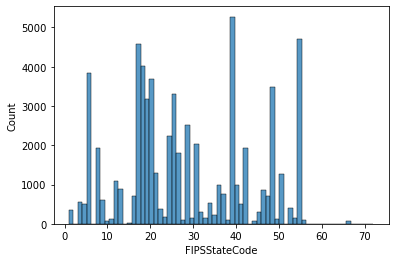

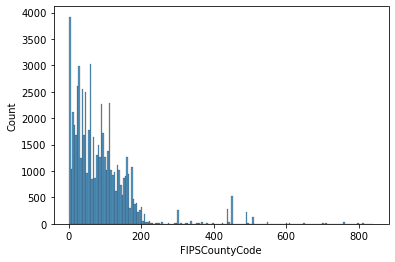

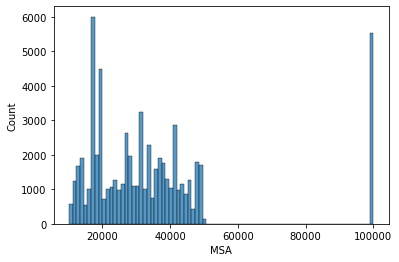

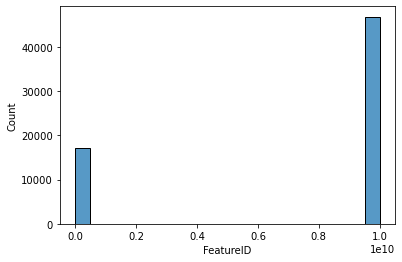

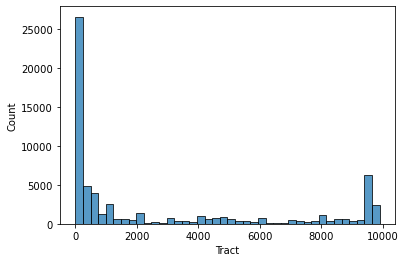

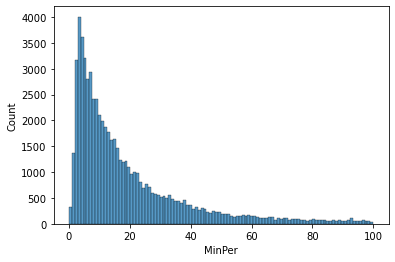

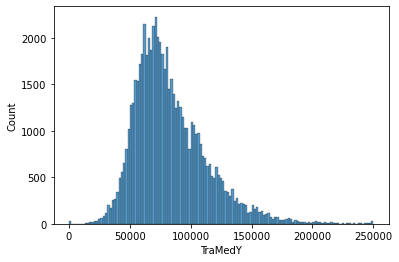

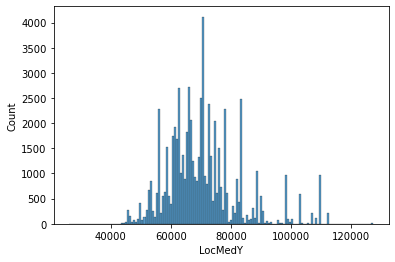

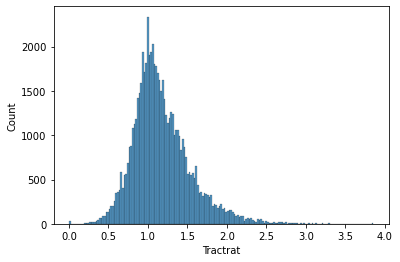

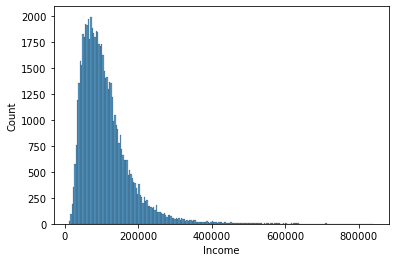

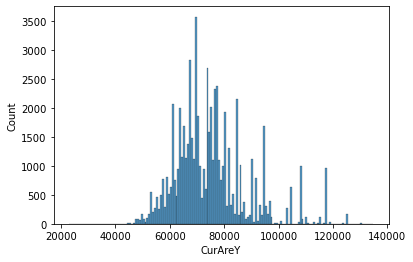

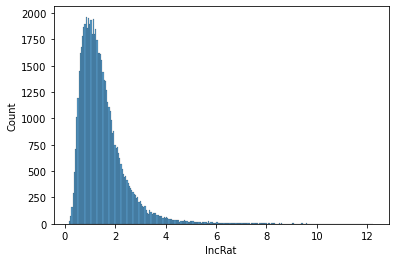

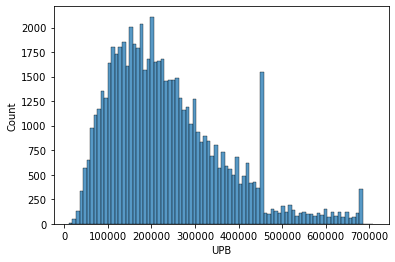

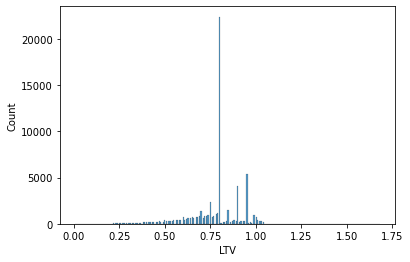

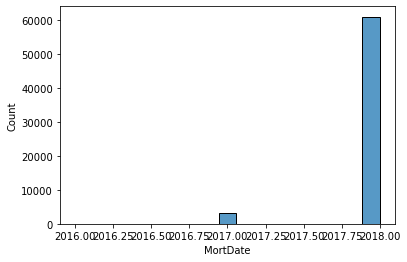

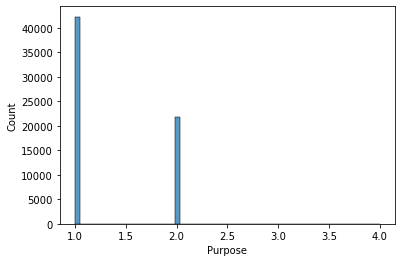

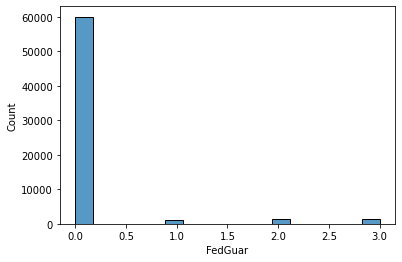

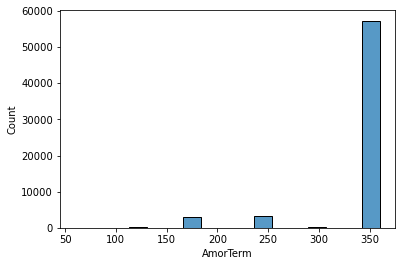

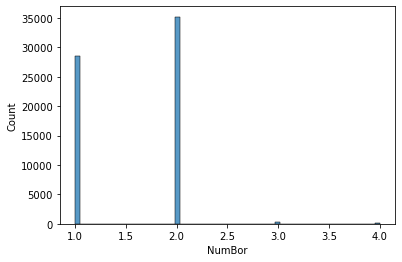

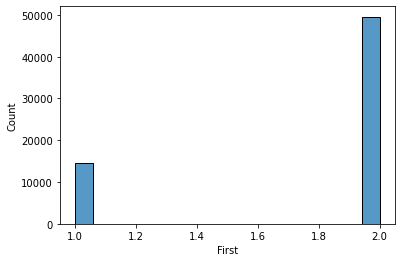

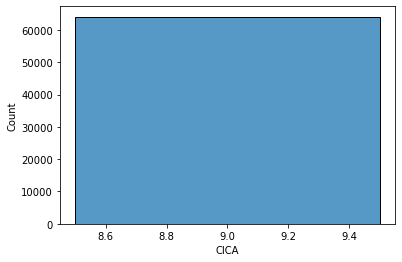

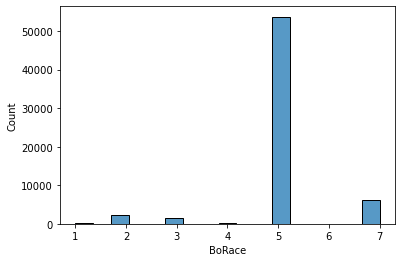

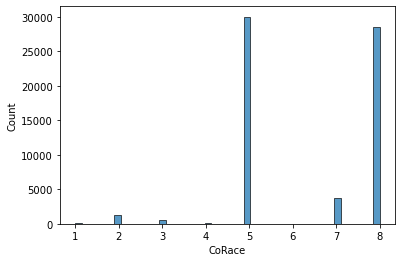

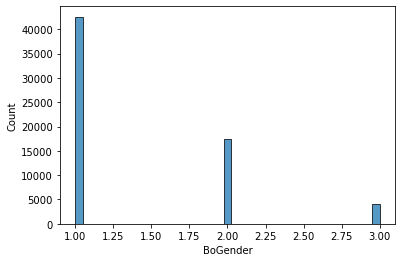

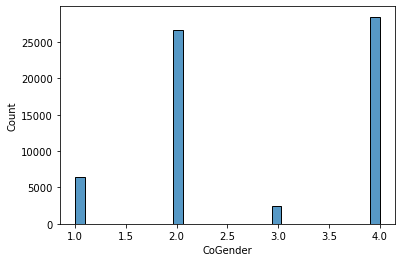

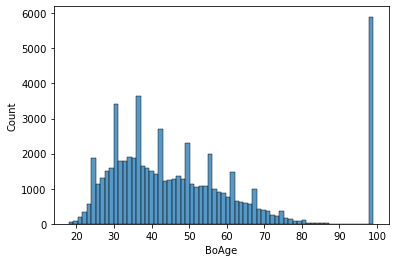

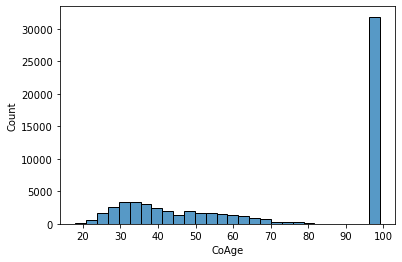

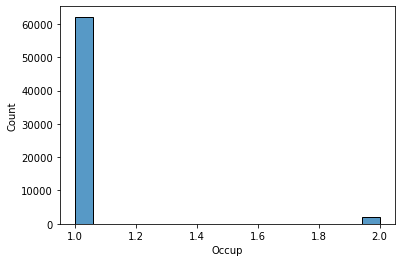

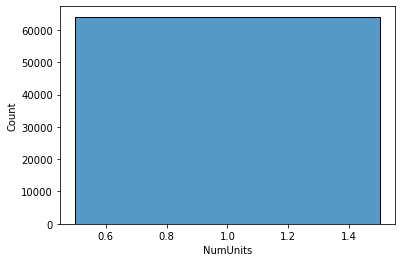

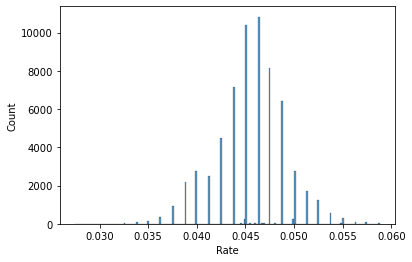

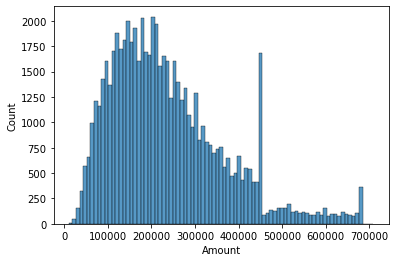

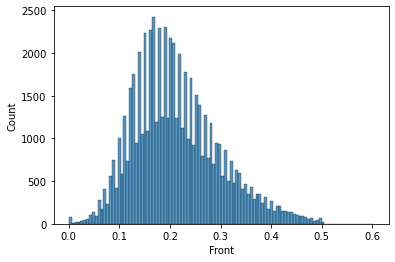

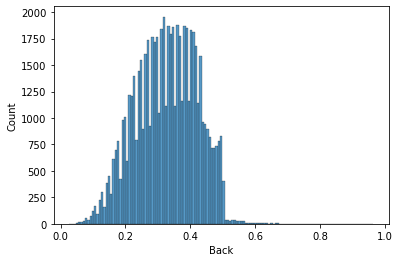

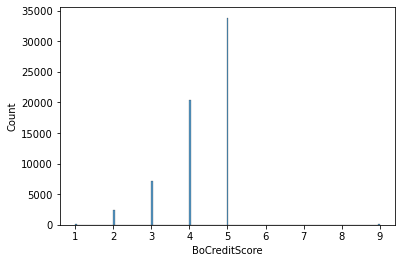

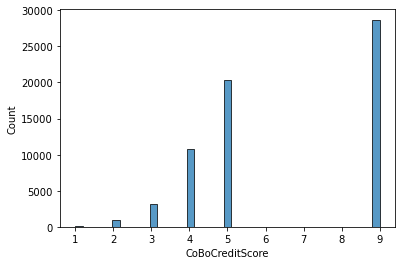

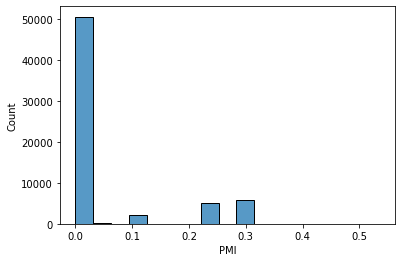

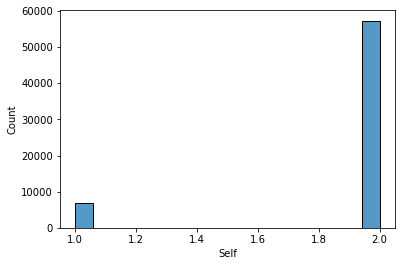

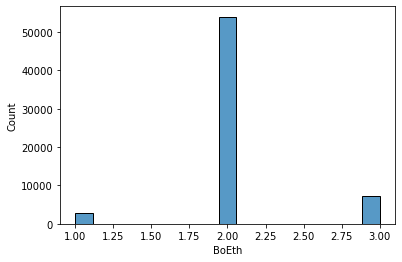

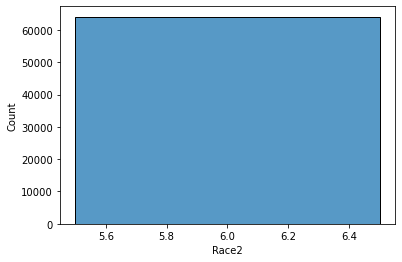

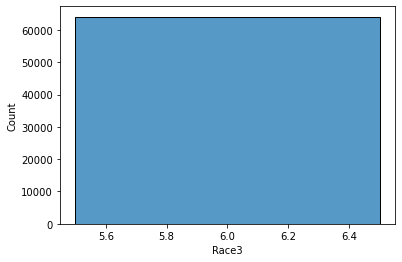

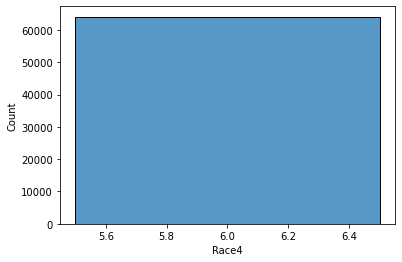

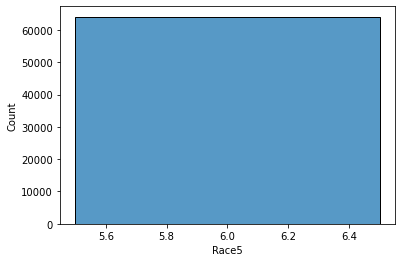

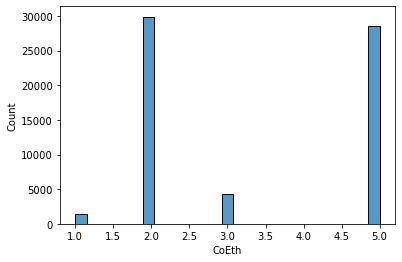

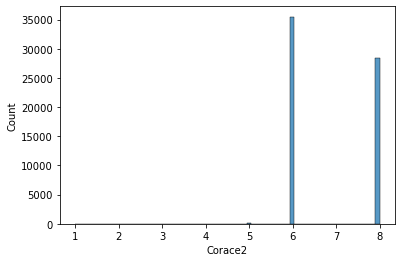

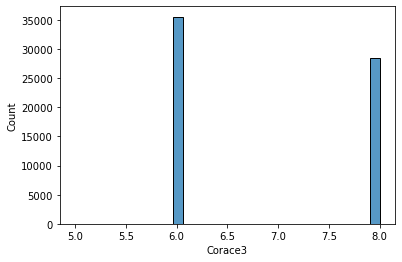

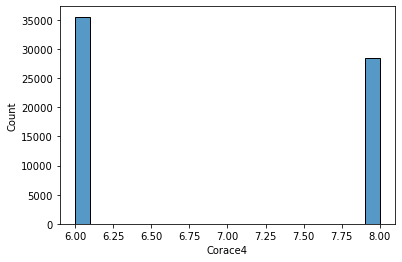

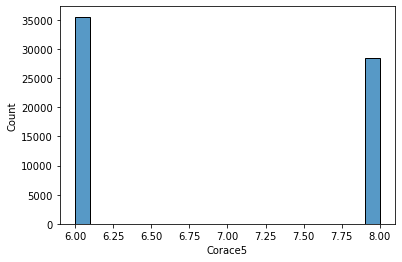

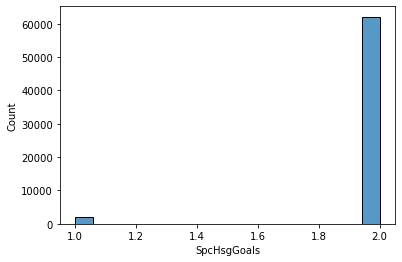

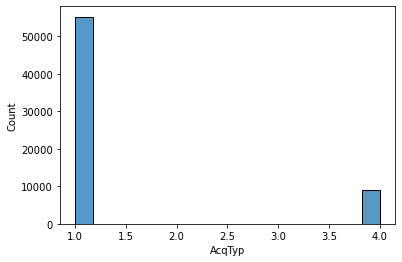

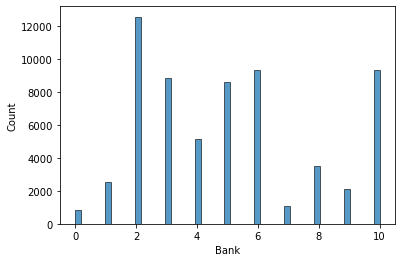

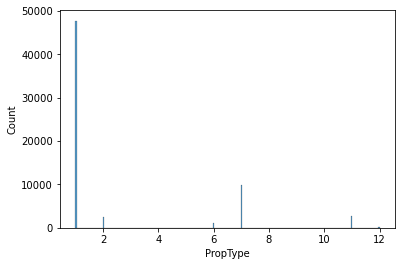

In [96]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[x.Cluster_DB== 0][i])
    plt.show()

In [97]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Borower Ethnocity : 2 -- Not Hispanic or Latino 
# Maximum number of BoRace and CoRace are not provide
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached; PT02=Deminimus PUD; and PT06=Low-Rise Condominium;

In [98]:
# statistical summary of the numerical variables
df_final[x.Cluster_DB== 1].describe().T

count              mean               std           min  \
FIPSStateCode   223.000000         34.538117         15.170417      4.000000   
FIPSCountyCode  223.000000         59.650224         59.138512      1.000000   
MSA             223.000000      29518.461883      13269.391860  10580.000000   
FeatureID       223.000000 8654942057.730942 3419282353.250693 619450.000000   
Tract           223.000000       1889.263901       2763.883736      1.000000   
MinPer          223.000000         30.412018         25.310431      2.850000   
TraMedY         223.000000      73120.493274      26543.679635  20000.000000   
LocMedY         223.000000      76140.627803      11720.401935  45920.000000   
Tractrat        223.000000          0.964433          0.330200      0.271500   
Income          223.000000      73262.125561      35606.450241  24888.000000   
CurAreY         223.000000      81922.869955      13579.418277  49400.000000   
IncRat          223.000000          0.906912          0.459925      0.288900   
UPB             223.000000     207413.560538     117518.535458  48750.000000   
LTV             223.000000          0.752063          0.144868      0.270000   
MortDate        223.000000       2017.982063          0.133022   2017.000000   
Purpose         223.000000          1.399103          0.490816      1.000000   
FedGuar         223.000000          0.139013          0.383738      0.000000   
AmorTerm        223.000000        341.704036         48.534954    180.000000   
NumBor          223.000000          1.000000          0.000000      1.000000   
First           223.000000          1.677130          0.468625      1.000000   
CICA            223.000000          9.000000          0.000000      9.000000   
BoRace          223.000000          4.780269          1.013942      2.000000   
CoRace          223.000000          8.000000          0.000000      8.000000   
BoGender        223.000000          1.390135          0.524440      1.000000   
CoGender        223.000000          4.000000          0.000000      4.000000   
BoAge           223.000000         45.417040         18.575172     20.000000   
CoAge           223.000000         98.000000          0.000000     98.000000   
Occup           223.000000          1.000000          0.000000      1.000000   
NumUnits        223.000000          2.000000          0.000000      2.000000   
Rate            223.000000          0.046578          0.003637      0.037500   
Amount          223.000000     207506.524664     117593.524177  48750.000000   
Front           223.000000          0.280542          0.097232      0.060000   
Back            223.000000          0.375267          0.089994      0.120000   
BoCreditScore   223.000000          4.282511          0.893424      2.000000   
CoBoCreditScore 223.000000          9.000000          0.000000      9.000000   
PMI             223.000000          0.012960          0.039241      0.000000   
Self            223.000000          1.932735          0.251043      1.000000   
BoEth           223.000000          1.959641          0.394996      1.000000   
Race2           223.000000          6.000000          0.000000      6.000000   
Race3           223.000000          6.000000          0.000000      6.000000   
Race4           223.000000          6.000000          0.000000      6.000000   
Race5           223.000000          6.000000          0.000000      6.000000   
CoEth           223.000000          5.000000          0.000000      5.000000   
Corace2         223.000000          8.000000          0.000000      8.000000   
Corace3         223.000000          8.000000          0.000000      8.000000   
Corace4         223.000000          8.000000          0.000000      8.000000   
Corace5         223.000000          8.000000          0.000000      8.000000   
SpcHsgGoals     223.000000          2.000000          0.000000      2.000000   
AcqTyp          223.000000          1.094170          0.524286      1.000000   
Bank            223.0

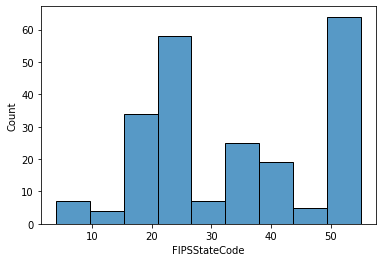

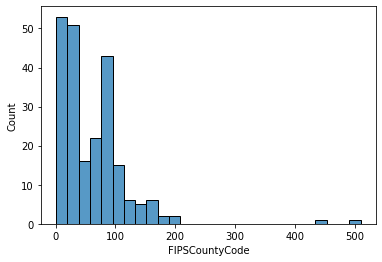

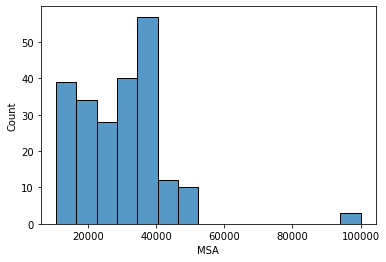

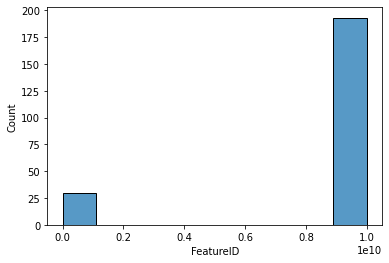

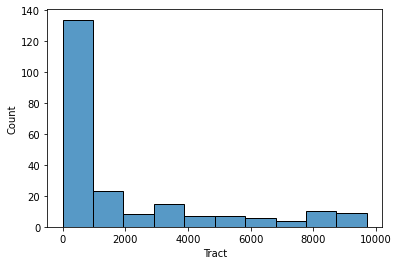

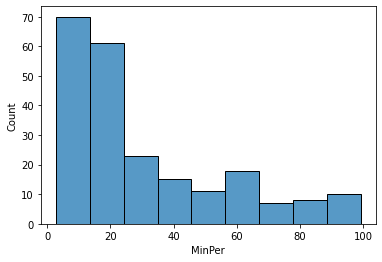

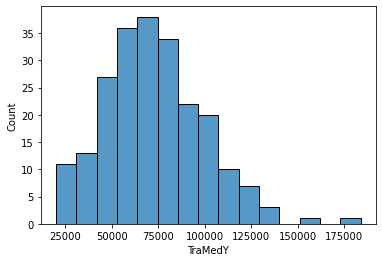

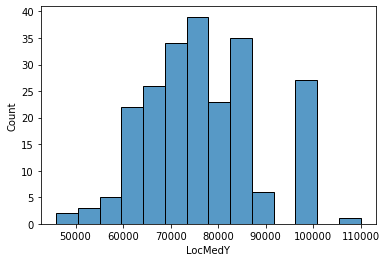

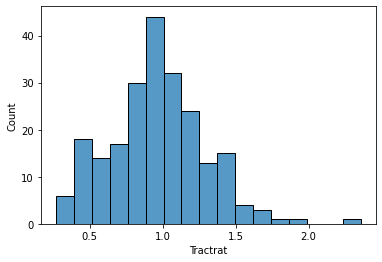

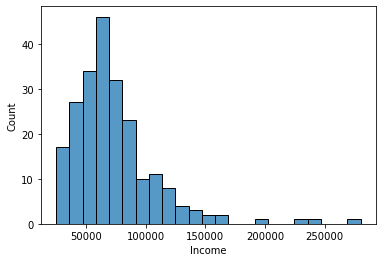

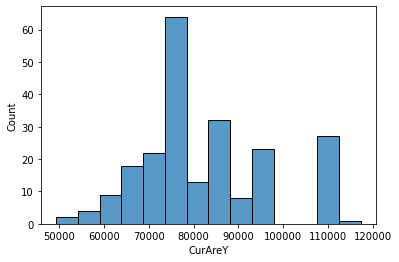

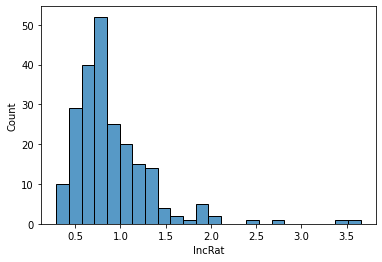

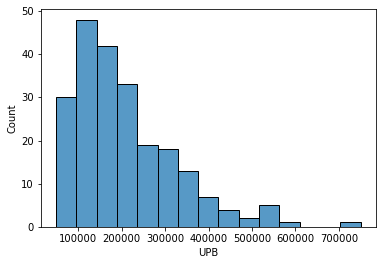

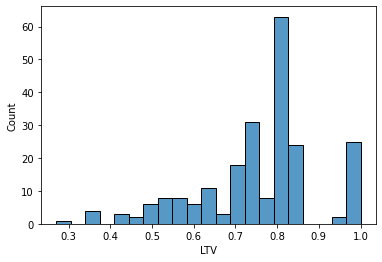

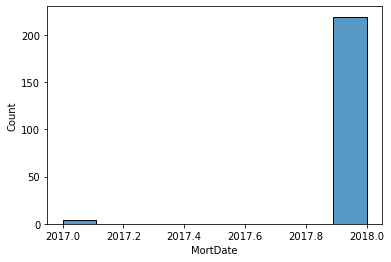

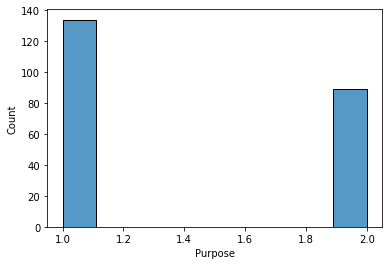

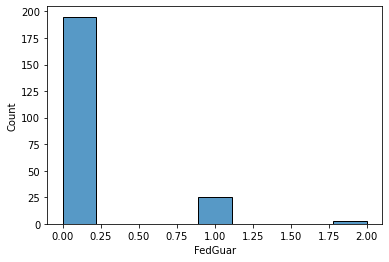

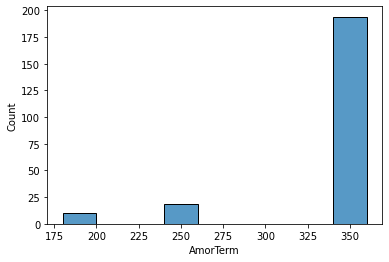

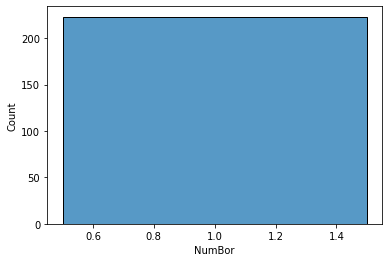

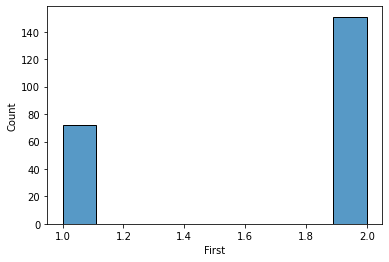

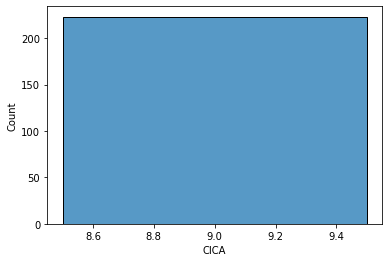

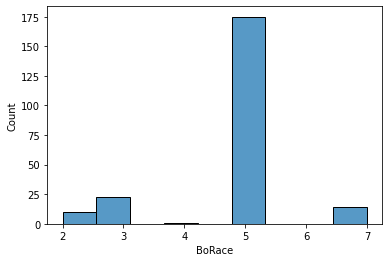

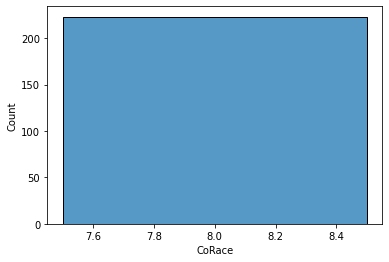

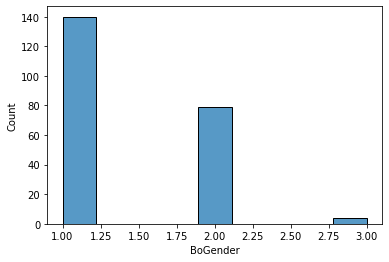

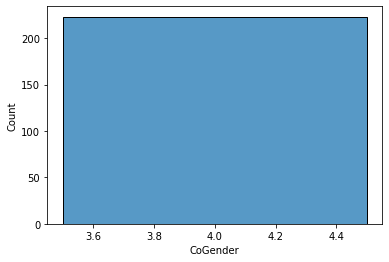

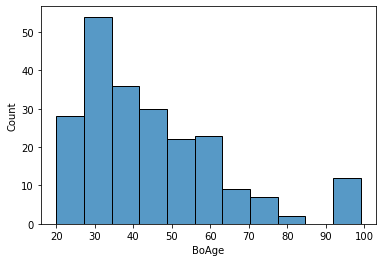

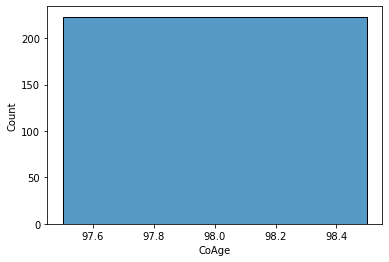

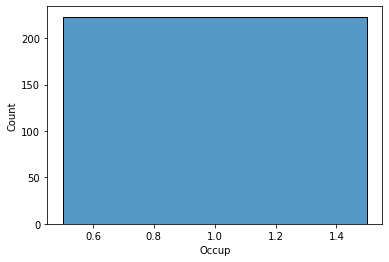

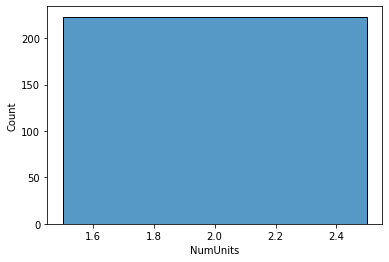

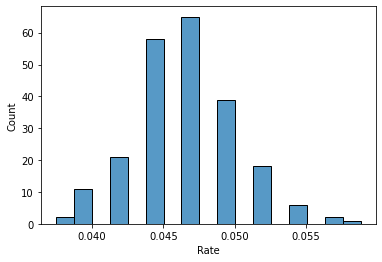

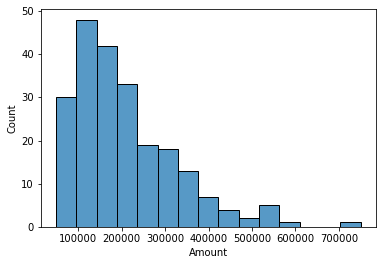

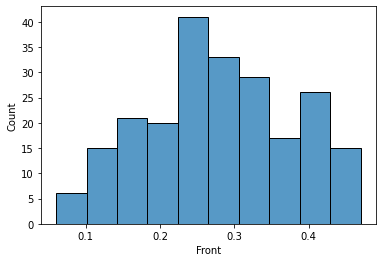

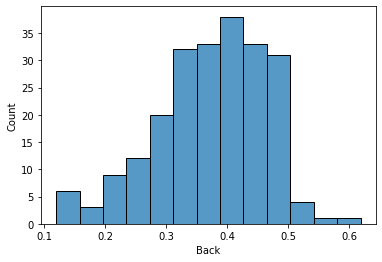

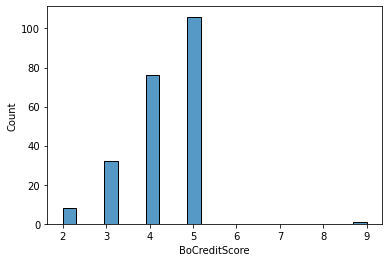

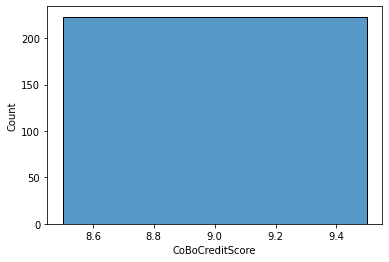

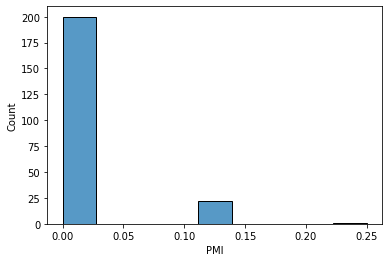

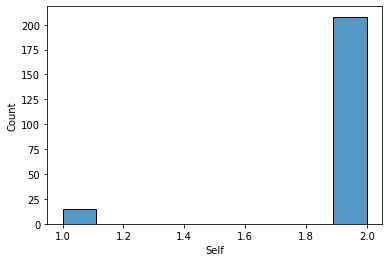

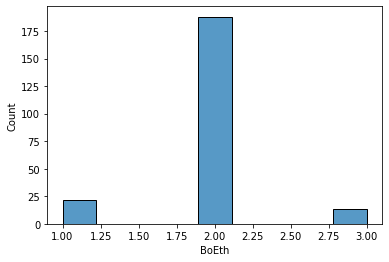

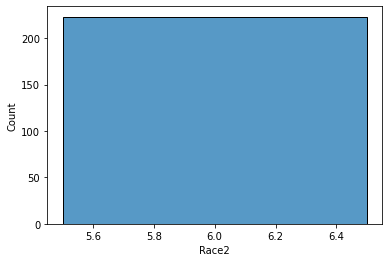

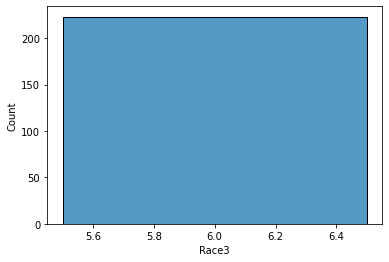

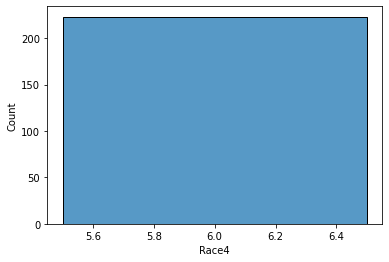

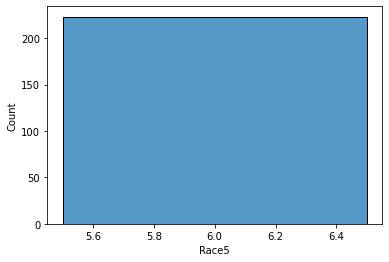

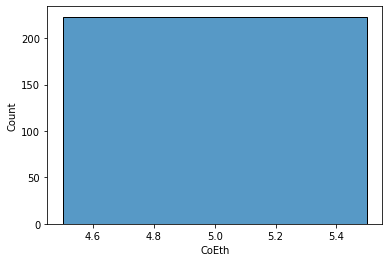

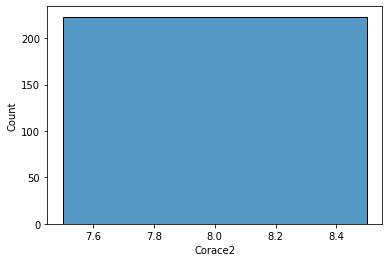

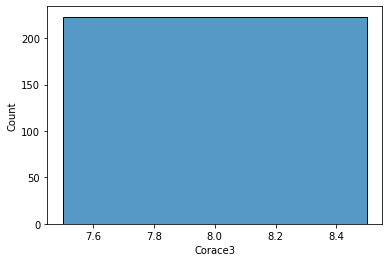

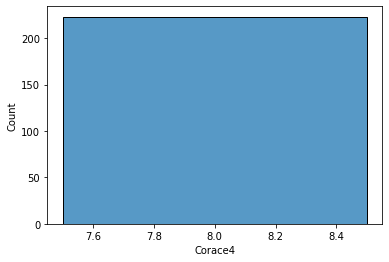

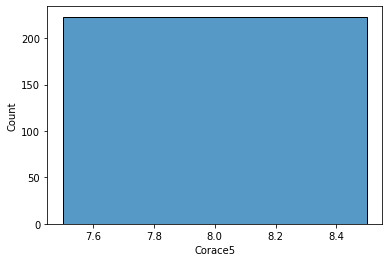

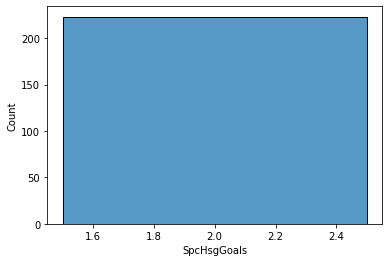

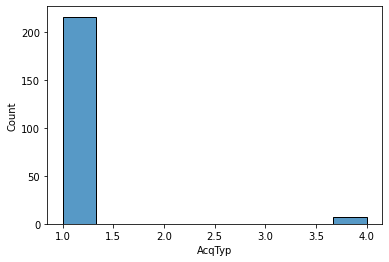

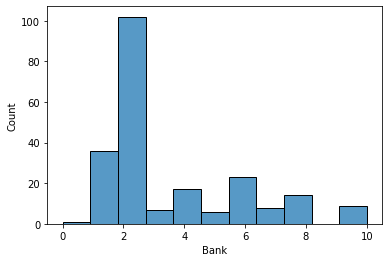

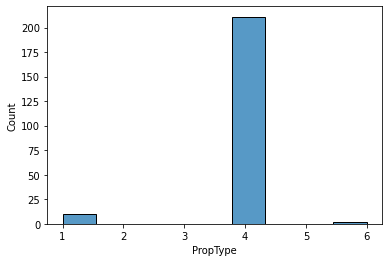

In [99]:
# statistical summary of the numerical variables
for i in df_final.columns:
    sns.histplot(df_final[x.Cluster_DB== 1][i])
    plt.show()

In [100]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 55 ) but highest for (5-10)< (48-52)
# FIPSCountryCode : Mostly found in 0-120 range, and rest are few outliers
# MSA : Most values lies between 10000-45000 and very few 100000
# Tract : Census Tract is highest for 0-1000 and rest are very low
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for 60
# Income : Highest income value ranges to [50000,80000]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (60000, 10000)
# Tractrat : Tract Income Ratio is highest for 0.45 to 1.5 with hghes at 1 
# CurAreY : Area Median Family Income in Whole Dollars lies between (75000-78000) after that few oulier on the right side.
# UPB : ranges for 100000 to 250000 and then decreasing
# LTV : Loan to Value Ratio at Origination lies between (0.72 -08) but highest at 0.8
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 2=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 180-200 range
# NumBor : 1 
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 )
# Maximum number of CoRace of type 8  
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

In [101]:
# As ve can see that cluster 1 has more mixed data and cannot we helpful in deriving insites.



### Final Model

<AxesSubplot:xlabel='Cluster_DB', ylabel='count'>

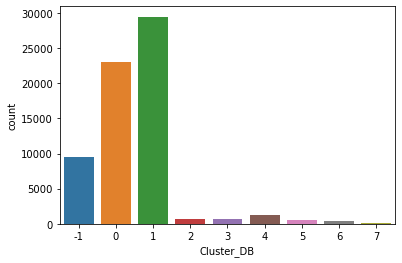

In [102]:
# Build a clustering Final_model using DBSCAN 

from sklearn.cluster import DBSCAN
db=DBSCAN(eps=4.5, min_samples=95).fit(X)
X['Cluster_DB']=db.labels_
sns.countplot(X['Cluster_DB'])

In [103]:
(X['Cluster_DB']).value_counts()

 1    29444
 0    23061
-1     9556
 4     1280
 3      711
 2      648
 5      485
 6      413
 7      105
Name: Cluster_DB, dtype: int64

In [104]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== -1].describe().T

count              mean               std          min  \
FIPSStateCode   9556.000000         27.554207         17.904593     1.000000   
FIPSCountyCode  9556.000000         99.678108        134.149090     1.000000   
MSA             9556.000000      37802.565613      22703.707224 10180.000000   
FeatureID       9556.000000 8192058943.933445 3848225669.882557  6920.000000   
Tract           9556.000000       3225.379517       3523.138377     1.000000   
MinPer          9556.000000         35.160530         28.302777     0.000000   
TraMedY         9556.000000      90015.147133      41704.135186     0.000000   
LocMedY         9556.000000      76362.276580      18186.018990 18666.000000   
Tractrat        9556.000000          1.177298          0.484118     0.000000   
Income          9556.000000     162377.015488     220128.572096 13560.000000   
CurAreY         9556.000000      80435.265802      19650.124917 18600.000000   
IncRat          9556.000000          2.128421          3.054978     0.193800   
UPB             9556.000000     311404.501256     174760.962664 10400.000000   
LTV             9556.000000          0.752943          0.178759     0.008000   
MortDate        9556.000000       2017.768732          0.423647  2016.000000   
Purpose         9556.000000          1.368355          0.492050     1.000000   
FedGuar         9556.000000          0.246233          0.663121     0.000000   
AmorTerm        9556.000000        338.485873         55.119486    60.000000   
NumBor          9556.000000          1.567706          0.571721     1.000000   
First           9556.000000          1.724362          0.446859     1.000000   
CICA            9556.000000          8.838321          1.113036     1.000000   
BoRace          9556.000000          4.875576          1.661868     1.000000   
CoRace          9556.000000          6.399016          1.917327     1.000000   
BoGender        9556.000000          1.584763          0.749417     1.000000   
CoGender        9556.000000          2.913039          1.116206     1.000000   
BoAge           9556.000000         49.764127         18.929588    18.000000   
CoAge           9556.000000         72.222373         27.768770    19.000000   
Occup           9556.000000          1.138133          0.345058     1.000000   
NumUnits        9556.000000          1.074717          0.310745     1.000000   
Rate            9556.000000          0.044594          0.004526     0.028800   
Amount          9556.000000     311816.358623     174764.081369 10400.000000   
Front           9556.000000          0.229550          0.147971     0.000100   
Back            9556.000000          0.345811          0.109037     0.010000   
BoCreditScore   9556.000000          4.277941          1.060977     1.000000   
CoBoCreditScore 9556.000000          6.533278          2.412778     1.000000   
PMI             9556.000000          0.043120          0.098087     0.000000   
Self            9556.000000          1.747593          0.434416     1.000000   
BoEth           9556.000000          2.172980          0.587063     1.000000   
Race2           9556.000000          5.953014          0.334936     1.000000   
Race3           9556.000000          5.998430          0.065487     1.000000   
Race4           9556.000000          5.999791          0.020459     4.000000   
Race5           9556.000000          5.999895          0.010230     5.000000   
CoEth           9556.000000          3.513709          1.452013     1.000000   
Corace2         9556.000000          6.920364          1.023757     1.000000   
Corace3         9556.000000          6.931038          0.999191     3.000000   
Corace4         9556.000000          6.931457          0.998277     4.000000   
Corace5         9556.000000          6.931666          0.997872     5.000000   
SpcHsgGoals     9556.000000          1.971013          0.167779     1.000000   
AcqTyp          9556.000000          1.199665          0.747789     1.000000   
Bank            9556.0

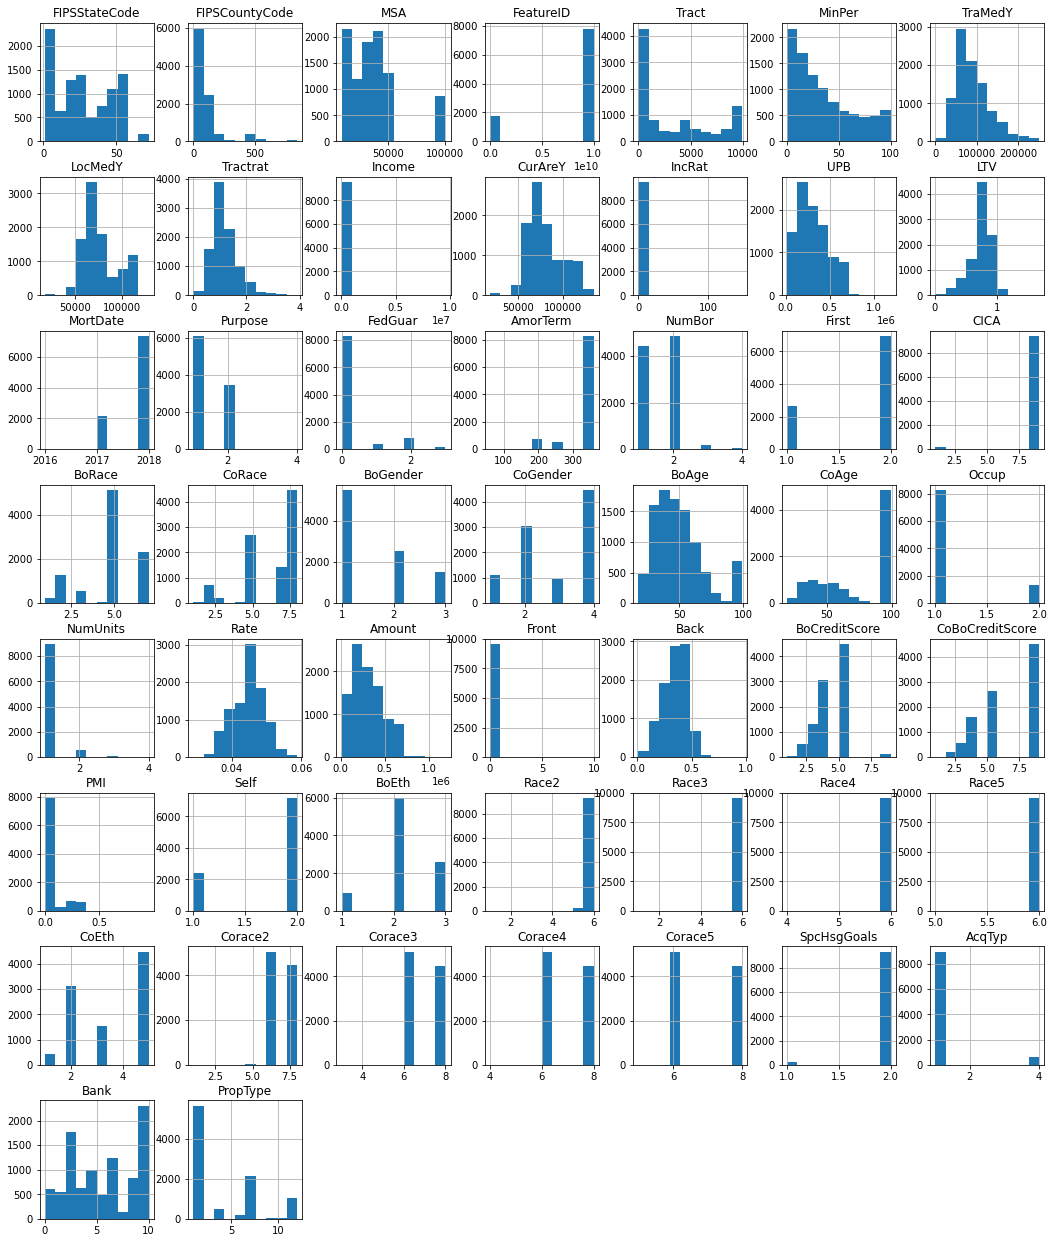

In [153]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== -1].hist(figsize=(18,22))
plt.show()

In [106]:
# CLUSTER -1:
# it tells about the noise in the data.
# It also tells that persons with very low 'INCOME' and 'INCRAT' have high value of 'UBP' i.e unpaid princial amount.
# Generally have Single borrower type or Two Borrowers in this cluster
# Borrower : type 6 = Information not provided by applicant in mail or telephone application
# Maximum number of CoRace of Type 8 =No Co-Borrower and Type 6 : Information not provided by borrower in mail, or telephone application
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# CoEth : 2(Females) > 3(Info not provided) < 1(Males)
# CoEth : 2(Females) > 5(No Coborrower) > 3(Info not provided) < 1(Males)
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination highest at 0.76
# MortDate : mostly with 2018 mortized date but some are 2017.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Occup : Generally have Single borrower type > Two Borrowers in this cluster
# Almost all ages of borrower and co brrower.
# Very low front end ratio
# high backend ratio with high variation
# Borowwer credit score : type5(=760)> type4(720-760)> type(3) > type2 > type1
# Coborrower with missing credit score is high in count. then type5(=760)> type4(720-760)> type(3) > type2 > type1
# Self : Very low rate for self employeed.
# PropType : Mostly PT02=Deminimus PUD; >PT06=Low-Rise Condominium; > PT04=Two family; > PT12=Manufactured Home

In [107]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 0].describe().T

count              mean               std          min  \
FIPSStateCode   23061.000000         27.882225         14.548233     1.000000   
FIPSCountyCode  23061.000000         86.568059         76.931892     1.000000   
MSA             23061.000000      34288.962057      22186.229918 10100.000000   
FeatureID       23061.000000 7527474681.180781 4313683936.015442  6920.000000   
Tract           23061.000000       2640.735463       3594.638003     1.000000   
MinPer          23061.000000         19.097631         17.936428     0.000000   
TraMedY         23061.000000      80997.701964      27611.247790     0.000000   
LocMedY         23061.000000      69888.833008      10852.383220 44547.000000   
Tractrat        23061.000000          1.151954          0.352774     0.000000   
Income          23061.000000      83519.792724      49422.319584 11004.000000   
CurAreY         23061.000000      74537.340098      12053.128553 44700.000000   
IncRat          23061.000000          1.128408          0.667039     0.158600   
UPB             23061.000000     206185.357660     117576.320490 18800.000000   
LTV             23061.000000          0.783310          0.143093     0.080000   
MortDate        23061.000000       2018.000000          0.000000  2018.000000   
Purpose         23061.000000          1.322362          0.467391     1.000000   
FedGuar         23061.000000          0.174277          0.643083     0.000000   
AmorTerm        23061.000000        347.441221         41.996387    84.000000   
NumBor          23061.000000          1.000000          0.000000     1.000000   
First           23061.000000          1.711895          0.452890     1.000000   
CICA            23061.000000          9.000000          0.000000     9.000000   
BoRace          23061.000000          4.997962          0.883473     1.000000   
CoRace          23061.000000          8.000000          0.000000     8.000000   
BoGender        23061.000000          1.485235          0.596543     1.000000   
CoGender        23061.000000          4.000000          0.000000     4.000000   
BoAge           23061.000000         48.293613         20.982869    18.000000   
CoAge           23061.000000         98.000000          0.000000    98.000000   
Occup           23061.000000          1.000000          0.000000     1.000000   
NumUnits        23061.000000          1.000000          0.000000     1.000000   
Rate            23061.000000          0.046054          0.003296     0.030000   
Amount          23061.000000     206265.835913     117623.459981 18800.000000   
Front           23061.000000          0.237962          0.084887     0.024100   
Back            23061.000000          0.337118          0.090534     0.051900   
BoCreditScore   23061.000000          4.218117          0.884110     1.000000   
CoBoCreditScore 23061.000000          9.000000          0.000000     9.000000   
PMI             23061.000000          0.056069          0.109253     0.000000   
Self            23061.000000          1.940072          0.237359     1.000000   
BoEth           23061.000000          2.046225          0.374185     1.000000   
Race2           23061.000000          6.000000          0.000000     6.000000   
Race3           23061.000000          6.000000          0.000000     6.000000   
Race4           23061.000000          6.000000          0.000000     6.000000   
Race5           23061.000000          6.000000          0.000000     6.000000   
CoEth           23061.000000          5.000000          0.000000     5.000000   
Corace2         23061.000000          8.000000          0.000000     8.000000   
Corace3         23061.000000          8.000000          0.000000     8.000000   
Corace4         23061.000000          8.000000          0.000000     8.000000   
Corace5         23061.000000          8.000000          0.000000     8.000000   
SpcHsgGoals     23061.000000          2.000000          0.000000     2.000000   
AcqTyp          23061.000000          1.310915        

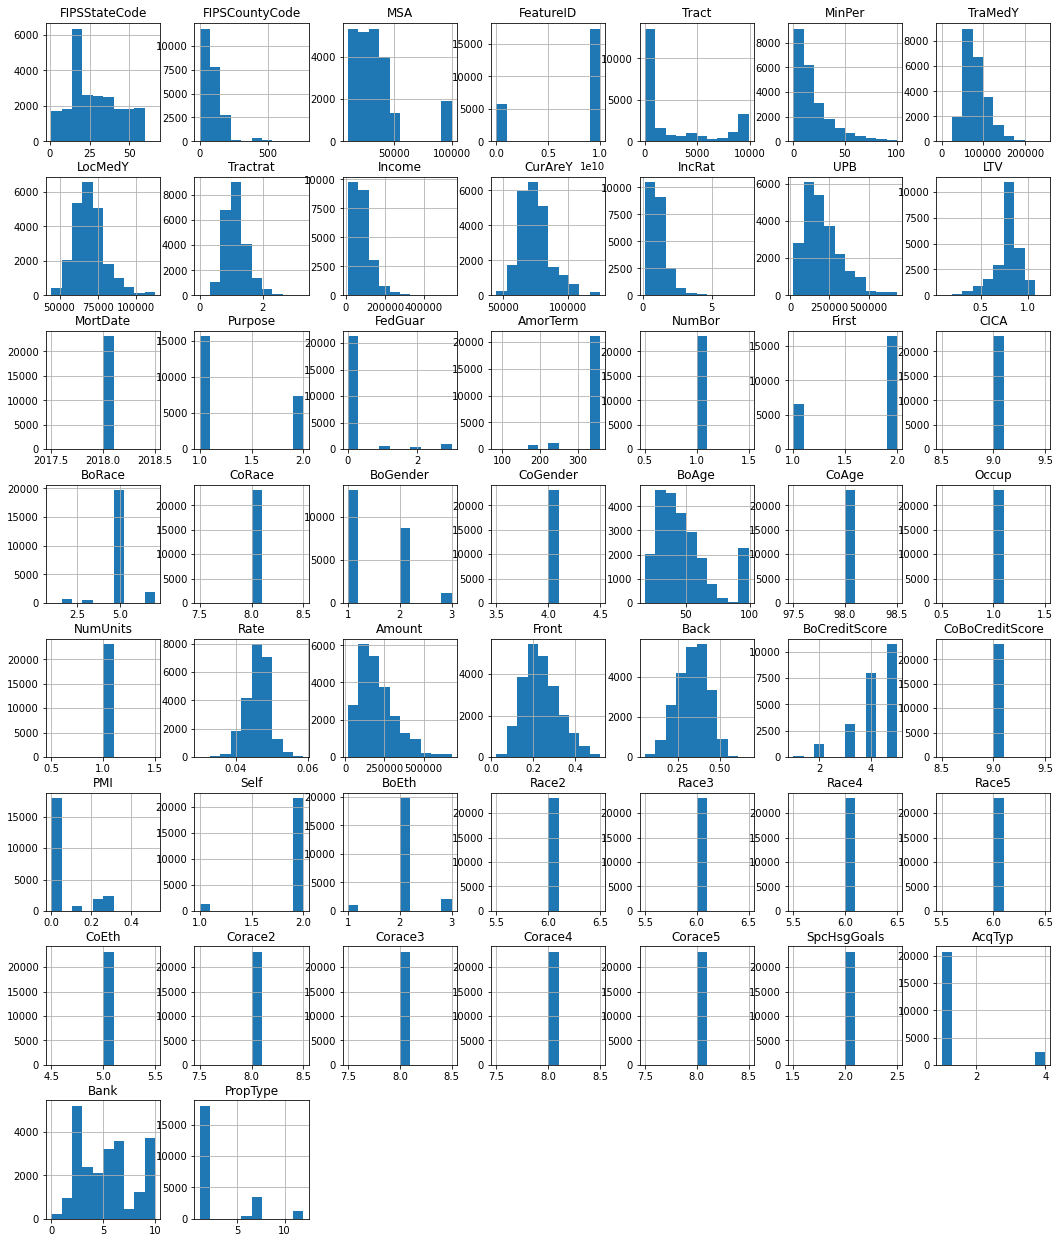

In [152]:
# statistical summary of the numerical variables

df_final[X.Cluster_DB== 0].hist(figsize=(18,22))
plt.show()

In [109]:
# CLUSTER 0:
# It also tells that persons within the approx range(0.35 to 3) 'INCOME' and 'INCRAT'
# Most value of 'UBP' i.e unpaid princial amount ranges from(500000, 40000)
# Generally have Single borrower type in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > (Type 1 ~ Type 4) > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 ~ Type 7)
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# No Co-Borrower in this category
# Most of the Borrowers age in this cluster lies between age(20 - 80) but highest number of borowwer age lies [24-26, 28,32-34, 35-38, 42, 45-47, 50-52, and few outliers of age 99 ]
# Occupancy type is : 1 - Principal residence/owner-occupied;
#

In [110]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 1].describe().T

count              mean               std          min  \
FIPSStateCode   29444.000000         28.970894         14.313277     1.000000   
FIPSCountyCode  29444.000000         87.146651         73.404410     1.000000   
MSA             29444.000000      35037.088677      22803.159083 10100.000000   
FeatureID       29444.000000 7382318828.170221 4395465997.452142 13150.000000   
Tract           29444.000000       2794.137320       3701.486328     1.000000   
MinPer          29444.000000         15.264647         14.752833     0.000000   
TraMedY         29444.000000      84066.432652      27366.901634     0.000000   
LocMedY         29444.000000      69709.862655      10894.914585 43702.000000   
Tractrat        29444.000000          1.194802          0.341489     0.000000   
Income          29444.000000     121750.290653      59323.800144 14232.000000   
CurAreY         29444.000000      74300.016981      12045.628941 42400.000000   
IncRat          29444.000000          1.653028          0.799943     0.233300   
UPB             29444.000000     245131.052303     118419.915187 18000.000000   
LTV             29444.000000          0.770051          0.141293     0.008000   
MortDate        29444.000000       2018.000000          0.000000  2018.000000   
Purpose         29444.000000          1.351379          0.477623     1.000000   
FedGuar         29444.000000          0.085654          0.436817     0.000000   
AmorTerm        29444.000000        342.430003         49.406641    60.000000   
NumBor          29444.000000          2.006249          0.082181     2.000000   
First           29444.000000          1.828556          0.376903     1.000000   
CICA            29444.000000          9.000000          0.000000     9.000000   
BoRace          29444.000000          5.073665          0.703102     1.000000   
CoRace          29444.000000          5.072409          0.756626     1.000000   
BoGender        29444.000000          1.282027          0.550788     1.000000   
CoGender        29444.000000          1.875357          0.467413     1.000000   
BoAge           29444.000000         48.722151         20.779762    18.000000   
CoAge           29444.000000         48.126375         21.020717    18.000000   
Occup           29444.000000          1.000000          0.000000     1.000000   
NumUnits        29444.000000          1.000000          0.000000     1.000000   
Rate            29444.000000          0.045662          0.003261     0.027500   
Amount          29444.000000     245296.144512     118476.754619 18000.000000   
Front           29444.000000          0.193053          0.072744     0.000700   
Back            29444.000000          0.314610          0.092490     0.034100   
BoCreditScore   29444.000000          4.432924          0.770568     1.000000   
CoBoCreditScore 29444.000000          4.452996          0.839696     1.000000   
PMI             29444.000000          0.053620          0.106940     0.000000   
Self            29444.000000          1.892338          0.309958     1.000000   
BoEth           29444.000000          2.055767          0.341138     1.000000   
Race2           29444.000000          6.000000          0.000000     6.000000   
Race3           29444.000000          6.000000          0.000000     6.000000   
Race4           29444.000000          6.000000          0.000000     6.000000   
Race5           29444.000000          6.000000          0.000000     6.000000   
CoEth           29444.000000          2.061235          0.356053     1.000000   
Corace2         29444.000000          5.997249          0.070123     2.000000   
Corace3         29444.000000          5.999966          0.005828     5.000000   
Corace4         29444.000000          6.000000          0.000000     6.000000   
Corace5         29444.000000          6.000000          0.000000     6.000000   
SpcHsgGoals     29444.000000          2.000000          0.000000     2.000000   
AcqTyp          29444.000000          1.392372        

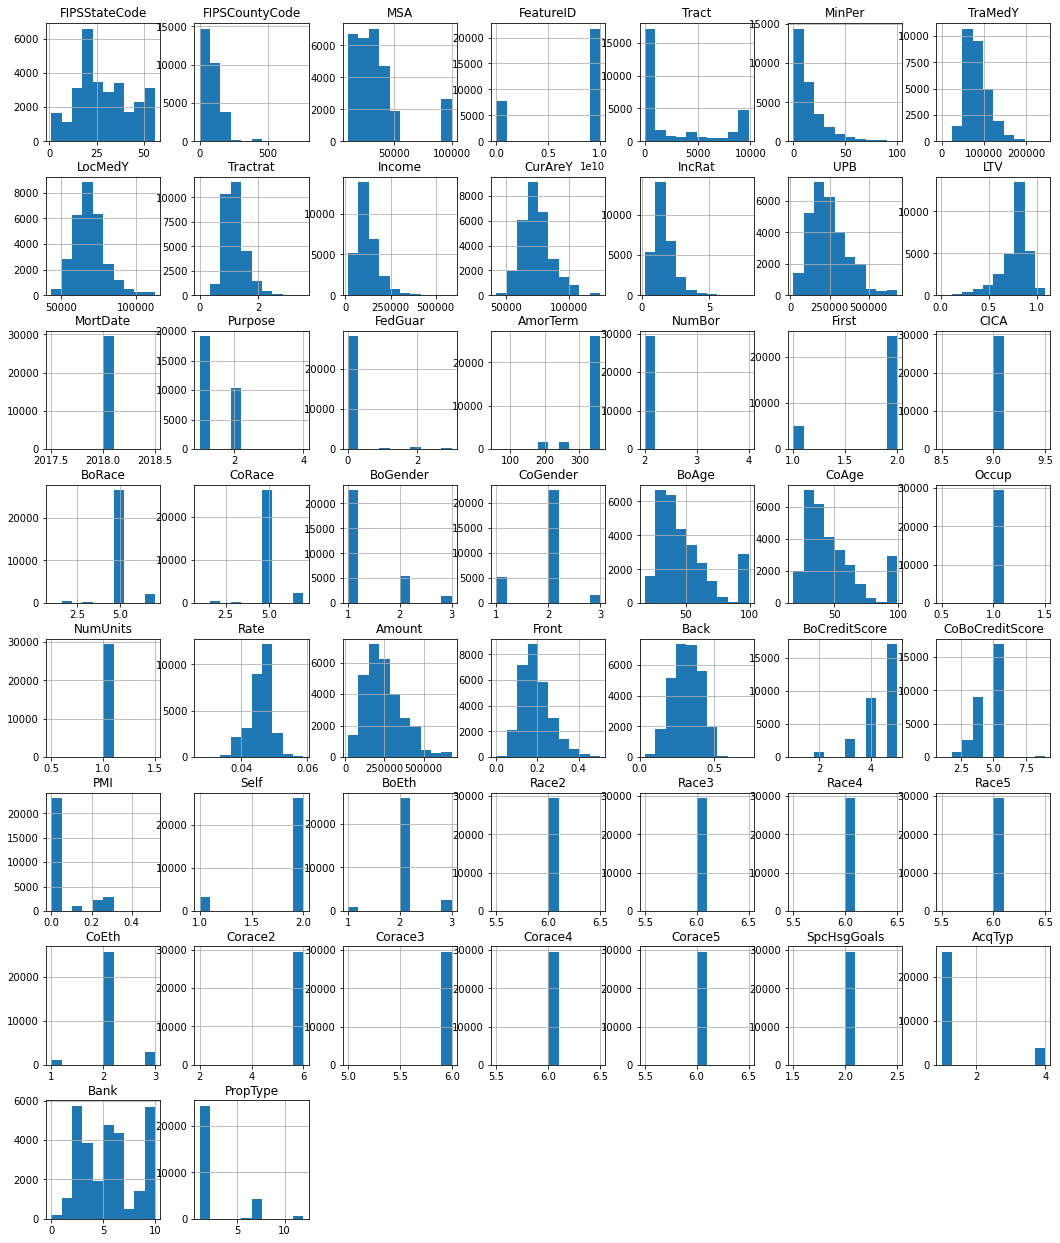

In [154]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 1].hist(figsize=(18,22))
plt.show()

In [112]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 > Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

In [113]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 2].describe().T

count              mean               std          min  \
FIPSStateCode   648.000000         29.302469         16.011719     1.000000   
FIPSCountyCode  648.000000         64.629630         48.773379     1.000000   
MSA             648.000000      52362.984568      33834.963780 10300.000000   
FeatureID       648.000000 8472487540.413580 3599885603.688511 25111.000000   
Tract           648.000000       4134.139722       4355.279318     1.000000   
MinPer          648.000000         11.070401         12.191863     0.120000   
TraMedY         648.000000      67992.726852      18189.480675 24627.000000   
LocMedY         648.000000      64585.814815       8448.198505 44368.000000   
Tractrat        648.000000          1.031239          0.238231     0.394100   
Income          648.000000     172028.183642      75763.737809 31704.000000   
CurAreY         648.000000      68895.370370       9298.040055 45000.000000   
IncRat          648.000000          2.532605          1.143574     0.490300   
UPB             648.000000     222255.023148      99958.344052 39400.000000   
LTV             648.000000          0.764475          0.098584     0.290000   
MortDate        648.000000       2018.000000          0.000000  2018.000000   
Purpose         648.000000          1.131173          0.337850     1.000000   
FedGuar         648.000000          0.000000          0.000000     0.000000   
AmorTerm        648.000000        354.259259         26.274159   180.000000   
NumBor          648.000000          2.004630          0.067936     2.000000   
First           648.000000          1.995370          0.067936     1.000000   
CICA            648.000000          9.000000          0.000000     9.000000   
BoRace          648.000000          5.015432          0.207456     3.000000   
CoRace          648.000000          4.989198          0.378977     1.000000   
BoGender        648.000000          1.166667          0.377087     1.000000   
CoGender        648.000000          1.842593          0.381051     1.000000   
BoAge           648.000000         58.759259         16.462333    26.000000   
CoAge           648.000000         57.831790         16.424746    24.000000   
Occup           648.000000          2.000000          0.000000     2.000000   
NumUnits        648.000000          1.000000          0.000000     1.000000   
Rate            648.000000          0.046351          0.002422     0.038800   
Amount          648.000000     222306.637346      99992.956933 39400.000000   
Front           648.000000          0.119494          0.061768     0.000100   
Back            648.000000          0.310671          0.093757     0.076300   
BoCreditScore   648.000000          4.779321          0.499525     2.000000   
CoBoCreditScore 648.000000          4.745370          0.543311     2.000000   
PMI             648.000000          0.022176          0.069412     0.000000   
Self            648.000000          1.912037          0.283460     1.000000   
BoEth           648.000000          2.013889          0.161499     1.000000   
Race2           648.000000          6.000000          0.000000     6.000000   
Race3           648.000000          6.000000          0.000000     6.000000   
Race4           648.000000          6.000000          0.000000     6.000000   
Race5           648.000000          6.000000          0.000000     6.000000   
CoEth           648.000000          2.015432          0.214777     1.000000   
Corace2         648.000000          6.000000          0.000000     6.000000   
Corace3         648.000000          6.000000          0.000000     6.000000   
Corace4         648.000000          6.000000          0.000000     6.000000   
Corace5         648.000000          6.000000          0.000000     6.000000   
SpcHsgGoals     648.000000          2.000000          0.000000     2.000000   
AcqTyp          648.000000          1.055556          0.404763     1.000000   
Bank            648.000000          4.641975          2.556604     1.00

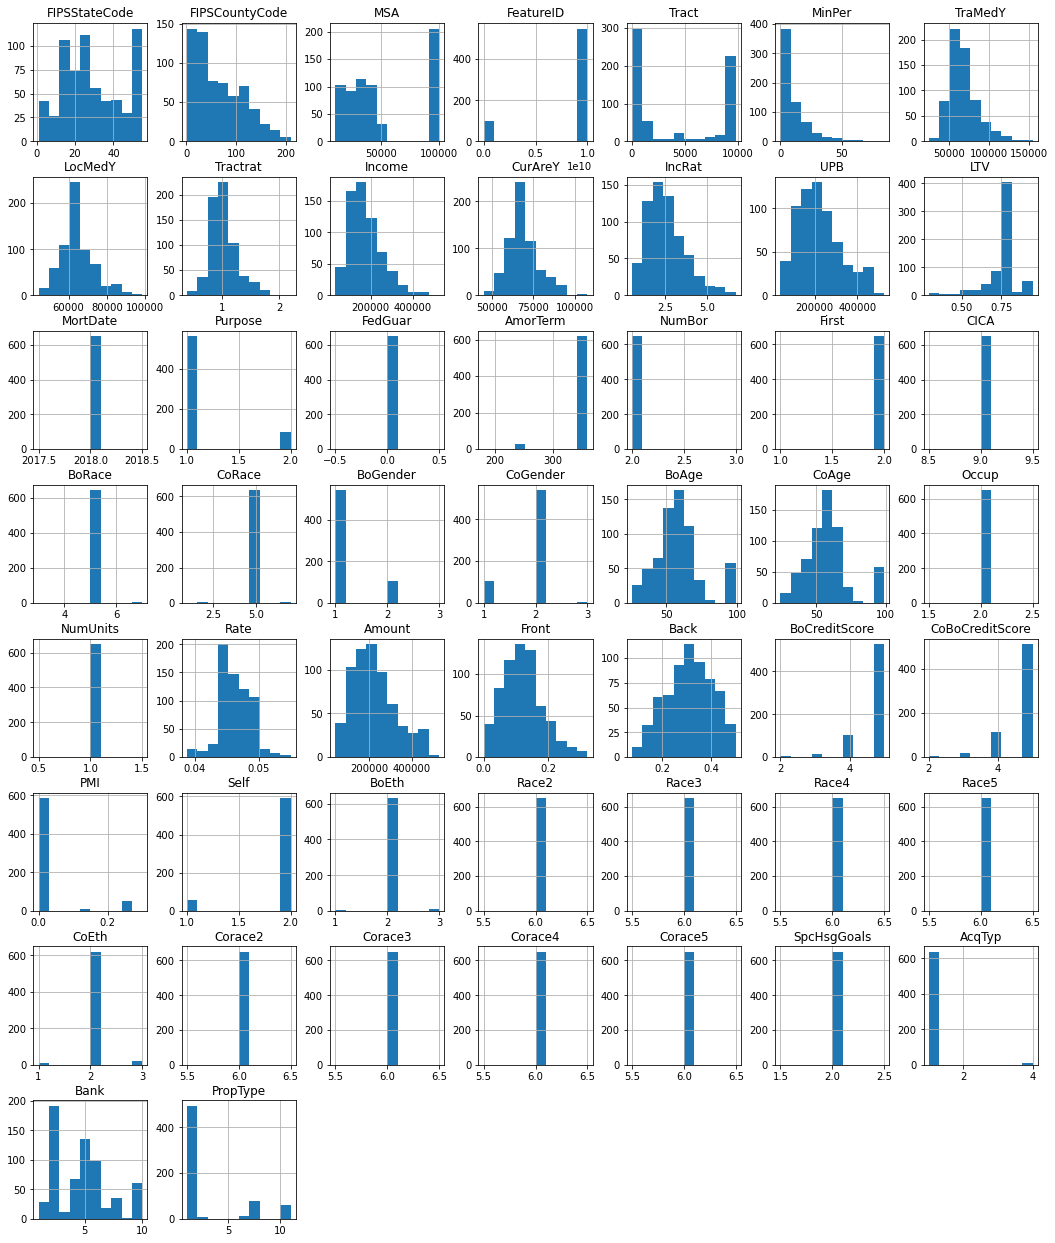

In [161]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 2].hist(figsize=(18,22))
plt.show()

In [115]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 > Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end ratio and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

In [116]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB==3].describe().T

count              mean               std           min  \
FIPSStateCode   711.000000         31.226442         12.893417      1.000000   
FIPSCountyCode  711.000000         78.364276         57.805412      1.000000   
MSA             711.000000      28717.164557      14228.117169  10300.000000   
FeatureID       711.000000 5022041833.014065 5002525916.935310 204796.000000   
Tract           711.000000       2115.549902       3091.206776      1.000000   
MinPer          711.000000         14.546399         12.621524      0.540000   
TraMedY         711.000000      86632.895921      24756.366138  26575.000000   
LocMedY         711.000000      66888.073136       8166.349436  45920.000000   
Tractrat        711.000000          1.280857          0.349879      0.393900   
Income          711.000000     119352.338959      48297.896744  24228.000000   
CurAreY         711.000000      68961.884669       8959.754860  46500.000000   
IncRat          711.000000          1.742426          0.699444      0.354700   
UPB             711.000000     230005.714487      96099.600646  56000.000000   
LTV             711.000000          0.758805          0.123759      0.180000   
MortDate        711.000000       2017.000000          0.000000   2017.000000   
Purpose         711.000000          1.489451          0.500241      1.000000   
FedGuar         711.000000          0.007032          0.083623      0.000000   
AmorTerm        711.000000        352.780591         29.064275    180.000000   
NumBor          711.000000          2.001406          0.037503      2.000000   
First           711.000000          1.917018          0.276049      1.000000   
CICA            711.000000          9.000000          0.000000      9.000000   
BoRace          711.000000          4.969058          0.366405      2.000000   
CoRace          711.000000          4.983122          0.403850      2.000000   
BoGender        711.000000          1.164557          0.371041      1.000000   
CoGender        711.000000          1.839662          0.378510      1.000000   
BoAge           711.000000         46.783404         16.977145     20.000000   
CoAge           711.000000         46.028129         17.040277     20.000000   
Occup           711.000000          1.000000          0.000000      1.000000   
NumUnits        711.000000          1.000000          0.000000      1.000000   
Rate            711.000000          0.040106          0.002211      0.032500   
Amount          711.000000     231247.358650      96424.336099  56000.000000   
Front           711.000000          0.176133          0.060097      0.040000   
Back            711.000000          0.294932          0.086368      0.080000   
BoCreditScore   711.000000          4.518987          0.653801      2.000000   
CoBoCreditScore 711.000000          4.548523          0.688002      2.000000   
PMI             711.000000          0.043994          0.098688      0.000000   
Self            711.000000          1.956399          0.204348      1.000000   
BoEth           711.000000          1.998594          0.171975      1.000000   
Race2           711.000000          6.000000          0.000000      6.000000   
Race3           711.000000          6.000000          0.000000      6.000000   
Race4           711.000000          6.000000          0.000000      6.000000   
Race5           711.000000          6.000000          0.000000      6.000000   
CoEth           711.000000          2.002813          0.218814      1.000000   
Corace2         711.000000          6.000000          0.000000      6.000000   
Corace3         711.000000          6.000000          0.000000      6.000000   
Corace4         711.000000          6.000000          0.000000      6.000000   
Corace5         711.000000          6.000000          0.000000      6.000000   
SpcHsgGoals     711.000000          2.000000          0.000000      2.000000   
AcqTyp          711.000000          1.987342          1.410667      1.000000   
Bank            711.0

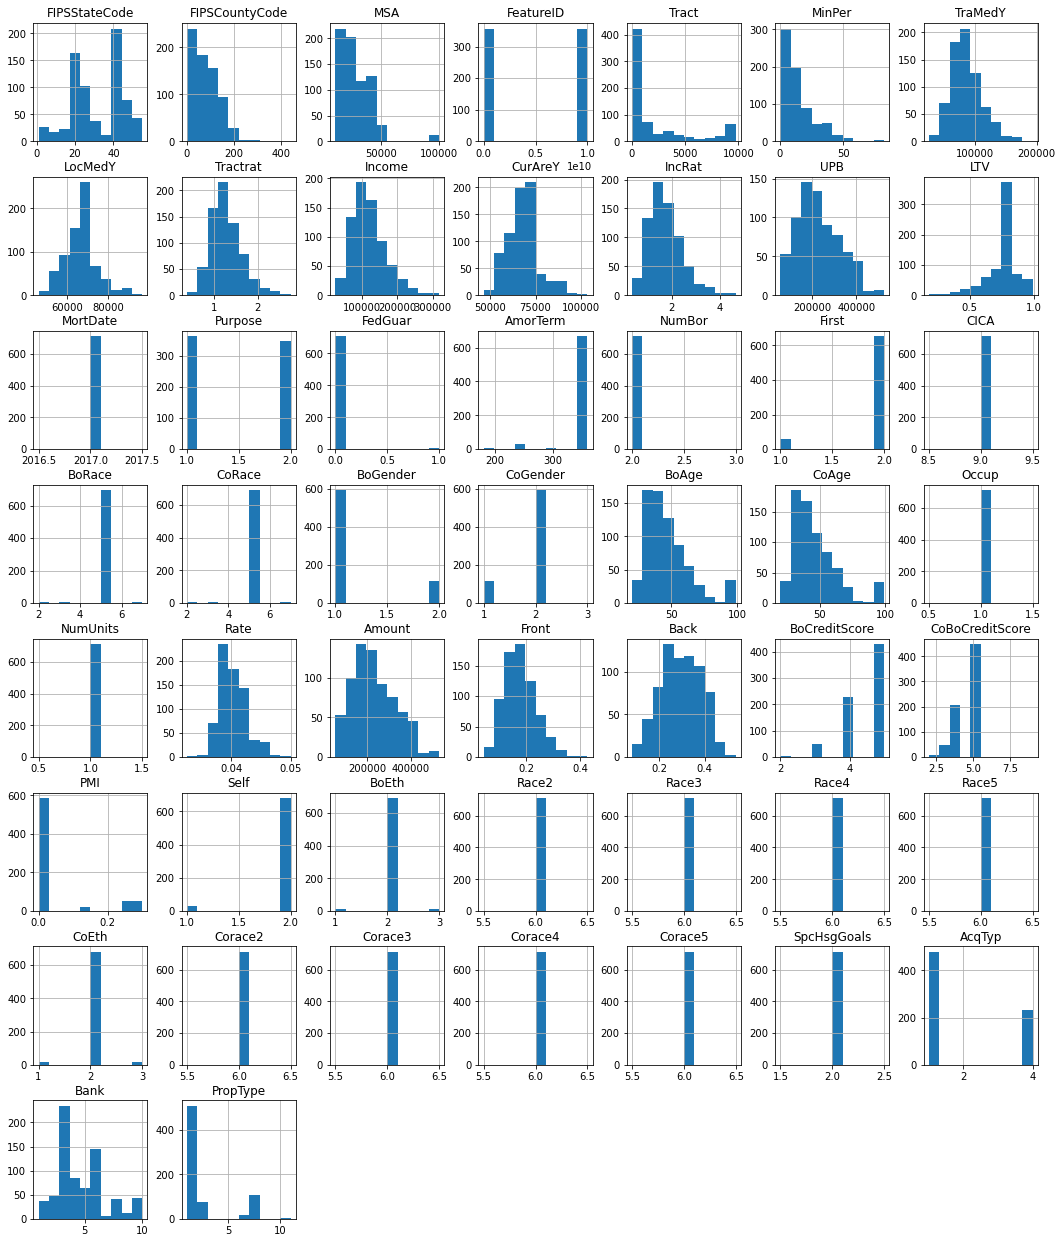

In [160]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 3].hist(figsize=(18,22))
plt.show()

In [118]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 or 2 mostly for noise cluster -1
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# Maximum number of BoRace of type 5  fall in this cluster (Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Maximum number of CoRace of type 5  fall in this cluster (Type 8 > Type 5 > Type 7 > Type 2 > Type 3 > Type 1 > Type 4 > Type 6(~0))
# Borrower Gender of Type 1 > Type 2 > Type 3 fall in this category
# Co Borrower Gender of Type 4 > Type 2 > Type 1 > Type 3 fall in this category
# Almost all ages of borrower and co brrower.
# Very low front end reation and high backend ratio
# Borowwer with 629 and above credit score and Coborrower with missing credit score
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached;

In [119]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 4].describe().T

count             mean               std           min  \
FIPSStateCode   1280.000000        32.007812         10.824996      1.000000   
FIPSCountyCode  1280.000000        73.837500         49.027176      1.000000   
MSA             1280.000000     24599.471875      15320.028939  10420.000000   
FeatureID       1280.000000 579867573.671094 2334365973.945164 122423.000000   
Tract           1280.000000      1729.690547       2943.347443      1.000000   
MinPer          1280.000000        17.911344         18.215384      0.400000   
TraMedY         1280.000000     70673.242969      22842.458264      0.000000   
LocMedY         1280.000000     65951.676562       6974.318483  45334.000000   
Tractrat        1280.000000         1.038130          0.337530      0.000000   
Income          1280.000000     49167.848437      21221.149949  13116.000000   
CurAreY         1280.000000     70406.640625       7978.038344  47800.000000   
IncRat          1280.000000         0.703887          0.313487      0.181400   
UPB             1280.000000    124525.460156      59714.609184  16469.000000   
LTV             1280.000000         0.737258          0.147933      0.130000   
MortDate        1280.000000      2018.000000          0.000000   2018.000000   
Purpose         1280.000000         1.285156          0.451665      1.000000   
FedGuar         1280.000000         0.000000          0.000000      0.000000   
AmorTerm        1280.000000       356.254687         22.995138    180.000000   
NumBor          1280.000000         1.000000          0.000000      1.000000   
First           1280.000000         1.628906          0.483286      1.000000   
CICA            1280.000000         9.000000          0.000000      9.000000   
BoRace          1280.000000         5.014062          0.707243      1.000000   
CoRace          1280.000000         8.000000          0.000000      8.000000   
BoGender        1280.000000         1.584375          0.580426      1.000000   
CoGender        1280.000000         4.000000          0.000000      4.000000   
BoAge           1280.000000        43.494531         16.590217     20.000000   
CoAge           1280.000000        98.000000          0.000000     98.000000   
Occup           1280.000000         1.000000          0.000000      1.000000   
NumUnits        1280.000000         1.000000          0.000000      1.000000   
Rate            1280.000000         0.045309          0.002863      0.035000   
Amount          1280.000000    124563.646875      59716.108805  20000.000000   
Front           1280.000000         0.237000          0.066500      0.040000   
Back            1280.000000         0.311336          0.073799      0.060000   
BoCreditScore   1280.000000         4.532031          0.645358      3.000000   
CoBoCreditScore 1280.000000         9.000000          0.000000      9.000000   
PMI             1280.000000         0.039602          0.094529      0.000000   
Self            1280.000000         1.976562          0.151348      1.000000   
BoEth           1280.000000         2.046094          0.265682      1.000000   
Race2           1280.000000         6.000000          0.000000      6.000000   
Race3           1280.000000         6.000000          0.000000      6.000000   
Race4           1280.000000         6.000000          0.000000      6.000000   
Race5           1280.000000         6.000000          0.000000      6.000000   
CoEth           1280.000000         5.000000          0.000000      5.000000   
Corace2         1280.000000         8.000000          0.000000      8.000000   
Corace3         1280.000000         8.000000          0.000000      8.000000   
Corace4         1280.000000         8.000000          0.000000      8.000000   
Corace5         1280.000000         8.000000          0.000000      8.000000   
SpcHsgGoals     1280.000000         1.000000          0.000000      1.000000   
AcqTyp          1280.000000         4.000000          0.000000      4.000000   
Bank            1280.0

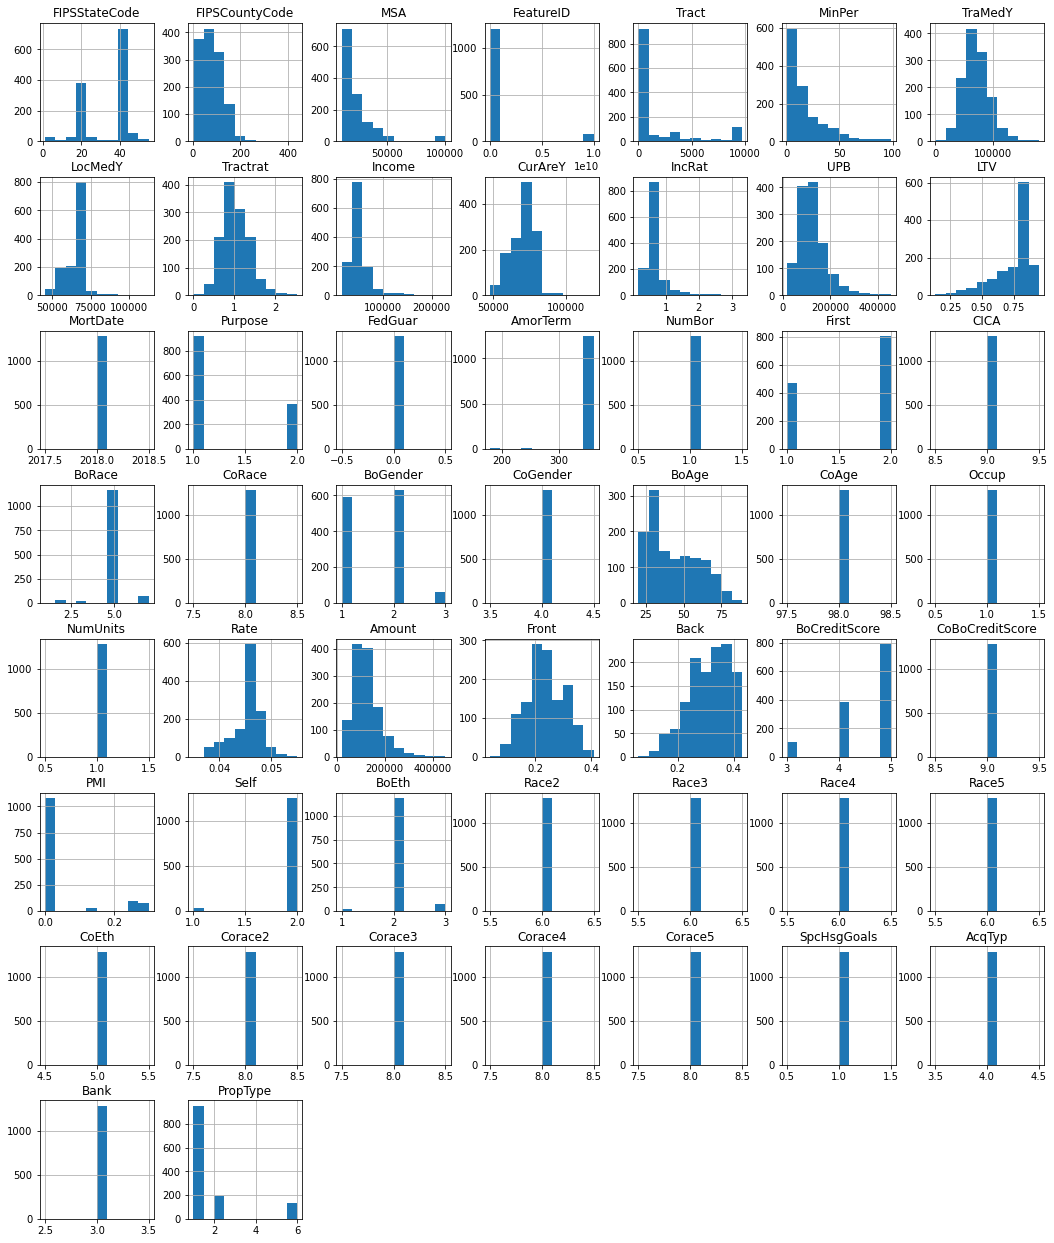

In [159]:
# statistical summary of the numerical variables

df_final[X.Cluster_DB== 4].hist(figsize=(18,22))
plt.show()

In [121]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# Generally have Single borrower type or Two Borrowers in this cluster
# BoEthinicity: 2 = Non Hispanic or Latino
# CoEthinicity : No coborrower
# Maximum number of BoRace of type 5  i.e. White 
# Borrower Gender of Type 1(Male) > Type 2(Female)
# Almost all ages of borrower and co brrower lies between (20-80) and maximum 30
# Very low frontend ratio < 2(high backend ratio) 
# Borrower with 700 and above credit score till max - 760(5) > 700-760(4) > 660-700(3)
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached; > PT06=Low-Rise Condominium; ~ Mostly PT02=Deminimus PUD;
# Occupancy : Single
# AcqType : 4 - Credit Enhancement
# Bank : 3 - Cincinnati bank location

In [122]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 5].describe().T

count              mean               std           min  \
FIPSStateCode   485.000000         29.173196         13.048182      4.000000   
FIPSCountyCode  485.000000         75.400000         53.413992      1.000000   
MSA             485.000000      28805.721649      12694.788946  10420.000000   
FeatureID       485.000000 5670947623.140206 4959041350.845634 445343.000000   
Tract           485.000000       2088.673361       2942.691579      1.000000   
MinPer          485.000000         17.690433         15.416797      0.910000   
TraMedY         485.000000      82956.459794      21050.066733  31641.000000   
LocMedY         485.000000      67943.863918       8246.484130  45920.000000   
Tractrat        485.000000          1.211802          0.291941      0.530000   
Income          485.000000      80074.437113      37084.002589  14700.000000   
CurAreY         485.000000      70167.216495       9245.649942  47800.000000   
IncRat          485.000000          1.152674          0.542341      0.221400   
UPB             485.000000     201644.668041      90337.321886  40000.000000   
LTV             485.000000          0.764289          0.109364      0.260000   
MortDate        485.000000       2017.000000          0.000000   2017.000000   
Purpose         485.000000          1.461856          0.499058      1.000000   
FedGuar         485.000000          0.012371          0.110650      0.000000   
AmorTerm        485.000000        355.447423         22.184515    180.000000   
NumBor          485.000000          1.000000          0.000000      1.000000   
First           485.000000          1.888660          0.314878      1.000000   
CICA            485.000000          9.000000          0.000000      9.000000   
BoRace          485.000000          4.962887          0.496542      2.000000   
CoRace          485.000000          8.000000          0.000000      8.000000   
BoGender        485.000000          1.457732          0.519025      1.000000   
CoGender        485.000000          4.000000          0.000000      4.000000   
BoAge           485.000000         47.536082         17.700015     21.000000   
CoAge           485.000000         98.000000          0.000000     98.000000   
Occup           485.000000          1.000000          0.000000      1.000000   
NumUnits        485.000000          1.000000          0.000000      1.000000   
Rate            485.000000          0.040301          0.002140      0.035000   
Amount          485.000000     202316.482474      90384.038678  40000.000000   
Front           485.000000          0.232246          0.080837      0.060000   
Back            485.000000          0.333841          0.089652      0.120000   
BoCreditScore   485.000000          4.362887          0.755328      2.000000   
CoBoCreditScore 485.000000          9.000000          0.000000      9.000000   
PMI             485.000000          0.038082          0.092737      0.000000   
Self            485.000000          1.985567          0.119390      1.000000   
BoEth           485.000000          1.991753          0.213041      1.000000   
Race2           485.000000          6.000000          0.000000      6.000000   
Race3           485.000000          6.000000          0.000000      6.000000   
Race4           485.000000          6.000000          0.000000      6.000000   
Race5           485.000000          6.000000          0.000000      6.000000   
CoEth           485.000000          5.000000          0.000000      5.000000   
Corace2         485.000000          8.000000          0.000000      8.000000   
Corace3         485.000000          8.000000          0.000000      8.000000   
Corace4         485.000000          8.000000          0.000000      8.000000   
Corace5         485.000000          8.000000          0.000000      8.000000   
SpcHsgGoals     485.000000          2.000000          0.000000      2.000000   
AcqTyp          485.000000          1.847423          1.352003      1.000000   
Bank            485.0

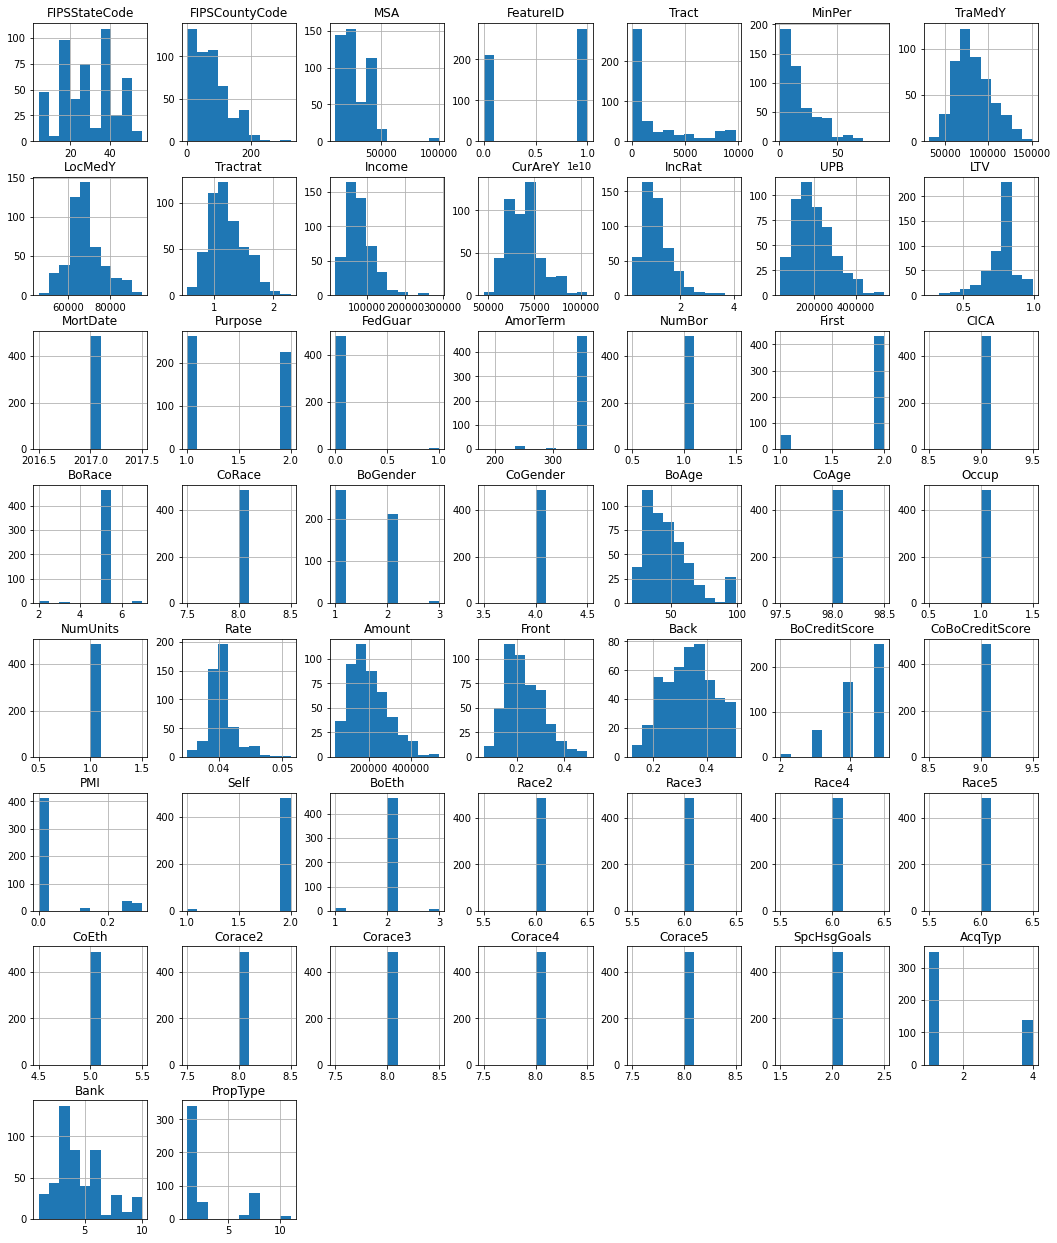

In [158]:
# statistical summary of the numerical variables

df_final[X.Cluster_DB== 5].hist(figsize=(18,22))
plt.show()

In [124]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (5-10)> (48-52) >(22-27)
# FIPSCountryCode : Mostly found in 0-100 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-600 and 9500-10000
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income, IncRat : Very-very low income value ranges to [0,20]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-95600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (45000, 11500)
# Tractrat : Tract Income Ratio is highest for 0.75 to 1.35 
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) after that few oulier on the right side.
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.25 -1) but highest at 0.76
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 3=second mortgage;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA;  2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 350mostly , few outlier of 230-250 and 160-180 range
# NumBor : 1 
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Generally have Single borrower type or Two Borrowers in this cluster
# BoEthinicity: 2 = Non Hispanic or Latino
# CoEthinicity : No coborrower
# Maximum number of BoRace of type 5  i.e. White 
# Borrower Gender of Type 1(Male) > Type 2(Female)
# Almost all ages of borrower and co brrower lies between (20-80) and maximum 30
# Very low frontend ratio < 2(high backend ratio) 
# Borrower with 700 and above credit score till max - 760(5) > 700-760(4) > 660-700(3)
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached; > PT06=Low-Rise Condominium; > Mostly PT02=Deminimus PUD; then PT07=PUD; and 
# Occupancy : Single
# Acq : 1 - Cash and 4 - Credit Enhancement
# Bank : 3 - Cincinnati bank location

In [125]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 6].describe().T

count             mean               std          min  \
FIPSStateCode   413.000000        32.055690         11.538425     1.000000   
FIPSCountyCode  413.000000        68.520581         50.661572     3.000000   
MSA             413.000000     27763.629540      19462.253815 10420.000000   
FeatureID       413.000000 268190215.518160 1611771166.325855 11953.000000   
Tract           413.000000      1883.909274       3199.917901     1.000000   
MinPer          413.000000        17.862203         19.408148     0.540000   
TraMedY         413.000000     64828.593220      21388.342627 14323.000000   
LocMedY         413.000000     64868.077482       7779.506725 44547.000000   
Tractrat        413.000000         0.916228          0.312279     0.202900   
Income          413.000000     71008.619855      40862.766789 18060.000000   
CurAreY         413.000000     69577.239709       8901.789671 47800.000000   
IncRat          413.000000         1.045041          0.638080     0.245400   
UPB             413.000000    148233.123487      71056.789965 31958.000000   
LTV             413.000000         0.712688          0.157755     0.160000   
MortDate        413.000000      2018.000000          0.000000  2018.000000   
Purpose         413.000000         1.239709          0.427424     1.000000   
FedGuar         413.000000         0.000000          0.000000     0.000000   
AmorTerm        413.000000       358.634383         12.024024   216.000000   
NumBor          413.000000         2.000000          0.000000     2.000000   
First           413.000000         1.765133          0.424430     1.000000   
CICA            413.000000         9.000000          0.000000     9.000000   
BoRace          413.000000         4.973366          0.494403     2.000000   
CoRace          413.000000         4.970944          0.515891     2.000000   
BoGender        413.000000         1.164649          0.377793     1.000000   
CoGender        413.000000         1.854722          0.379330     1.000000   
BoAge           413.000000        48.409201         18.511335    20.000000   
CoAge           413.000000        47.518160         18.227601    20.000000   
Occup           413.000000         1.000000          0.000000     1.000000   
NumUnits        413.000000         1.000000          0.000000     1.000000   
Rate            413.000000         0.045784          0.002506     0.038800   
Amount          413.000000    148267.026634      71054.155634 32000.000000   
Front           413.000000         0.204915          0.073708     0.060000   
Back            413.000000         0.303366          0.074528     0.080000   
BoCreditScore   413.000000         4.590799          0.626760     3.000000   
CoBoCreditScore 413.000000         4.615012          0.590760     3.000000   
PMI             413.000000         0.025206          0.076725     0.000000   
Self            413.000000         1.944310          0.229600     1.000000   
BoEth           413.000000         2.021792          0.176288     1.000000   
Race2           413.000000         6.000000          0.000000     6.000000   
Race3           413.000000         6.000000          0.000000     6.000000   
Race4           413.000000         6.000000          0.000000     6.000000   
Race5           413.000000         6.000000          0.000000     6.000000   
CoEth           413.000000         2.036320          0.243634     1.000000   
Corace2         413.000000         6.000000          0.000000     6.000000   
Corace3         413.000000         6.000000          0.000000     6.000000   
Corace4         413.000000         6.000000          0.000000     6.000000   
Corace5         413.000000         6.000000          0.000000     6.000000   
SpcHsgGoals     413.000000         1.000000          0.000000     1.000000   
AcqTyp          413.000000         4.000000          0.000000     4.000000   
Bank            413.000000         3.000000          0.000000     3.000000   
PropType        413.000000         1.457627

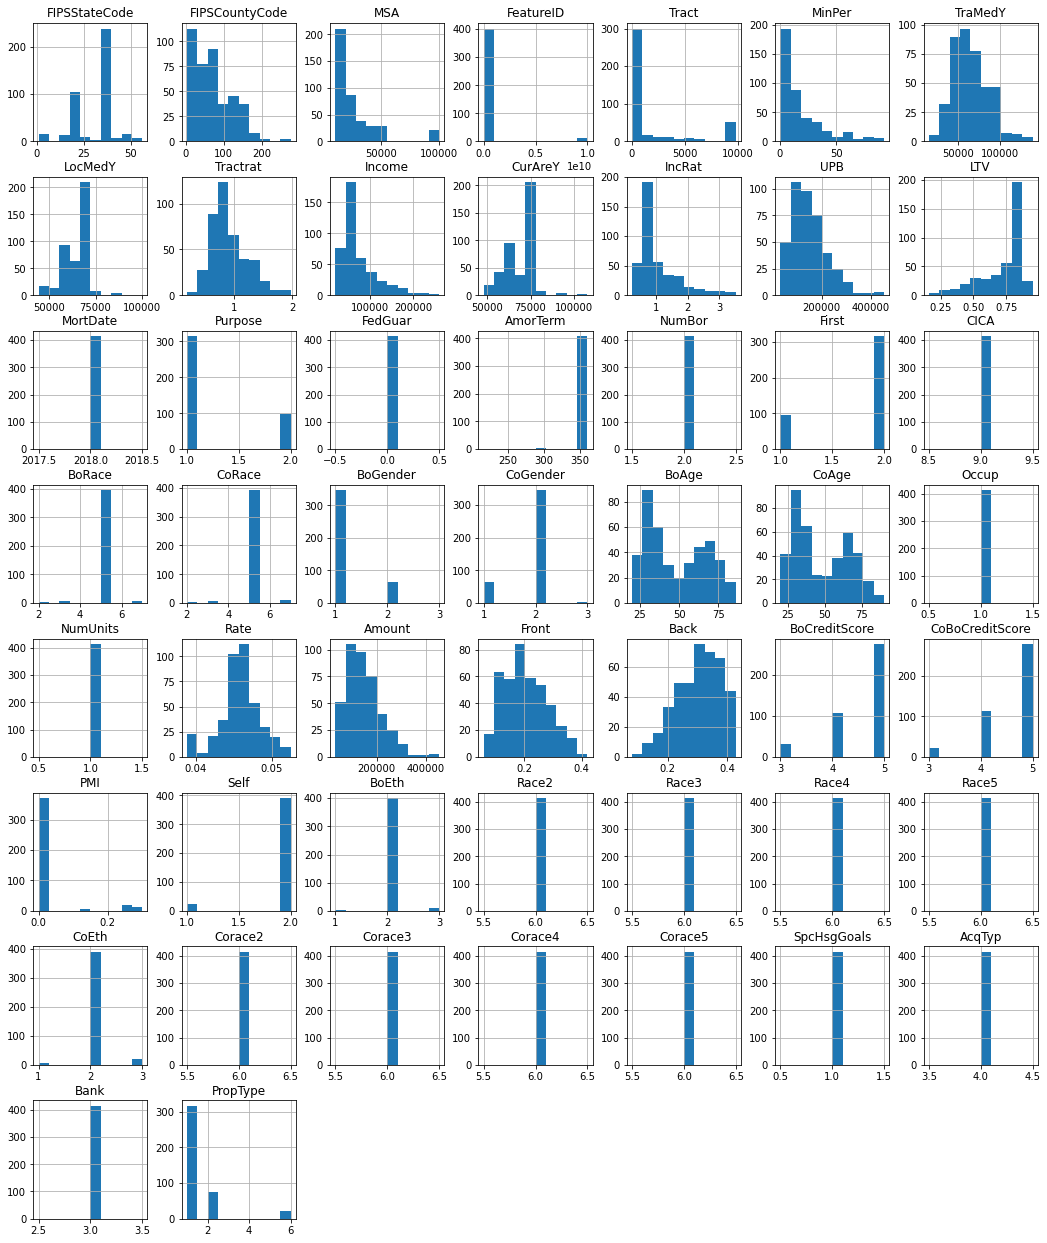

In [156]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 6].hist(figsize=(18,22))
plt.show()

In [126]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (40) ~ (38-42)
# FIPSCountryCode : Mostly found in 0-170 range, and highest at 10 and 50
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0 to 1000 and highest at 10-10
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually and again increasing for (90-100)
# Income : Very-very low income value ranges to [1000, 100000] and highest at 50000
# IncRat : Very-very low income value ranges to [0.5, 2] and highest at 0.75 and then gradually decreasing
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (50000-75600) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (50000, 100000) and highest at (70000~75000)
# Tractrat : Tract Income Ratio is highest for 0.75
# CurAreY : Area Median Family Income in Whole Dollars lies between (60000-80000) and highest at 75000 to 80000
# UPB : ranges for 0.1 to 0.3 and then sudden increase for 0.45
# LTV : Loan to Value Ratio at Origination lies between (0.40,-1) but highest at 0.8
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 2=refinancing;
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 1=FHA; 2=VA; 3=FMHA-Guaranteed Rural Housing Loan;
# AmorTerm : Amortization Term in months= 360 mostly, few outlier of 300 range
# NumBor : 1 mostlty for cluster 6
# First : Count of First Time buyer is less i.e. 1 < 2(not first time buyer)
# CiCA : Mostly on those not applicable
# Amount : lies between (100000 - 300000) and maximum between (120000, 200000)
# Generally have Single borrower type or Two Borrowers in this cluster
# BoEthinicity, CoEthinicity: 2 = Non Hispanic or Latino
# Maximum number of BoRace and CoRace of type 5  i.e. White 
# Borrower Gender of Type 1(Male) > Type 2(Female)
# CoBorrower Gender of Type 2(Female) > Type 1(Male) fall in this category
# Almost all ages of borrower and co brrower lies between (20-80) and maximum 30
# Very low frontend ratio < 2(high backend ratio) 
# Borrower with 700 and above credit score till max - 760(5) > 700-760(4) > 660-700(3)
# Coborrower with 700 and above credit score till max - 760(5) > 700-760(4) > 660-700(3)
# Self : Very low rate for self employeed.
# PropType : Mostly PT01=Single family detached; > PT02=Deminimus PUD; > PT06=Low-Rise Condominium
# Occupancy : Single
# Acq : 4 - Credit Enhancement
# Bank : 3 - Cincinnati bank location

In [127]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 7].describe().T

count              mean               std           min  \
FIPSStateCode   105.000000         26.609524         14.581663      1.000000   
FIPSCountyCode  105.000000         62.961905         47.492494      1.000000   
MSA             105.000000      31900.257143      15731.303401  10300.000000   
FeatureID       105.000000 8666951037.580952 3414921773.150215 950064.000000   
Tract           105.000000       1205.543238       2503.682688      2.000000   
MinPer          105.000000         16.432762         13.885854      0.930000   
TraMedY         105.000000      71184.161905      16616.748579  39709.000000   
LocMedY         105.000000      64820.657143       7582.995279  47816.000000   
Tractrat        105.000000          1.098186          0.239712      0.574300   
Income          105.000000     133609.333333      67263.867198  31289.000000   
CurAreY         105.000000      69020.000000       8203.990586  48200.000000   
IncRat          105.000000          1.937330          0.951818      0.469100   
UPB             105.000000     213244.761905      87000.510453  40000.000000   
LTV             105.000000          0.781619          0.070043      0.530000   
MortDate        105.000000       2018.000000          0.000000   2018.000000   
Purpose         105.000000          1.009524          0.097590      1.000000   
FedGuar         105.000000          0.000000          0.000000      0.000000   
AmorTerm        105.000000        357.714286         16.481758    240.000000   
NumBor          105.000000          1.000000          0.000000      1.000000   
First           105.000000          2.000000          0.000000      2.000000   
CICA            105.000000          9.000000          0.000000      9.000000   
BoRace          105.000000          5.028571          0.448441      2.000000   
CoRace          105.000000          8.000000          0.000000      8.000000   
BoGender        105.000000          1.514286          0.502193      1.000000   
CoGender        105.000000          4.000000          0.000000      4.000000   
BoAge           105.000000         53.980952         12.864666     24.000000   
CoAge           105.000000         98.000000          0.000000     98.000000   
Occup           105.000000          2.000000          0.000000      2.000000   
NumUnits        105.000000          1.000000          0.000000      1.000000   
Rate            105.000000          0.046864          0.002826      0.038800   
Amount          105.000000     213277.571429      87008.888686  40000.000000   
Front           105.000000          0.124811          0.067580      0.000100   
Back            105.000000          0.329264          0.088947      0.120000   
BoCreditScore   105.000000          4.704762          0.517461      3.000000   
CoBoCreditScore 105.000000          9.000000          0.000000      9.000000   
PMI             105.000000          0.022476          0.068652      0.000000   
Self            105.000000          1.990476          0.097590      1.000000   
BoEth           105.000000          1.980952          0.195180      1.000000   
Race2           105.000000          6.000000          0.000000      6.000000   
Race3           105.000000          6.000000          0.000000      6.000000   
Race4           105.000000          6.000000          0.000000      6.000000   
Race5           105.000000          6.000000          0.000000      6.000000   
CoEth           105.000000          5.000000          0.000000      5.000000   
Corace2         105.000000          8.000000          0.000000      8.000000   
Corace3         105.000000          8.000000          0.000000      8.000000   
Corace4         105.000000          8.000000          0.000000      8.000000   
Corace5         105.000000          8.000000          0.000000      8.000000   
SpcHsgGoals     105.000000          2.000000          0.000000      2.000000   
AcqTyp          105.000000          1.057143          0.412044      1.000000   
Bank            105.0

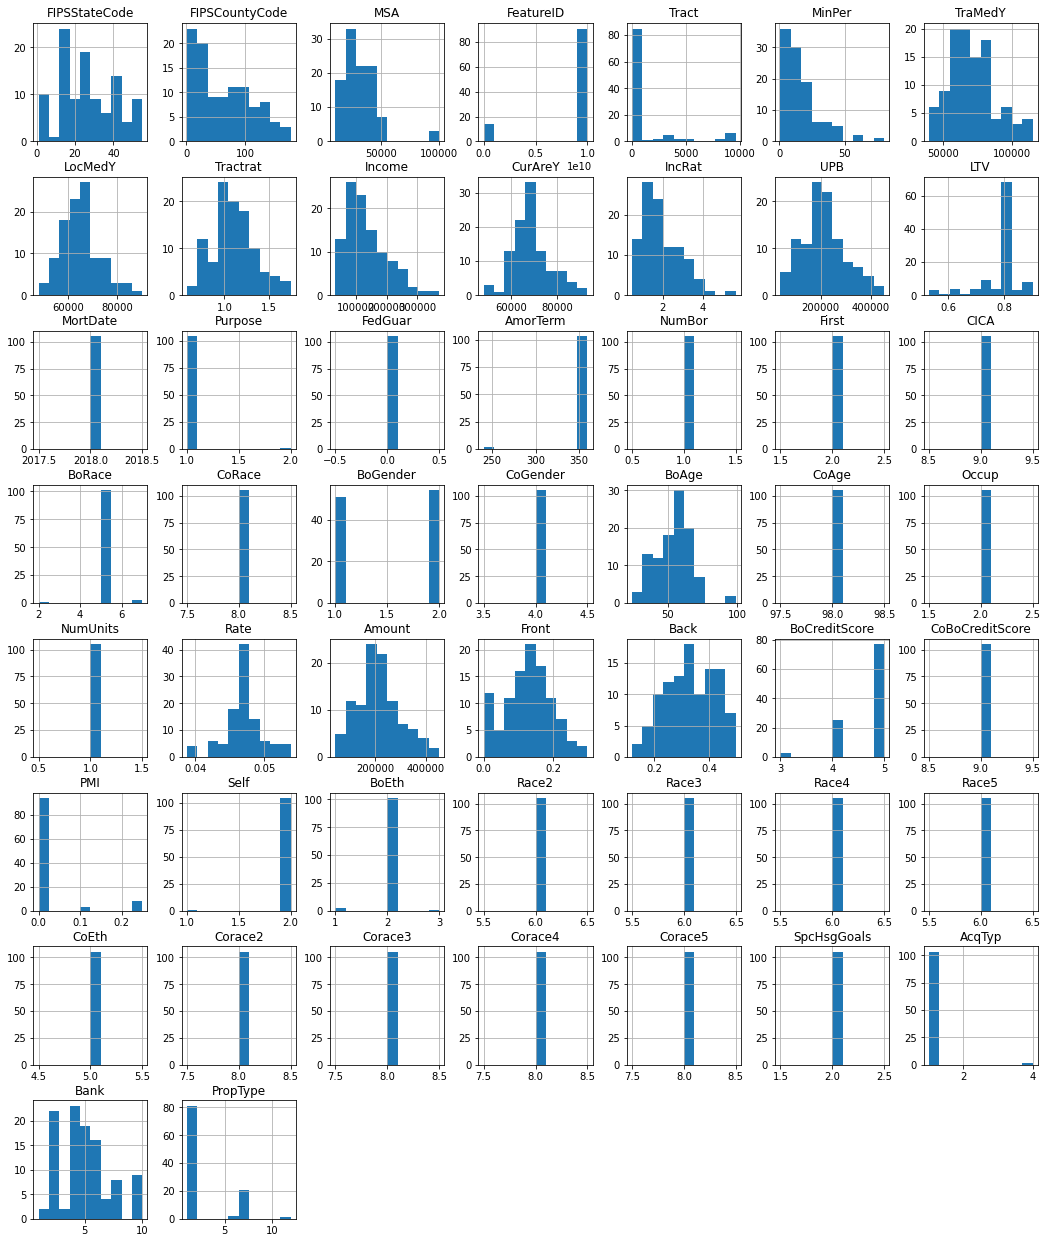

In [155]:
# statistical summary of the numerical variables
df_final[X.Cluster_DB== 7].hist(figsize=(18,22))
plt.show()

In [129]:
# Columns -> Insites

# FIPSStateCode : >70 lies in range (5 to 58 ) but highest for (20-30)> (10-20) >(40-50)
# FIPSCountryCode : Mostly found in 0-175 range, and rest are few outliers
# MSA : Most values lies between 10000-50000 and 100000
# Tract : Census Tract is highest for 0-500 and rest are like outliers for this columns
# MinPer : As per Census Tract Minority Percentage is highest for (0-20) and then decreasing gradually
# Income : higer income value ranges to [630000, 1500000]
# TractMedY : Census Tract Median Family Income in Whole Dollars highest for (60000-72000) and then gradually decreasing
# LocMedY : Local Area Median Income in Whole Dollars lies in range (60000, 70000)
# InRat : is between 1 to 3
# Tractrat : Tract Income Ratio is highest for 0.95 to 1.30 
# CurAreY : Area Median Family Income in Whole Dollars is highest between (60000-70000) 
# UPB : highest in ranges for 150000 to 220000 
# LTV : Loan to Value Ratio at Origination is highest at 0.72 - 0.8
# MortDate : mostly with 2018 mortized date.
# Purpose : Loan Purpose => 1=purchase; 
# FedGuar : Federal Guarantee highest count is for 0 => 0=no federal guarantee; 
# AmorTerm : Amortization Term in months= 360 
# NumBor : 1
# First : 2(not first time buyer)
# CiCA : Mostly on those not applicable i.e. not funded project under CICS or AIC or others.
# Single borrower type in this cluster
# BoRace not defined.
# BoEthinicity : Non Hispanic or Latino
# Borrower Gender of Type 2(Female) > Type 1(Male) fall in this category
# Almost ages of borrower( 30-70) and Maximum no of borrrower lie in 55 to 60 age
# No coborrower reported
# Low front end ratio < = 2 (backend ratio )
# Borowwer with 700 and above credit score till max of 760
# Self : Not self employeed.
# PropType : Mostly PT02=Deminimus PUD; then PT07=PUD; and PT06=Low-Rise Condominium; then PT12=Manufactured Home

Final Model prediction using Clusters:

In [175]:
df_final.groupby(X['Cluster_DB']).describe().T[:50]

Cluster_DB                          -1                 0                 1  \
FIPSStateCode  count       9556.000000      23061.000000      29444.000000   
               mean          27.554207         27.882225         28.970894   
               std           17.904593         14.548233         14.313277   
               min            1.000000          1.000000          1.000000   
               25%            9.000000         17.000000         18.000000   
               50%           25.000000         26.000000         26.000000   
               75%           48.000000         39.000000         39.000000   
               max           72.000000         66.000000         56.000000   
FIPSCountyCode count       9556.000000      23061.000000      29444.000000   
               mean          99.678108         86.568059         87.146651   
               std          134.149090         76.931892         73.404410   
               min            1.000000          1.000000          1.000000   
               25%           29.000000         31.000000         35.000000   
               50%           59.000000         71.000000         77.000000   
               75%          111.000000        119.000000        121.000000   
               max          840.000000        760.000000        760.000000   
MSA            count       9556.000000      23061.000000      29444.000000   
               mean       37802.565613      34288.962057      35037.088677   
               std        22703.707224      22186.229918      22803.159083   
               min        10180.000000      10100.000000      10100.000000   
               25%        19820.000000      19220.000000      19380.000000   
               50%        34980.000000      29820.000000      30460.000000   
               75%        43745.000000      40060.000000      40380.000000   
               max        99999.000000      99999.000000      99999.000000   
FeatureID      count       9556.000000      23061.000000      29444.000000   
               mean  8192058943.933445 7527474681.180781 7382318828.170221   
               std   3848225669.882557 4313683936.015442 4395465997.452142   
               min         6920.000000       6920.000000      13150.000000   
               25%   9999999999.000000 9999999999.000000    2410860.000000   
               50%   9999999999.000000 9999999999.000000 9999999999.000000   
               75%   9999999999.000000 9999999999.000000 9999999999.000000   
               max   9999999999.000000 9999999999.000000 9999999999.000000   
Tract          count       9556.000000      23061.000000      29444.000000   
               mean        3225.379517       2640.735463       2794.137320   
               std         3523.138377       3594.638003       3701.486328   
               min            1.000000          1.000000          1.000000   
               25%          117.107500        102.000000        103.070000   
               50%         1235.515000        426.060000        501.010000   
               75%         6029.000000       4842.000000       5301.000000   
               max         9900.010000       9856.000000       9818.000000   
MinPer         count       9556.000000      23061.000000      29444.000000   
               mean          35.160530         19.097631         15.264647   
               std           28.302777         17.936428         14.752833   
               min            0.000000          0.000000          0.000000   
               25%           11.000000          6.430000          5.160000   
               50%           26.805000         13.160000         10.250000   
               75%           54.402500         25.410000         19.962500   
               max          100.000000        100.000000         99.650000   
TraMedY        count       9556.000000      23061.000000      29444.000000   
               mean       90015.147133      80997.701964      84066.432652   

Cluster_DB           

In [174]:
df_final.groupby(X['Cluster_DB']).describe().T[50:100]

Cluster_DB                 -1             0             1             2  \
TraMedY  std     41704.135186  27611.247790  27366.901634  18189.480675   
         min         0.000000      0.000000      0.000000  24627.000000   
         25%     59794.000000  61382.000000  64507.500000  55632.500000   
         50%     80487.000000  75682.000000  78758.000000  64562.000000   
         75%    111975.250000  96875.000000  99851.500000  75668.500000   
         max    250001.000000 247679.000000 245119.000000 154792.000000   
LocMedY  count    9556.000000  23061.000000  29444.000000    648.000000   
         mean    76362.276580  69888.833008  69709.862655  64585.814815   
         std     18186.018990  10852.383220  10894.914585   8448.198505   
         min     18666.000000  44547.000000  43702.000000  44368.000000   
         25%     62827.000000  62393.000000  62393.000000  59320.750000   
         50%     71351.000000  69106.000000  69038.000000  63600.500000   
         75%     86766.000000  75812.000000  74891.000000  69106.000000   
         max    127500.000000 112655.000000 112655.000000  98431.000000   
Tractrat count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        1.177298      1.151954      1.194802      1.031239   
         std         0.484118      0.352774      0.341489      0.238231   
         min         0.000000      0.000000      0.000000      0.394100   
         25%         0.865400      0.921500      0.967575      0.875900   
         50%         1.089050      1.095400      1.131050      1.000800   
         75%         1.409475      1.337400      1.374050      1.138525   
         max         3.903700      3.290000      3.533300      2.202600   
Income   count    9556.000000  23061.000000  29444.000000    648.000000   
         mean   162377.015488  83519.792724 121750.290653 172028.183642   
         std    220128.572096  49422.319584  59323.800144  75763.737809   
         min     13560.000000  11004.000000  14232.000000  31704.000000   
         25%     74089.500000  50000.000000  81036.000000 117531.250000   
         50%    119850.000000  71268.000000 109746.500000 158268.000000   
         75%    184803.750000 103524.000000 148359.750000 213614.250000   
         max   9614088.000000 542734.000000 589076.000000 522933.000000   
CurAreY  count    9556.000000  23061.000000  29444.000000    648.000000   
         mean    80435.265802  74537.340098  74300.016981  68895.370370   
         std     19650.124917  12053.128553  12045.628941   9298.040055   
         min     18600.000000  44700.000000  42400.000000  45000.000000   
         25%     65800.000000  66600.000000  66600.000000  63550.000000   
         50%     75000.000000  73600.000000  73600.000000  67800.000000   
         75%     94300.000000  80100.000000  80000.000000  73150.000000   
         max    134800.000000 125200.000000 125200.000000 107800.000000   
IncRat   count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        2.128421      1.128408      1.653028      2.532605   
         std         3.054978      0.667039      0.799943      1.143574   
         min         0.193800      0.158600      0.233300      0.490300   
         25%         0.935025      0.685700      1.114800      1.691075   
         50%         1.456050      0.966900      1.491200      2.351000   
         75%         2.332925      1.378300      1.999200      3.152775   
         max       148.230900      7.663600      7.929900      6.724500   
UPB      count    9556.000000  23061.000000  29444.000000    648.000000   
         mean   311404.501256 206185.357660 245131.052303 222255.023148   
         std    174760.962664 117576.320490 118419.915187  99958.344052   
         min     10400.000000  18800.000000  18000.000000  39400.000000   

Cluster_DB                 3             4             5             6  \
TraMedY  std    24756.366138  22842.458264  21050.066733  21388.342627   
         min    26575.0000

In [176]:
df_final.groupby(X['Cluster_DB']).describe().T[100:150]

Cluster_DB                 -1             0             1             2  \
UPB      25%    170905.000000 119000.000000 157975.000000 146187.500000   
         50%    280000.000000 180647.000000 225150.000000 205000.000000   
         75%    434467.000000 267781.000000 311620.500000 280000.000000   
         max   1190000.000000 679650.000000 679650.000000 526552.000000   
LTV      count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        0.752943      0.783310      0.770051      0.764475   
         std         0.178759      0.143093      0.141293      0.098584   
         min         0.008000      0.080000      0.008000      0.290000   
         25%         0.670000      0.740000      0.720000      0.750000   
         50%         0.800000      0.800000      0.800000      0.800000   
         75%         0.870000      0.880000      0.830000      0.800000   
         max         1.680000      1.190000      1.090000      0.950000   
MortDate count    9556.000000  23061.000000  29444.000000    648.000000   
         mean     2017.768732   2018.000000   2018.000000   2018.000000   
         std         0.423647      0.000000      0.000000      0.000000   
         min      2016.000000   2018.000000   2018.000000   2018.000000   
         25%      2018.000000   2018.000000   2018.000000   2018.000000   
         50%      2018.000000   2018.000000   2018.000000   2018.000000   
         75%      2018.000000   2018.000000   2018.000000   2018.000000   
         max      2018.000000   2018.000000   2018.000000   2018.000000   
Purpose  count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        1.368355      1.322362      1.351379      1.131173   
         std         0.492050      0.467391      0.477623      0.337850   
         min         1.000000      1.000000      1.000000      1.000000   
         25%         1.000000      1.000000      1.000000      1.000000   
         50%         1.000000      1.000000      1.000000      1.000000   
         75%         2.000000      2.000000      2.000000      1.000000   
         max         4.000000      2.000000      4.000000      2.000000   
FedGuar  count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        0.246233      0.174277      0.085654      0.000000   
         std         0.663121      0.643083      0.436817      0.000000   
         min         0.000000      0.000000      0.000000      0.000000   
         25%         0.000000      0.000000      0.000000      0.000000   
         50%         0.000000      0.000000      0.000000      0.000000   
         75%         0.000000      0.000000      0.000000      0.000000   
         max         3.000000      3.000000      3.000000      0.000000   
AmorTerm count    9556.000000  23061.000000  29444.000000    648.000000   
         mean      338.485873    347.441221    342.430003    354.259259   
         std        55.119486     41.996387     49.406641     26.274159   
         min        60.000000     84.000000     60.000000    180.000000   
         25%       360.000000    360.000000    360.000000    360.000000   
         50%       360.000000    360.000000    360.000000    360.000000   
         75%       360.000000    360.000000    360.000000    360.000000   
         max       360.000000    360.000000    360.000000    360.000000   
NumBor   count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        1.567706      1.000000      2.006249      2.004630   
         std         0.571721      0.000000      0.082181      0.067936   
         min         1.000000      1.000000      2.000000      2.000000   
         25%         1.000000      1.000000      2.000000      2.000000   
         50%         2.000000      1.000000      2.000000      2.000000   

Cluster_DB                 3             4             5             6  \
UPB      25%   158675.000000  83719.750000 132833.000000  98600.000000   
         50%   213223.0000

In [177]:
df_final.groupby(X['Cluster_DB']).describe().T[150:200]

Cluster_DB              -1            0            1          2          3  \
NumBor   75%      2.000000     1.000000     2.000000   2.000000   2.000000   
         max      4.000000     1.000000     4.000000   3.000000   3.000000   
First    count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
         mean     1.724362     1.711895     1.828556   1.995370   1.917018   
         std      0.446859     0.452890     0.376903   0.067936   0.276049   
         min      1.000000     1.000000     1.000000   1.000000   1.000000   
         25%      1.000000     1.000000     2.000000   2.000000   2.000000   
         50%      2.000000     2.000000     2.000000   2.000000   2.000000   
         75%      2.000000     2.000000     2.000000   2.000000   2.000000   
         max      2.000000     2.000000     2.000000   2.000000   2.000000   
CICA     count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
         mean     8.838321     9.000000     9.000000   9.000000   9.000000   
         std      1.113036     0.000000     0.000000   0.000000   0.000000   
         min      1.000000     9.000000     9.000000   9.000000   9.000000   
         25%      9.000000     9.000000     9.000000   9.000000   9.000000   
         50%      9.000000     9.000000     9.000000   9.000000   9.000000   
         75%      9.000000     9.000000     9.000000   9.000000   9.000000   
         max      9.000000     9.000000     9.000000   9.000000   9.000000   
BoRace   count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
         mean     4.875576     4.997962     5.073665   5.015432   4.969058   
         std      1.661868     0.883473     0.703102   0.207456   0.366405   
         min      1.000000     1.000000     1.000000   3.000000   2.000000   
         25%      5.000000     5.000000     5.000000   5.000000   5.000000   
         50%      5.000000     5.000000     5.000000   5.000000   5.000000   
         75%      5.000000     5.000000     5.000000   5.000000   5.000000   
         max      7.000000     7.000000     7.000000   7.000000   7.000000   
CoRace   count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
         mean     6.399016     8.000000     5.072409   4.989198   4.983122   
         std      1.917327     0.000000     0.756626   0.378977   0.403850   
         min      1.000000     8.000000     1.000000   1.000000   2.000000   
         25%      5.000000     8.000000     5.000000   5.000000   5.000000   
         50%      7.000000     8.000000     5.000000   5.000000   5.000000   
         75%      8.000000     8.000000     5.000000   5.000000   5.000000   
         max      8.000000     8.000000     7.000000   7.000000   7.000000   
BoGender count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
         mean     1.584763     1.485235     1.282027   1.166667   1.164557   
         std      0.749417     0.596543     0.550788   0.377087   0.371041   
         min      1.000000     1.000000     1.000000   1.000000   1.000000   
         25%      1.000000     1.000000     1.000000   1.000000   1.000000   
         50%      1.000000     1.000000     1.000000   1.000000   1.000000   
         75%      2.000000     2.000000     1.000000   1.000000   1.000000   
         max      3.000000     3.000000     3.000000   3.000000   2.000000   
CoGender count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
         mean     2.913039     4.000000     1.875357   1.842593   1.839662   
         std      1.116206     0.000000     0.467413   0.381051   0.378510   
         min      1.000000     4.000000     1.000000   1.000000   1.000000   
         25%      2.000000     4.000000     2.000000   2.000000   2.000000   
         50%      3.000000     4.000000     2.000000   2.000000   2.000000   
         75%      4.000000     4.000000     2.000000   2.000000   2.000000   
         max      4.000000     4.000000     3.000000   3.000000   3.000000   

Cluster_DB           

In [178]:
df_final.groupby(X['Cluster_DB']).describe().T[200:250]

Cluster_DB                 -1             0             1             2  \
BoAge    count    9556.000000  23061.000000  29444.000000    648.000000   
         mean       49.764127     48.293613     48.722151     58.759259   
         std        18.929588     20.982869     20.779762     16.462333   
         min        18.000000     18.000000     18.000000     26.000000   
         25%        36.000000     33.000000     34.000000     49.000000   
         50%        46.000000     43.000000     43.000000     57.000000   
         75%        59.000000     57.000000     58.000000     65.000000   
         max        99.000000     99.000000     99.000000     99.000000   
CoAge    count    9556.000000  23061.000000  29444.000000    648.000000   
         mean       72.222373     98.000000     48.126375     57.831790   
         std        27.768770      0.000000     21.020717     16.424746   
         min        19.000000     98.000000     18.000000     24.000000   
         25%        45.000000     98.000000     33.000000     48.000000   
         50%        98.000000     98.000000     42.000000     56.000000   
         75%        98.000000     98.000000     57.000000     64.000000   
         max        99.000000     98.000000     99.000000     99.000000   
Occup    count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        1.138133      1.000000      1.000000      2.000000   
         std         0.345058      0.000000      0.000000      0.000000   
         min         1.000000      1.000000      1.000000      2.000000   
         25%         1.000000      1.000000      1.000000      2.000000   
         50%         1.000000      1.000000      1.000000      2.000000   
         75%         1.000000      1.000000      1.000000      2.000000   
         max         2.000000      1.000000      1.000000      2.000000   
NumUnits count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        1.074717      1.000000      1.000000      1.000000   
         std         0.310745      0.000000      0.000000      0.000000   
         min         1.000000      1.000000      1.000000      1.000000   
         25%         1.000000      1.000000      1.000000      1.000000   
         50%         1.000000      1.000000      1.000000      1.000000   
         75%         1.000000      1.000000      1.000000      1.000000   
         max         4.000000      1.000000      1.000000      1.000000   
Rate     count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        0.044594      0.046054      0.045662      0.046351   
         std         0.004526      0.003296      0.003261      0.002422   
         min         0.028800      0.030000      0.027500      0.038800   
         25%         0.041300      0.043800      0.043800      0.045000   
         50%         0.045000      0.046300      0.046300      0.046300   
         75%         0.047500      0.047500      0.047500      0.047500   
         max         0.058800      0.058800      0.058800      0.055000   
Amount   count    9556.000000  23061.000000  29444.000000    648.000000   
         mean   311816.358623 206265.835913 245296.144512 222306.637346   
         std    174764.081369 117623.459981 118476.754619  99992.956933   
         min     10400.000000  18800.000000  18000.000000  39400.000000   
         25%    171108.000000 119000.000000 158000.000000 146187.500000   
         50%    280000.000000 180750.000000 225500.000000 205000.000000   
         75%    435000.000000 268000.000000 312000.000000 280000.000000   
         max   1190000.000000 679650.000000 679650.000000 527200.000000   
Front    count    9556.000000  23061.000000  29444.000000    648.000000   
         mean        0.229550      0.237962      0.193053      0.119494   

Cluster_DB                 3             4             5             6  \
BoAge    count    711.000000   1280.000000    485.000000    413.000000   
         mean      46.7834

In [179]:
df_final.groupby(X['Cluster_DB']).describe().T[250:300]

Cluster_DB                     -1            0            1          2  \
Front           std      0.147971     0.084887     0.072744   0.061768   
                min      0.000100     0.024100     0.000700   0.000100   
                25%      0.148750     0.176300     0.140200   0.071150   
                50%      0.220000     0.229900     0.181100   0.117000   
                75%      0.303700     0.290100     0.232400   0.154700   
                max      9.990000     0.520200     0.504400   0.320000   
Back            count 9556.000000 23061.000000 29444.000000 648.000000   
                mean     0.345811     0.337118     0.314610   0.310671   
                std      0.109037     0.090534     0.092490   0.093757   
                min      0.010000     0.051900     0.034100   0.076300   
                25%      0.270000     0.270000     0.246300   0.244200   
                50%      0.357300     0.342900     0.315600   0.318600   
                75%      0.429400     0.407700     0.386200   0.380000   
                max      0.964000     0.669600     0.731800   0.500000   
BoCreditScore   count 9556.000000 23061.000000 29444.000000 648.000000   
                mean     4.277941     4.218117     4.432924   4.779321   
                std      1.060977     0.884110     0.770568   0.499525   
                min      1.000000     1.000000     1.000000   2.000000   
                25%      4.000000     4.000000     4.000000   5.000000   
                50%      4.000000     4.000000     5.000000   5.000000   
                75%      5.000000     5.000000     5.000000   5.000000   
                max      9.000000     5.000000     5.000000   5.000000   
CoBoCreditScore count 9556.000000 23061.000000 29444.000000 648.000000   
                mean     6.533278     9.000000     4.452996   4.745370   
                std      2.412778     0.000000     0.839696   0.543311   
                min      1.000000     9.000000     1.000000   2.000000   
                25%      4.000000     9.000000     4.000000   5.000000   
                50%      5.000000     9.000000     5.000000   5.000000   
                75%      9.000000     9.000000     5.000000   5.000000   
                max      9.000000     9.000000     9.000000   5.000000   
PMI             count 9556.000000 23061.000000 29444.000000 648.000000   
                mean     0.043120     0.056069     0.053620   0.022176   
                std      0.098087     0.109253     0.106940   0.069412   
                min      0.000000     0.000000     0.000000   0.000000   
                25%      0.000000     0.000000     0.000000   0.000000   
                50%      0.000000     0.000000     0.000000   0.000000   
                75%      0.000000     0.000000     0.000000   0.000000   
                max      0.950000     0.520000     0.515000   0.300000   
Self            count 9556.000000 23061.000000 29444.000000 648.000000   
                mean     1.747593     1.940072     1.892338   1.912037   
                std      0.434416     0.237359     0.309958   0.283460   
                min      1.000000     1.000000     1.000000   1.000000   
                25%      1.000000     2.000000     2.000000   2.000000   
                50%      2.000000     2.000000     2.000000   2.000000   
                75%      2.000000     2.000000     2.000000   2.000000   
                max      2.000000     2.000000     2.000000   2.000000   
BoEth           count 9556.000000 23061.000000 29444.000000 648.000000   
                mean     2.172980     2.046225     2.055767   2.013889   
                std      0.587063     0.374185     0.341138   0.161499   
                min      1.000000     1.000000     1.000000   1.000000   

Cluster_DB                     3           4          5          6          7  
Front           std     0.060097    0.066500   0.080837   0.073708   0.067580  
                min     0.040000    0.040000   0.060000   0.06000

In [181]:
df_final.groupby(X['Cluster_DB']).describe().T[300:350]

Cluster_DB             -1            0            1          2          3  \
BoEth   25%      2.000000     2.000000     2.000000   2.000000   2.000000   
        50%      2.000000     2.000000     2.000000   2.000000   2.000000   
        75%      3.000000     2.000000     2.000000   2.000000   2.000000   
        max      3.000000     3.000000     3.000000   3.000000   3.000000   
Race2   count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
        mean     5.953014     6.000000     6.000000   6.000000   6.000000   
        std      0.334936     0.000000     0.000000   0.000000   0.000000   
        min      1.000000     6.000000     6.000000   6.000000   6.000000   
        25%      6.000000     6.000000     6.000000   6.000000   6.000000   
        50%      6.000000     6.000000     6.000000   6.000000   6.000000   
        75%      6.000000     6.000000     6.000000   6.000000   6.000000   
        max      6.000000     6.000000     6.000000   6.000000   6.000000   
Race3   count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
        mean     5.998430     6.000000     6.000000   6.000000   6.000000   
        std      0.065487     0.000000     0.000000   0.000000   0.000000   
        min      1.000000     6.000000     6.000000   6.000000   6.000000   
        25%      6.000000     6.000000     6.000000   6.000000   6.000000   
        50%      6.000000     6.000000     6.000000   6.000000   6.000000   
        75%      6.000000     6.000000     6.000000   6.000000   6.000000   
        max      6.000000     6.000000     6.000000   6.000000   6.000000   
Race4   count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
        mean     5.999791     6.000000     6.000000   6.000000   6.000000   
        std      0.020459     0.000000     0.000000   0.000000   0.000000   
        min      4.000000     6.000000     6.000000   6.000000   6.000000   
        25%      6.000000     6.000000     6.000000   6.000000   6.000000   
        50%      6.000000     6.000000     6.000000   6.000000   6.000000   
        75%      6.000000     6.000000     6.000000   6.000000   6.000000   
        max      6.000000     6.000000     6.000000   6.000000   6.000000   
Race5   count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
        mean     5.999895     6.000000     6.000000   6.000000   6.000000   
        std      0.010230     0.000000     0.000000   0.000000   0.000000   
        min      5.000000     6.000000     6.000000   6.000000   6.000000   
        25%      6.000000     6.000000     6.000000   6.000000   6.000000   
        50%      6.000000     6.000000     6.000000   6.000000   6.000000   
        75%      6.000000     6.000000     6.000000   6.000000   6.000000   
        max      6.000000     6.000000     6.000000   6.000000   6.000000   
CoEth   count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
        mean     3.513709     5.000000     2.061235   2.015432   2.002813   
        std      1.452013     0.000000     0.356053   0.214777   0.218814   
        min      1.000000     5.000000     1.000000   1.000000   1.000000   
        25%      2.000000     5.000000     2.000000   2.000000   2.000000   
        50%      3.000000     5.000000     2.000000   2.000000   2.000000   
        75%      5.000000     5.000000     2.000000   2.000000   2.000000   
        max      5.000000     5.000000     3.000000   3.000000   3.000000   
Corace2 count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
        mean     6.920364     8.000000     5.997249   6.000000   6.000000   
        std      1.023757     0.000000     0.070123   0.000000   0.000000   
        min      1.000000     8.000000     2.000000   6.000000   6.000000   
        25%      6.000000     8.000000     6.000000   6.000000   6.000000   
        50%      6.000000     8.000000     6.000000   6.000000   6.000000   

Cluster_DB              4          5          6          7  
BoEth   25%

In [180]:
df_final.groupby(X['Cluster_DB']).describe().T[350:400]

Cluster_DB                 -1            0            1          2          3  \
Corace2     75%      8.000000     8.000000     6.000000   6.000000   6.000000   
            max      8.000000     8.000000     6.000000   6.000000   6.000000   
Corace3     count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
            mean     6.931038     8.000000     5.999966   6.000000   6.000000   
            std      0.999191     0.000000     0.005828   0.000000   0.000000   
            min      3.000000     8.000000     5.000000   6.000000   6.000000   
            25%      6.000000     8.000000     6.000000   6.000000   6.000000   
            50%      6.000000     8.000000     6.000000   6.000000   6.000000   
            75%      8.000000     8.000000     6.000000   6.000000   6.000000   
            max      8.000000     8.000000     6.000000   6.000000   6.000000   
Corace4     count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
            mean     6.931457     8.000000     6.000000   6.000000   6.000000   
            std      0.998277     0.000000     0.000000   0.000000   0.000000   
            min      4.000000     8.000000     6.000000   6.000000   6.000000   
            25%      6.000000     8.000000     6.000000   6.000000   6.000000   
            50%      6.000000     8.000000     6.000000   6.000000   6.000000   
            75%      8.000000     8.000000     6.000000   6.000000   6.000000   
            max      8.000000     8.000000     6.000000   6.000000   6.000000   
Corace5     count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
            mean     6.931666     8.000000     6.000000   6.000000   6.000000   
            std      0.997872     0.000000     0.000000   0.000000   0.000000   
            min      5.000000     8.000000     6.000000   6.000000   6.000000   
            25%      6.000000     8.000000     6.000000   6.000000   6.000000   
            50%      6.000000     8.000000     6.000000   6.000000   6.000000   
            75%      8.000000     8.000000     6.000000   6.000000   6.000000   
            max      8.000000     8.000000     6.000000   6.000000   6.000000   
SpcHsgGoals count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
            mean     1.971013     2.000000     2.000000   2.000000   2.000000   
            std      0.167779     0.000000     0.000000   0.000000   0.000000   
            min      1.000000     2.000000     2.000000   2.000000   2.000000   
            25%      2.000000     2.000000     2.000000   2.000000   2.000000   
            50%      2.000000     2.000000     2.000000   2.000000   2.000000   
            75%      2.000000     2.000000     2.000000   2.000000   2.000000   
            max      2.000000     2.000000     2.000000   2.000000   2.000000   
AcqTyp      count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
            mean     1.199665     1.310915     1.392372   1.055556   1.987342   
            std      0.747789     0.914392     1.011531   0.404763   1.410667   
            min      1.000000     1.000000     1.000000   1.000000   1.000000   
            25%      1.000000     1.000000     1.000000   1.000000   1.000000   
            50%      1.000000     1.000000     1.000000   1.000000   1.000000   
            75%      1.000000     1.000000     1.000000   1.000000   4.000000   
            max      4.000000     4.000000     4.000000   4.000000   4.000000   
Bank        count 9556.000000 23061.000000 29444.000000 648.000000 711.000000   
            mean     5.163248     4.955509     5.181191   4.641975   4.571027   
            std      3.230178     2.827479     2.882077   2.556604   2.279784   
            min      0.000000     0.000000     0.000000   1.000000   1.000000   
            25%      2.000000     2.000000     3.000000   2.000000   3.000000   
            50%      5.000000     5.000000     5.000000   5.000000   4.000000   
            75%      8.000000  

Inferences and Predictions : 

We found that Cluster 1,3,5,7 are having more correlation and explains behaviour of Single borrower.

Cluster 0,2,4,6 explains behaviour of Borroweer and CoBorower Type.

So we found that Cluster 0 having low income and low UBP and single borrower hence they might not be able to pay their loans easily but still can be put under the grey area

So we found that Cluster 1 having very low income and high UBP but hence they will not be able to pay their loans easily (can be put under grey area)

So we found that Cluster 2 having high income and low UBP and low borrower age hence they will be able to pay their loans easily

So we found that Cluster 3 having low income and high UBP hence they might not be able to pay their loans easily but still can be put under the grey area

So we found that Cluster 4 having low income and low UBP. They have taken loans from Bank : 3 - Cincinnati bank location, hence they might be able to pay their loans easily but still can be put under the grey area

So we found that Cluster 5 having low income and high UBP hence they will be able to pay their loans on time in 360month

So we found that Cluster 6 having high income and low UBP. They have taken loans from  Bank : 3 - Cincinnati bank location, hence they might not be able to pay their loans easily but still can be put under the grey area

So we found that Cluster 7 having low income and high UBP hence they will be able to pay their loans easily but still can be put under the grey area